# Group-3 Project : Food and Nutrition
-----------------------------------------------
## Group Members:

Ajay Kumar Raju Kalidindi

Jesal Makwana

Jiantao Wen

Subhiksha Gajendira Babu

# Introduction



In this project, using the food & nutrition dataset, we have tried to explore the implications of consuming high levels of Cholesterol. Being a well-known fact that high cholesterol can lead to heart diseases, it is best to keep it in check through a proper diet. We have divided our work in three parts as below :

1.	Loading & cleaning the dataset
2.	Performing Exploratory Data Analysis (Basic and Advanced EDA)
3.	Performing modelling using the cleaned data (by fitting 6 models)

Using Exploratory data analysis, we have come up with certain insights on which foods are best to avoid or consumed in lower amounts. We have tried to dig further and established as to which foods contain the highest amount of nutrients and should be incorporated into one’s daily diet to avoid high cholesterol levels in the future. Furthermore, fitting some basic models we have tried to predict the amount of nutrients in different types of food items.


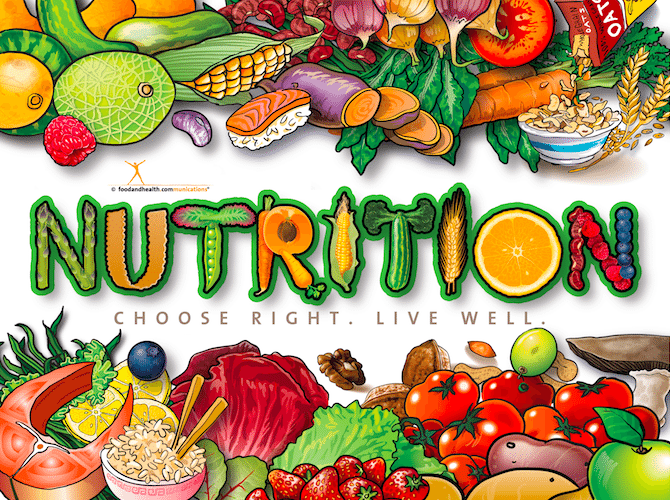


## **Data Sources :**

1. https://corgis-edu.github.io/corgis/csv/food/
2. https://www.ars.usda.gov/northeast-area/beltsville-md-bhnrc/beltsville-human-nutrition-research-center/food-surveys-research-group/docs/fndds-download-databases/
3. https://www.ars.usda.gov/ARSUserFiles/80400530/pdf/fndds/FNDDS_2017_2018_factsheet.pdf

# Importing Modules

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Reading Data from Website 


In [ ]:
# reading the data directly from the website
df = pd.read_csv('https://corgis-edu.github.io/corgis/datasets/csv/food/food.csv')

#df.to_csv(df)
print(df.shape)  ## printing the shape of the dataframe

(7083, 38)


In [ ]:
df.head()

Category                     Description  Nutrient Data Bank Number  \
0     Milk                     Milk, human                   11000000   
1     Milk                       Milk, NFS                   11100000   
2     Milk                     Milk, whole                   11111000   
3     Milk         Milk, low sodium, whole                   11111100   
4     Milk  Milk, calcium fortified, whole                   11111150   

   Data.Alpha Carotene  Data.Beta Carotene  Data.Beta Cryptoxanthin  \
0                    0                   7                        0   
1                    0                   4                        0   
2                    0                   7                        0   
3                    0                   7                        0   
4                    0                   7                        0   

   Data.Carbohydrate  Data.Cholesterol  Data.Choline  Data.Fiber  ...  \
0               6.89                14          16.0         0.0  ...   
1               4.87                 8          17.9         0.0  ...   
2               4.67                12          17.8         0.0  ...   
3               4.46                14          16.0         0.0  ...   
4               4.67                12          17.8         0.0  ...   

   Data.Major Minerals.Phosphorus  Data.Major Minerals.Potassium  \
0                              14                             51   
1                             103                            157   
2                             101                            150   
3                              86                            253   
4                             101                            150   

   Data.Major Minerals.Sodium  Data.Major Minerals.Zinc  \
0                          17                      0.17   
1                          39                      0.42   
2                          38                      0.41   
3                           3                      0.38   
4                          38                      0.41   

   Data.Vitamins.Vitamin A - RAE  Data.Vitamins.Vitamin B12  \
0                             61                       0.05   
1                             59                       0.56   
2                             32                       0.54   
3                             29                       0.36   
4                             32                       0.54   

   Data.Vitamins.Vitamin B6  Data.Vitamins.Vitamin C  Data.Vitamins.Vitamin E  \
0                     0.011                      5.0                     0.08   
1                     0.060                      0.1                     0.03   
2                     0.061                      0.0                     0.05   
3                     0.034                      0.9                     0.08   
4                     0.061                      0.0                     0.05   

   Data.Vitamins.Vitamin K  
0                      0.3  
1                      0.2  
2                      0.3  
3                      0.3  
4                      0.3  

[5 rows x 38 columns]

### Extracting the count of nutrients including cholestrol
Method-1:

1. There are six major nutrients: Carbohydrates (CHO), Lipids (fats), Proteins, Vitamins, Minerals, Water.
2. In the dataset, they all start with the word "Data." in their name. So, we can start by considering all the names that start with the word "Data."
3. This way is extremely helpful when all the nutrients mentioned have a consistent way of naming convention as in this dataset.

In [ ]:
count_of_nutrients=0
## Initializing the count variable to 0
for i in df.columns:
  ## going through each and every column names using the df.columns function
  if i.startswith('Data.'):
    ## using the string function startswith() to check whether the particular column starts with "Data." and increments it if it does.
    count_of_nutrients+=1
print("There are {} nutrients including cholestrol.".format(count_of_nutrients))
## This count_of_nutrients consists of the count of the number of nutrients 

There are 35 nutrients including cholestrol.


Method-2:

1. This is one way of extracting the columns by using .iloc[] method.
2. After the first 3 columns, every column is a nutrient.
3. Once, you get the subset of the data containing only the nutrients, you can use the shape function to get the shape of the dataframe
4. use shape[1] to get the number of columns which is nothing but the count of the nutrients.
5. This method is extremely useful when all the nutrients are ordered one after the other so that we can use indexing to select the columns.

In [ ]:
count_of_nutrients=df.iloc[:,3:].shape[1]
print("There are {} nutrients including cholestrol.".format(count_of_nutrients))

There are 35 nutrients including cholestrol.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7083 entries, 0 to 7082
Data columns (total 38 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Category                        7083 non-null   object 
 1   Description                     7083 non-null   object 
 2   Nutrient Data Bank Number       7083 non-null   int64  
 3   Data.Alpha Carotene             7083 non-null   int64  
 4   Data.Beta Carotene              7083 non-null   int64  
 5   Data.Beta Cryptoxanthin         7083 non-null   int64  
 6   Data.Carbohydrate               7083 non-null   float64
 7   Data.Cholesterol                7083 non-null   int64  
 8   Data.Choline                    7083 non-null   float64
 9   Data.Fiber                      7083 non-null   float64
 10  Data.Lutein and Zeaxanthin      7083 non-null   int64  
 11  Data.Lycopene                   7083 non-null   int64  
 12  Data.Niacin                     70

# Random Sampling

Taking a random sample as per our group number i.e 3

In [ ]:
np.random.seed(3)
## setting the seed using the random.seed function

shuffled_df=df.sample(frac=0.90)
## using dataframe sample function to take a random sample consisting of 90 % of data and storing it in a variable named df only

print("Shape of the Original dataframe is {}.".format(df.shape))
print("Shape of the shuffled dataframe with 90% data is {}.".format(shuffled_df.shape))
## printing the shape of the shuffled dataframe 

Shape of the Original dataframe is (7083, 38).
Shape of the shuffled dataframe with 90% data is (6375, 38).


In [ ]:
df=shuffled_df.copy()

In [ ]:
df.shape

(6375, 38)

# Missing Values


## Method-1

Using .info()  method,in the non-null count column, it shows the number of non-null rows and you can see whether they are less than the actual number of rows.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6375 entries, 6553 to 2271
Data columns (total 38 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Category                        6375 non-null   object 
 1   Description                     6375 non-null   object 
 2   Nutrient Data Bank Number       6375 non-null   int64  
 3   Data.Alpha Carotene             6375 non-null   int64  
 4   Data.Beta Carotene              6375 non-null   int64  
 5   Data.Beta Cryptoxanthin         6375 non-null   int64  
 6   Data.Carbohydrate               6375 non-null   float64
 7   Data.Cholesterol                6375 non-null   int64  
 8   Data.Choline                    6375 non-null   float64
 9   Data.Fiber                      6375 non-null   float64
 10  Data.Lutein and Zeaxanthin      6375 non-null   int64  
 11  Data.Lycopene                   6375 non-null   int64  
 12  Data.Niacin                    

## Method-2

.isna() function gives a value True if there exists a missing value.
When sum function is applied on it, it gives us the count for the True values if they exist any missing values for every column

In [ ]:
print(df.isna())
print(df.isna().sum())

      Category  Description  Nutrient Data Bank Number  Data.Alpha Carotene  \
6553     False        False                      False                False   
1429     False        False                      False                False   
5119     False        False                      False                False   
6574     False        False                      False                False   
2708     False        False                      False                False   
...        ...          ...                        ...                  ...   
1304     False        False                      False                False   
3391     False        False                      False                False   
5862     False        False                      False                False   
5614     False        False                      False                False   
2271     False        False                      False                False   

      Data.Beta Carotene  Data.Beta Cryptoxanthin  

In [ ]:
## When you use sum two times, it gives the total missing values count in the dataset.
print("There are {} missing values in the data.".format(df.isna().sum().sum()))

There are 0 missing values in the data.


# Literature Review and Basic EDA



## Lit review


**Knowing Cholesterol:**

Cholesterol in the right amounts can help your body be healthy. There are two types of cholesterol:</br> (a) Low Density Lipoprotein (LDL), also known as, Bad cholesterol and </br>(b) High Density Lipoprotein (HDL), also known as, Good cholesterol. 

</br>Good cholesterol has higher protein content and lowers the risk of heart disease [1]. A certain amount of Cholesterol is necessary for healthy living. Cholesterol helps in insulation for nerve cell, helps in making many critical hormones. It plays a major role in formation of cell membranes and structure [2].</br>

Low cholesterol levels are usually considered to be better than high cholesterol, however, low cholesterol can be due to thyroid issues, malnutrition, anemia which could lead to anxiety, depression and other issues [3].</br>

High cholesterol can cause coronary heart disease, stroke, blood vessel diseases which are at a higher risk[4]. Obesity and eating habits can be a major concern of cholesterol levels. Obesity can be a route cause for heart disease and diabetics which is premier to high cholesterol levels in body [5]. </br> 

Generally, food that contains more saturated fat and trans fat lead to high cholesterol. This includes dairy foods such as milk, yogurt, cream, butter, red meat, processed meat which contains high saturated fat. Fried food and desserts can also cause high cholesterol as they have high contents of trans fat which increases the risk of cardiovascular disease and other cholesterol related diseases [6].</br> 

But there are some exceptional cases where high cholesterol food contains low saturated fat like egg, shellfish which are considered to have health benefits as they have high protein and omega-3 fatty acids which reduces the effects of cholesterol [7]. The food that have low saturated fat but containing high cholesterol are referred to as dietery cholesterol food. They have lower risk of cardiovascular diseases as they are rich in nutrients [8]. 

In order to maintain right level of cholesterol, food that contains more fiber like fruits, oats, whole grains, eggplant, beans, okra and other vegetables can be considered [9]. </br>

In addition to the choice of food habits, regular exercise, quitting smoking and adapting to a healthy lifestyle can help us stay fit [10].

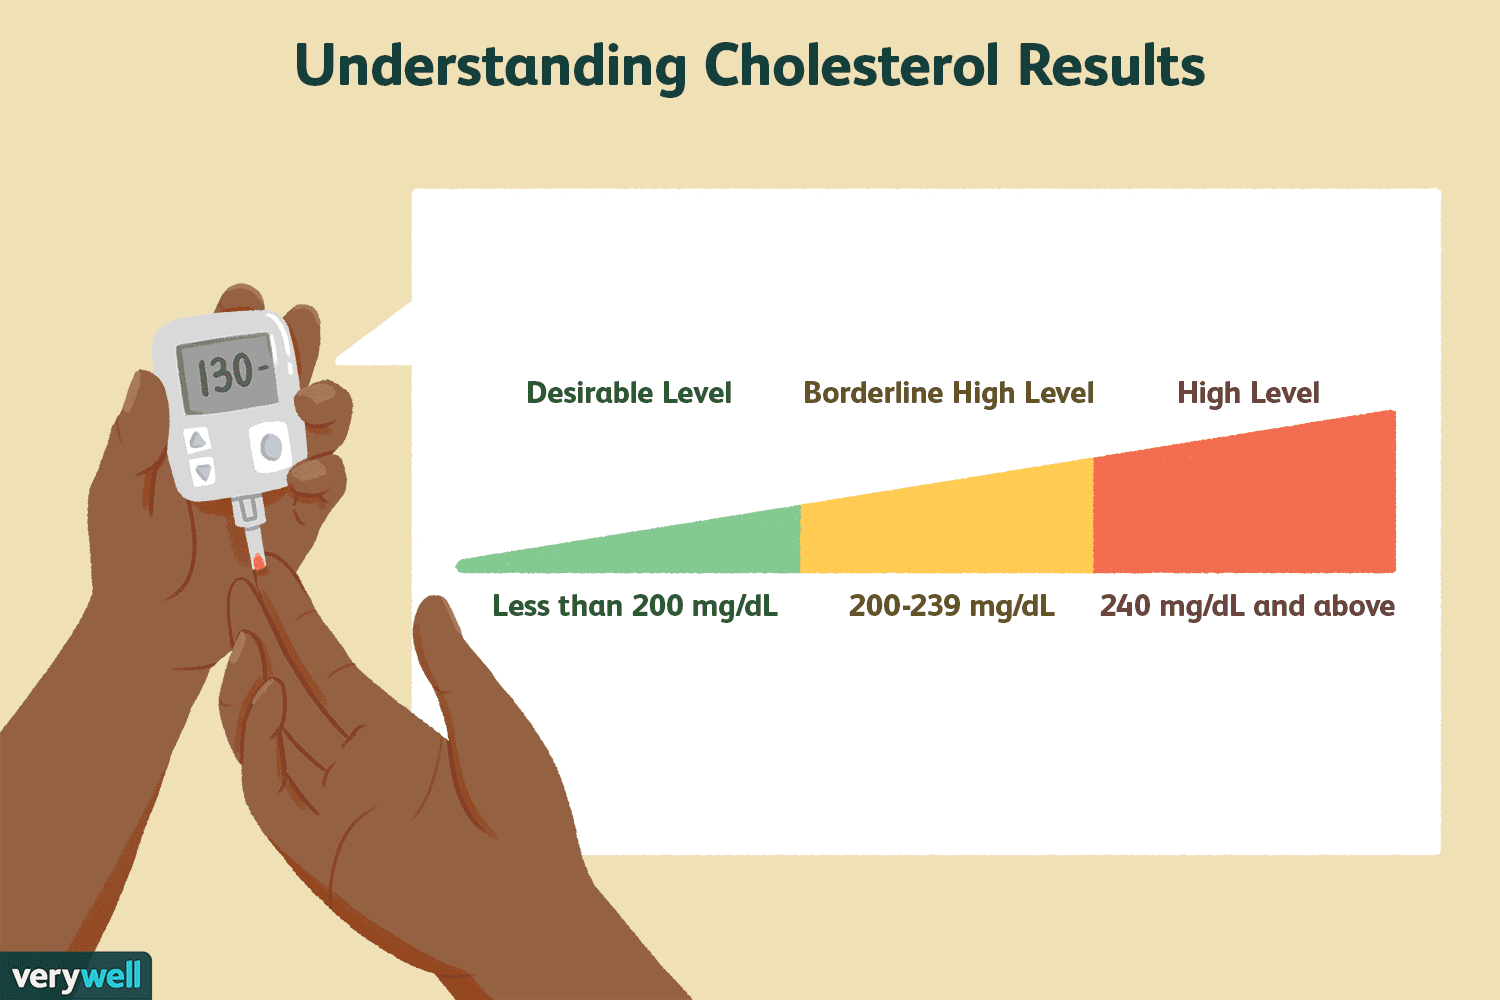


**Citations:**
1. https://www.webmd.com/cholesterol-management/cholesterol-too-low
2. https://www.verywellhealth.com/benefits-of-cholesterol-what-is-it-good-for-3859584
3. https://www.mayoclinic.org/diseases-conditions/high-blood-cholesterol/expert-answers/cholesterol-level/faq-20057952
4. https://my.clevelandclinic.org/health/articles/11918-cholesterol-high-cholesterol-diseases
5. https://www.cdc.gov/cholesterol/risk_factors.htm
6. https://health.clevelandclinic.org/high-cholesterol-foods-to-eat-and-avoid/
7. https://www.heartuk.org.uk/low-cholesterol-foods/foods-that-contain-cholesterol
8. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6024687/
9. https://www.health.harvard.edu/heart-health/11-foods-that-lower-cholesterol
10. https://www.pritikin.com/your-health/health-benefits/lower-cholesterol/1759-5-tactics-to-reduce-cholesterol-quickly.html


# Basic EDA

## Handling Outliers in the data
1. Outliers are not meant to be removed directly. Only the extreme ones are to be removed.
2. If the model is not given outliers and only the data surrounded by mean or median or perfectly skewed data, then it can't predict extreme values or uncommon values.
3. Only the extreme ones are to be removed.
4. We start by checking the extreme outliers in each and every variable and then handle it appropriately.

5. If we use IQR to find the outliers, then It will show each and every outlier in the data and as mentioned before, we are not here to delete or ignore every possible outlier.

#### Target Variable - **Data.Cholesterol**

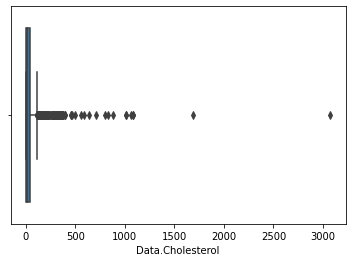

In [ ]:
sns.boxplot(df['Data.Cholesterol'])

In [ ]:
inds=df.loc[df['Data.Cholesterol']>1300].index
print(inds)
df.drop(index=inds,inplace=True)

Int64Index([1151, 1913], dtype='int64')


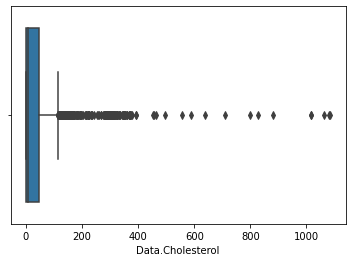

In [ ]:
sns.boxplot(df['Data.Cholesterol'])

In [ ]:
cols=df.columns[3:]
cols

Index(['Data.Alpha Carotene', 'Data.Beta Carotene', 'Data.Beta Cryptoxanthin',
       'Data.Carbohydrate', 'Data.Cholesterol', 'Data.Choline', 'Data.Fiber',
       'Data.Lutein and Zeaxanthin', 'Data.Lycopene', 'Data.Niacin',
       'Data.Protein', 'Data.Retinol', 'Data.Riboflavin', 'Data.Selenium',
       'Data.Sugar Total', 'Data.Thiamin', 'Data.Water',
       'Data.Fat.Monosaturated Fat', 'Data.Fat.Polysaturated Fat',
       'Data.Fat.Saturated Fat', 'Data.Fat.Total Lipid',
       'Data.Major Minerals.Calcium', 'Data.Major Minerals.Copper',
       'Data.Major Minerals.Iron', 'Data.Major Minerals.Magnesium',
       'Data.Major Minerals.Phosphorus', 'Data.Major Minerals.Potassium',
       'Data.Major Minerals.Sodium', 'Data.Major Minerals.Zinc',
       'Data.Vitamins.Vitamin A - RAE', 'Data.Vitamins.Vitamin B12',
       'Data.Vitamins.Vitamin B6', 'Data.Vitamins.Vitamin C',
       'Data.Vitamins.Vitamin E', 'Data.Vitamins.Vitamin K'],
      dtype='object')

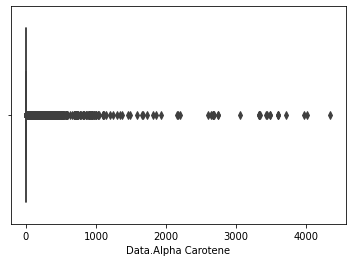

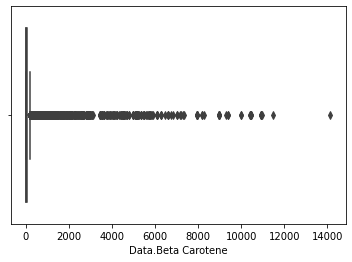

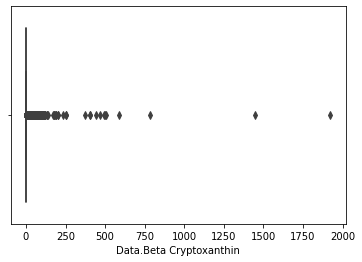

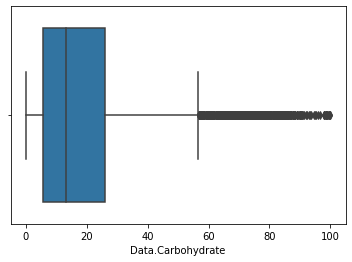

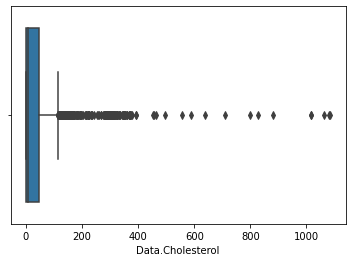

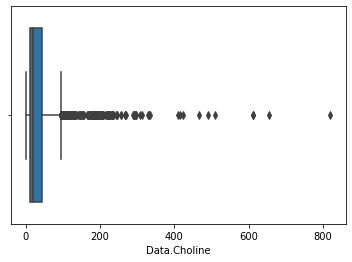

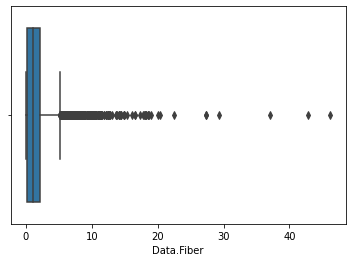

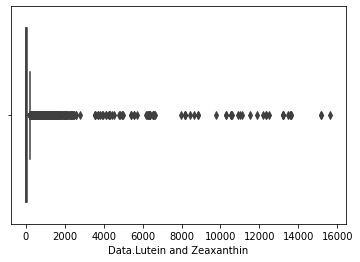

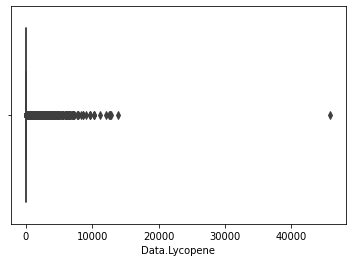

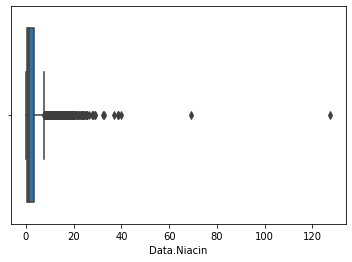

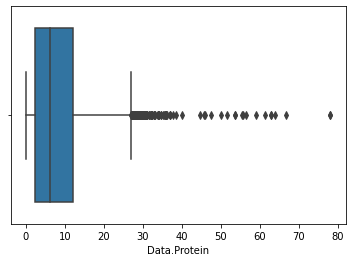

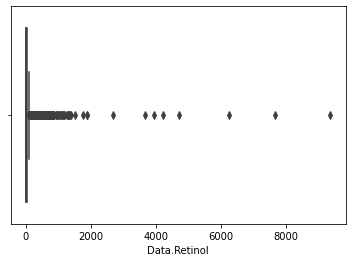

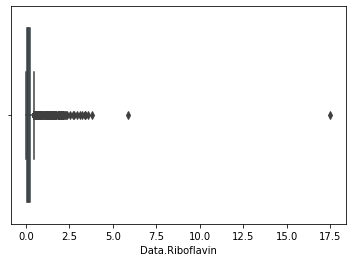

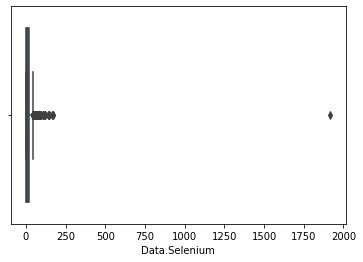

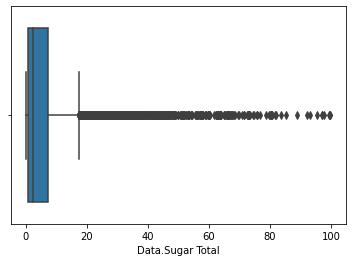

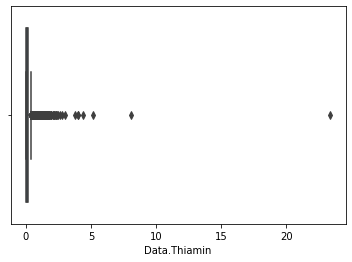

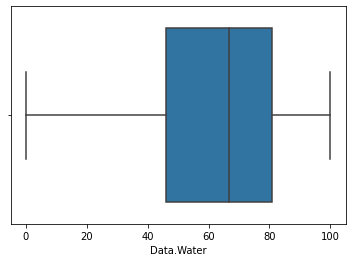

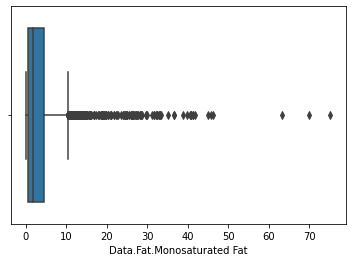

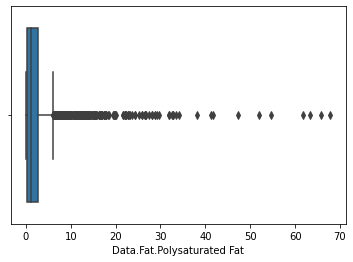

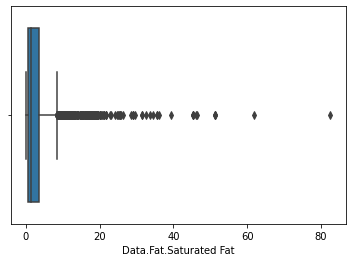

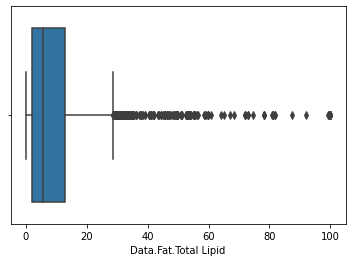

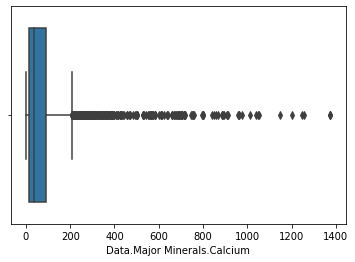

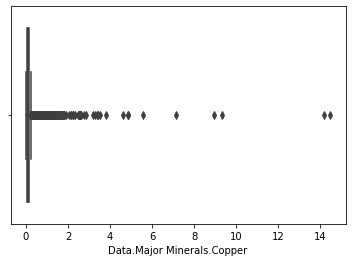

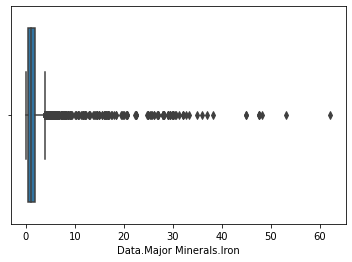

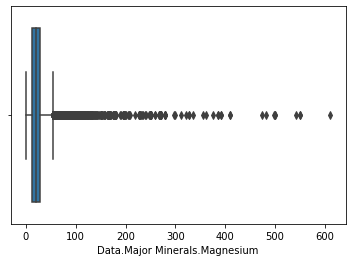

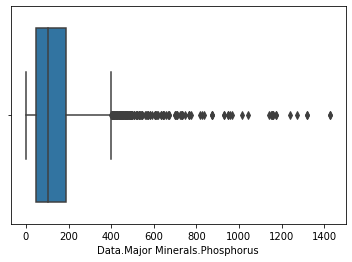

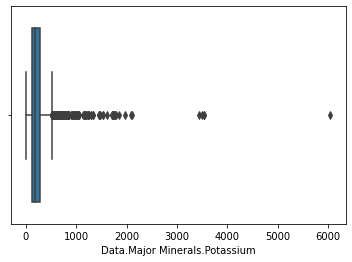

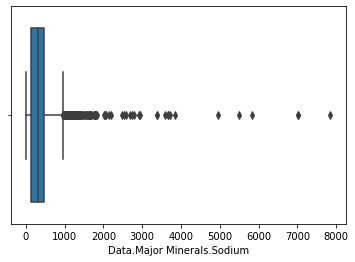

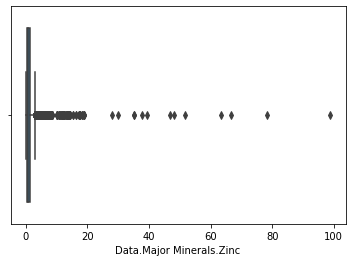

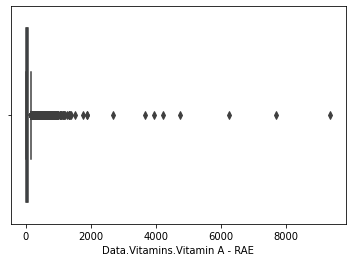

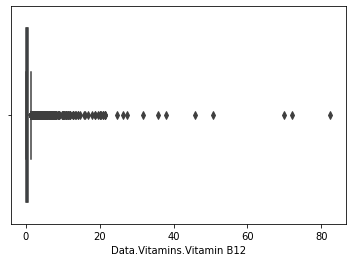

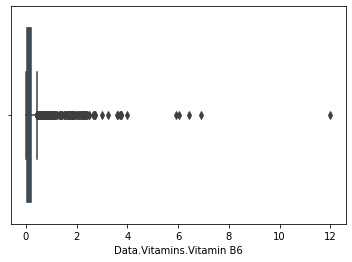

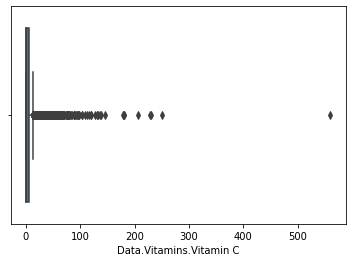

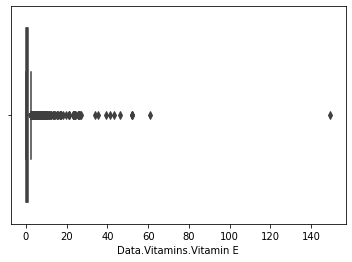

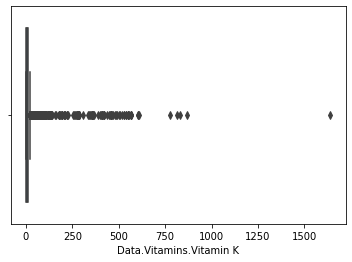

In [ ]:
for i in range(len(cols)):
    plt.figure()
    sns.boxplot(df[cols[i]])

Get the columns which have extreme outliers.
1. Data.Beta.Cryptoxanthin
2. Data.Lycopene
3. Data.Riboflavin
4. Data.Selenium
5. Data.Thiamin
6. Data.Major.Minerals.Potassium
7. Data.Vitamins.Vitamin C
8. Data.Vitamins.Vitamin K

### Total Outlier Count

In [ ]:
def find_iqr(x):
  return np.subtract(*np.percentile(x, [75, 25]))

In [ ]:
def find_q1(x):
  return np.percentile(x,[25])

In [ ]:
def find_q3(x):
  return np.percentile(x,[75])

In [ ]:
q1s=df.iloc[:,3:].apply(find_q1).values
q3s=df.iloc[:,3:].apply(find_q3).values

In [ ]:
outlier_info=pd.DataFrame()

In [ ]:
outlier_info['Q1']=q1s[0]
outlier_info['Q3']=q3s[0]


In [ ]:
outlier_info.index=df.iloc[:,3:].columns.values

In [ ]:
outlier_info['IQR']= outlier_info['Q3']-outlier_info['Q1']

In [ ]:
lower_bound=outlier_info['Q1']-1.5*outlier_info['IQR']
upper_bound=outlier_info['Q3']+1.5*outlier_info['IQR']

In [ ]:
lower_bound.index=df.iloc[:,3:].columns.values
upper_bound.index=df.iloc[:,3:].columns.values

In [ ]:
counts=[]
for each_column in df.iloc[:,3:].columns:
  outlier_count=df.loc[(df[each_column]<lower_bound[each_column]) | (df[each_column]>upper_bound[each_column]),each_column].count()
  counts.append(outlier_count)
outlier_info['Outliers']=counts

In [ ]:
outlier_info

Q1       Q3      IQR  Outliers
Data.Alpha Carotene               0.000    1.000    1.000      1353
Data.Beta Carotene                0.000   73.000   73.000       955
Data.Beta Cryptoxanthin           0.000    1.000    1.000      1050
Data.Carbohydrate                 5.630   26.060   20.430       645
Data.Cholesterol                  0.000   46.000   46.000       358
Data.Choline                     10.100   43.900   33.800       382
Data.Fiber                        0.100    2.100    2.000       430
Data.Lutein and Zeaxanthin        0.000   80.000   80.000       807
Data.Lycopene                     0.000    0.000    0.000       952
Data.Niacin                       0.537    3.425    2.888       400
Data.Protein                      2.210   12.150    9.940       217
Data.Retinol                      0.000   43.000   43.000       553
Data.Riboflavin                   0.060    0.222    0.162       302
Data.Selenium                     1.700   20.000   18.300       159
Data.Sugar Total                  0.790    7.390    6.600       781
Data.Thiamin                      0.040    0.189    0.149       504
Data.Water                       45.920   80.680   34.760         0
Data.Fat.Monosaturated Fat        0.514    4.450    3.936       281
Data.Fat.Polysaturated Fat        0.336    2.655    2.319       436
Data.Fat.Saturated Fat            0.508    3.676    3.168       409
Data.Fat.Total Lipid              2.070   12.710   10.640       291
Data.Major Minerals.Calcium      15.000   92.000   77.000       384
Data.Major Minerals.Copper        0.050    0.128    0.078       594
Data.Major Minerals.Iron          0.460    1.830    1.370       391
Data.Major Minerals.Magnesium    12.000   29.000   17.000       544
Data.Major Minerals.Phosphorus   48.000  189.000  141.000       185
Data.Major Minerals.Potassium   111.000  272.000  161.000       246
Data.Major Minerals.Sodium      124.000  455.000  331.000       205
Data.Major Minerals.Zinc          0.350    1.360    1.010       541
Data.Vitamins.Vitamin A - RAE     2.000   61.000   59.000       692
Data.Vitamins.Vitamin B12         0.000    0.540    0.540       736
Data.Vitamins.Vitamin B6          0.052    0.203    0.151       528
Data.Vitamins.Vitamin C           0.000    5.300    5.300       696
Data.Vitamins.Vitamin E           0.230    1.120    0.890       420
Data.Vitamins.Vitamin K           0.800    9.300    8.500       650

1. Here shows the table for outliers in each and every column found out using interquartile range function.
2. But, we are only removing the extreme outliers.
3. The above table is to just show you the information about the outliers.


In [ ]:
inds=df.loc[df['Data.Beta Cryptoxanthin']>1250].index
print(inds)
df.drop(index=inds,inplace=True)

Int64Index([5127, 5177], dtype='int64')


In [ ]:
inds=df.loc[df['Data.Lycopene']>30000].index
print(inds)
df.drop(index=inds,inplace=True)

Int64Index([5774], dtype='int64')


In [ ]:
inds=df.loc[df['Data.Riboflavin']>15].index
print(inds)
df.drop(index=inds,inplace=True)

Int64Index([6085], dtype='int64')


In [ ]:
inds=df.loc[df['Data.Selenium']>1500].index
print(inds)
df.drop(index=inds,inplace=True)

Int64Index([3004], dtype='int64')


In [ ]:
df.loc[df['Data.Thiamin']>15]

Empty DataFrame
Columns: [Category, Description, Nutrient Data Bank Number, Data.Alpha Carotene, Data.Beta Carotene, Data.Beta Cryptoxanthin, Data.Carbohydrate, Data.Cholesterol, Data.Choline, Data.Fiber, Data.Lutein and Zeaxanthin, Data.Lycopene, Data.Niacin, Data.Protein, Data.Retinol, Data.Riboflavin, Data.Selenium, Data.Sugar Total, Data.Thiamin, Data.Water, Data.Fat.Monosaturated Fat, Data.Fat.Polysaturated Fat, Data.Fat.Saturated Fat, Data.Fat.Total Lipid, Data.Major Minerals.Calcium, Data.Major Minerals.Copper, Data.Major Minerals.Iron, Data.Major Minerals.Magnesium, Data.Major Minerals.Phosphorus, Data.Major Minerals.Potassium, Data.Major Minerals.Sodium, Data.Major Minerals.Zinc, Data.Vitamins.Vitamin A - RAE, Data.Vitamins.Vitamin B12, Data.Vitamins.Vitamin B6, Data.Vitamins.Vitamin C, Data.Vitamins.Vitamin E, Data.Vitamins.Vitamin K]
Index: []

[0 rows x 38 columns]

In [ ]:
inds=df.loc[df['Data.Major Minerals.Potassium']>5000].index
print(inds)
df.drop(index=inds,inplace=True)

Int64Index([6769], dtype='int64')


In [ ]:
inds=df.loc[df['Data.Vitamins.Vitamin C']>400].index
print(inds)
df.drop(index=inds,inplace=True)

Int64Index([6881], dtype='int64')


In [ ]:
inds=df.loc[df['Data.Vitamins.Vitamin E']>120].index
print(inds)
df.drop(index=inds,inplace=True)

Int64Index([6359], dtype='int64')


In [ ]:
inds=df.loc[df['Data.Vitamins.Vitamin K']>1250].index
print(inds)
df.drop(index=inds,inplace=True)

Int64Index([5855], dtype='int64')


#### Outlier Analysis
1. Removed atmost 15 extreme outliers from the dataframe.
2. There is no information loss as we didn't remove every outlier.

#### Binning of Cholesterol (*Optional*)

In [ ]:
bins=np.linspace(df['Data.Cholesterol'].min(),df['Data.Cholesterol'].max(),5,endpoint=True)#
print(bins)
labels=['very low','low','medium','high']
print(labels)
df['Data.Cholesterol.Group']=pd.cut(df['Data.Cholesterol'],bins=bins,labels=labels)

[   0.    271.25  542.5   813.75 1085.  ]
['very low', 'low', 'medium', 'high']


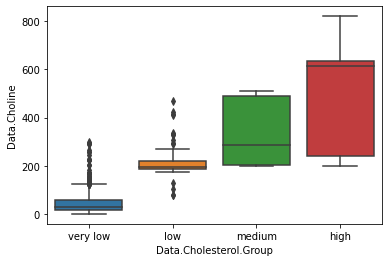

In [ ]:
sns.boxplot(data=df,x='Data.Cholesterol.Group',y='Data.Choline')

There is no proper distinction with Cholesterol Binning.
1. You can't equally group cholesterol into bins.
2. And, there is no clear distinction in the medium and high bins.
3. very low and low have a clear distinction.
4. We need to group in an other way such that the categories have correctly made into group.

I found that the foods with cholesterol less than 13 are 90%  non-meat items. So, we grouped the data into two seperate dataframes.

This Point will be clearly understood when we seggregate the data into
1. Vegetables and salads
2. Fruits
3. Meat products
4. Milk Products.

## Unique values from `Category` 


In [ ]:
no_of_unique_values=df['Category'].nunique()
## nunique function is used to get the number of unique values in the Category columns
print("There are {} unique values in the Category column in the data.".format(no_of_unique_values))

There are 2258 unique values in the Category column in the data.


In [ ]:
## we use a .value_counts() function to get the count of each category in the "category" column.
## I applied reset_index() to convert the series into a dataframe (optional)
frequency_table=df['Category'].value_counts().reset_index()
## Applied head() function to get the "n" most frequent categories in the category column. Here n is set to 10 to get the 10 most common categories
frequency_table.head(10)

index  Category
0                   Infant formula       158
1                             Rice       123
2                            Bread       101
3                           Cookie        96
4                           Potato        93
5  Frankfurter or hot dog sandwich        87
6                           Coffee        83
7      Egg omelet or scrambled egg        76
8                              Pie        70
9                             Beef        67

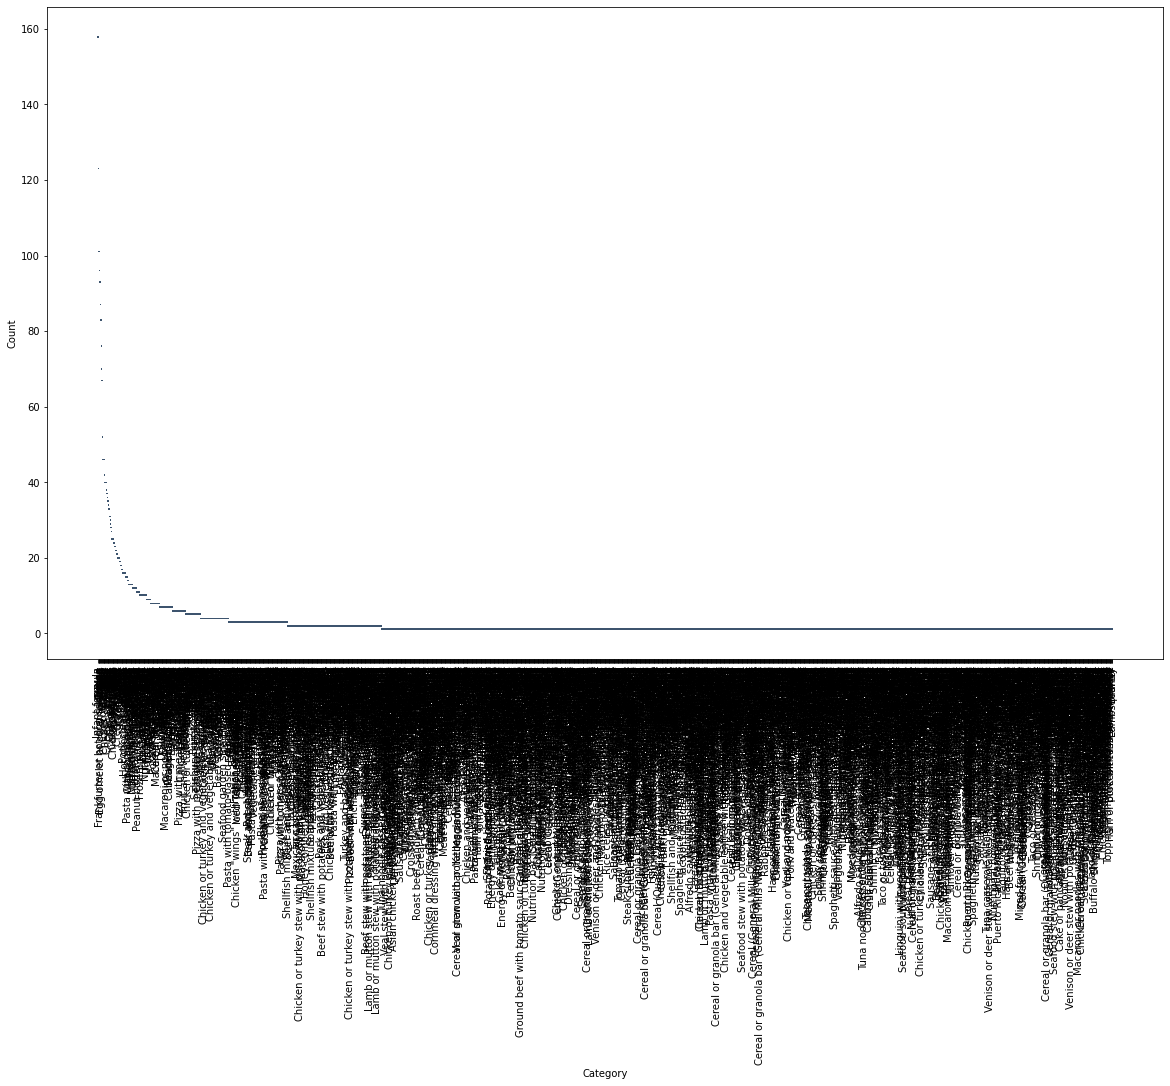

In [ ]:
plt.figure(figsize=(20,12))
sns.histplot(data=frequency_table,x='index',y='Category')
plt.xlabel("Category")
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

1. There is no such information displayed using the histplot.

2. The visualisation is not that clear.

## Correlation


In [ ]:
df.corr()

Nutrient Data Bank Number  \
Nutrient Data Bank Number                        1.000000   
Data.Alpha Carotene                              0.089330   
Data.Beta Carotene                               0.174305   
Data.Beta Cryptoxanthin                          0.073942   
Data.Carbohydrate                                0.253694   
Data.Cholesterol                                -0.327770   
Data.Choline                                    -0.368045   
Data.Fiber                                       0.170904   
Data.Lutein and Zeaxanthin                       0.127426   
Data.Lycopene                                    0.027599   
Data.Niacin                                     -0.156896   
Data.Protein                                    -0.510536   
Data.Retinol                                    -0.036006   
Data.Riboflavin                                 -0.101560   
Data.Selenium                                   -0.410537   
Data.Sugar Total                                 0.261022   
Data.Thiamin                                    -0.030612   
Data.Water                                      -0.013849   
Data.Fat.Monosaturated Fat                      -0.102298   
Data.Fat.Polysaturated Fat                      -0.000505   
Data.Fat.Saturated Fat                          -0.103444   
Data.Fat.Total Lipid                            -0.096628   
Data.Major Minerals.Calcium                     -0.158951   
Data.Major Minerals.Copper                      -0.033263   
Data.Major Minerals.Iron                         0.000017   
Data.Major Minerals.Magnesium                    0.015881   
Data.Major Minerals.Phosphorus                  -0.348316   
Data.Major Minerals.Potassium                   -0.093306   
Data.Major Minerals.Sodium                      -0.232964   
Data.Major Minerals.Zinc                        -0.137777   
Data.Vitamins.Vitamin A - RAE                    0.027661   
Data.Vitamins.Vitamin B12                       -0.155563   
Data.Vitamins.Vitamin B6                        -0.039402   
Data.Vitamins.Vitamin C                          0.214471   
Data.Vitamins.Vitamin E                          0.060245   
Data.Vitamins.Vitamin K                          0.132745   

                                Data.Alpha Carotene  Data.Beta Carotene  \
Nutrient Data Bank Number                  0.089330            0.174305   
Data.Alpha Carotene                        1.000000            0.518185   
Data.Beta Carotene                         0.518185            1.000000   
Data.Beta Cryptoxanthin                    0.013102            0.050624   
Data.Carbohydrate                         -0.059688           -0.083612   
Data.Cholesterol                          -0.061635           -0.089313   
Data.Choline                              -0.064895           -0.088050   
Data.Fiber                                 0.031916            0.081153   
Data.Lutein and Zeaxanthin                 0.042546            0.474890   
Data.Lycopene                              0.006069            0.004898   
Data.Niacin                               -0.065442           -0.105404   
Data.Protein                              -0.105933           -0.157347   
Data.Retinol                              -0.027107           -0.033348   
Data.Riboflavin                           -0.059036           -0.070008   
Data.Selenium                             -0.100170           -0.158119   
Data.Sugar Total                          -0.038701           -0.054826   
Data.Thiamin                              -0.045392           -0.073444   
Data.Water                                 0.115444            0.157823   
Data.Fat.Monosaturated Fat                -0.065236           -0.081541   
Data.Fat.Polysaturated Fat                -0.036345           -0.044621   
Data.Fat.Saturated Fat                    -0.072725           -0.093451   
Data.Fat.Total Lipid                      -0.074244           -0.091985   
Data.Major Minerals.Calcium               -0.0558

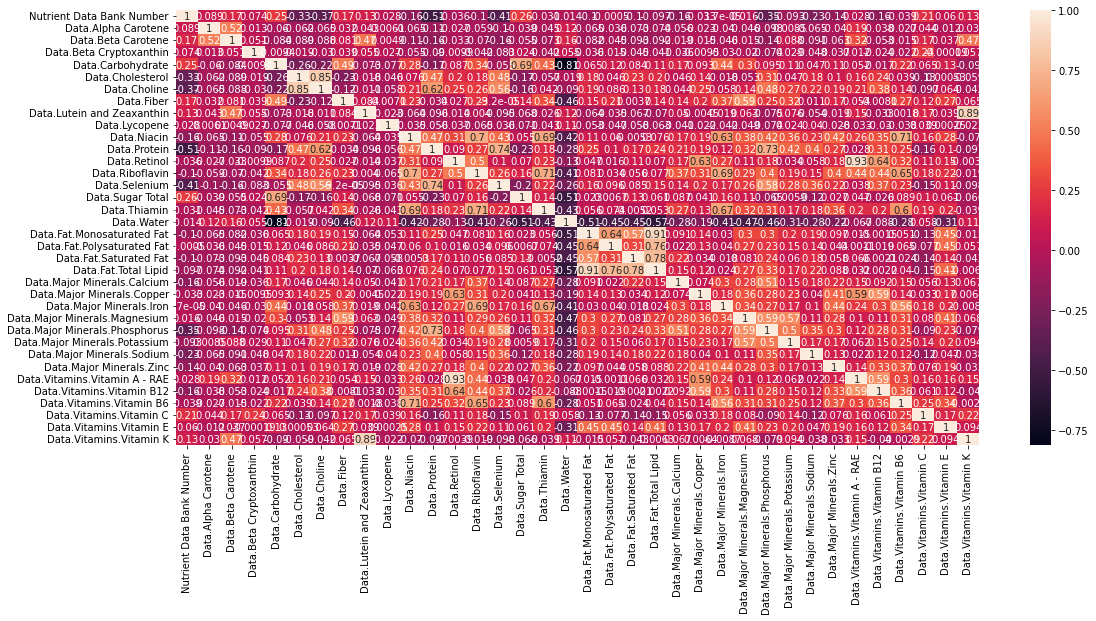

In [ ]:
plt.figure(figsize=(18,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

#### Analysis
The matrix is not at all clear. It is very hard to interpret insights from this matrix.

1. The above plot is a heatmap which takes as input a correlation matrix and then gives a graphical representation using colors.
2. When you divide nutrients into groups and then analysis which becomes easy to visualize information.

#### Fat related correlation matrix

In [ ]:
fat_columns=[]
for i in df.columns:
  if i.startswith('Data.Fat'):
    fat_columns.append(i)
fat_columns.append('Data.Cholesterol')

In [ ]:
fats=df[fat_columns]

In [ ]:
fats.corr()

Data.Fat.Monosaturated Fat  \
Data.Fat.Monosaturated Fat                    1.000000   
Data.Fat.Polysaturated Fat                    0.638039   
Data.Fat.Saturated Fat                        0.573266   
Data.Fat.Total Lipid                          0.907137   
Data.Cholesterol                              0.175934   

                            Data.Fat.Polysaturated Fat  \
Data.Fat.Monosaturated Fat                    0.638039   
Data.Fat.Polysaturated Fat                    1.000000   
Data.Fat.Saturated Fat                        0.305479   
Data.Fat.Total Lipid                          0.764278   
Data.Cholesterol                              0.045925   

                            Data.Fat.Saturated Fat  Data.Fat.Total Lipid  \
Data.Fat.Monosaturated Fat                0.573266              0.907137   
Data.Fat.Polysaturated Fat                0.305479              0.764278   
Data.Fat.Saturated Fat                    1.000000              0.779683   
Data.Fat.Total Lipid                      0.779683              1.000000   
Data.Cholesterol                          0.231450              0.198091   

                            Data.Cholesterol  
Data.Fat.Monosaturated Fat          0.175934  
Data.Fat.Polysaturated Fat          0.045925  
Data.Fat.Saturated Fat              0.231450  
Data.Fat.Total Lipid                0.198091  
Data.Cholesterol                    1.000000

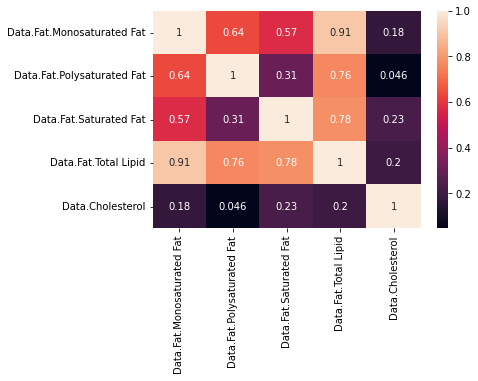

In [ ]:
sns.heatmap(fats.corr(),annot=True)

#### Analysis
1. This matrix consists of the correlation between different fats with cholesterol.
2. Monosaturated Fats, Saturated Fats and Total Lipids have a positive correlation with Cholesterol which indicates that the as the Fat content in the foods increase,the cholesterol levels are also high in them.
3. Polysaturated Fats have a very low positive correlation.
4. Monosaturated Fats are also having a high positive correlation with Polysaturated Fats, Saturated Fats and **Total Lipid**.
5. As **Monosaturated Fats** and **Total Lipid** are highly **correlated** with a correlation of **0.9**, we can exclude any one of these from modeling which reduces the **complexity** of the model.



Major Minerals related

In [ ]:
mineral_columns=[]
for i in df.columns:
  if i.startswith('Data.Major Minerals'):
    mineral_columns.append(i)
mineral_columns.append('Data.Cholesterol')

In [ ]:
minerals=df[mineral_columns]

In [ ]:
minerals.corr()

Data.Major Minerals.Calcium  \
Data.Major Minerals.Calcium                        1.000000   
Data.Major Minerals.Copper                         0.073688   
Data.Major Minerals.Iron                           0.296598   
Data.Major Minerals.Magnesium                      0.282344   
Data.Major Minerals.Phosphorus                     0.513250   
Data.Major Minerals.Potassium                      0.146877   
Data.Major Minerals.Sodium                         0.175644   
Data.Major Minerals.Zinc                           0.217913   
Data.Cholesterol                                   0.045563   

                                Data.Major Minerals.Copper  \
Data.Major Minerals.Calcium                       0.073688   
Data.Major Minerals.Copper                        1.000000   
Data.Major Minerals.Iron                          0.183931   
Data.Major Minerals.Magnesium                     0.355847   
Data.Major Minerals.Phosphorus                    0.280905   
Data.Major Minerals.Potassium                     0.233780   
Data.Major Minerals.Sodium                        0.039769   
Data.Major Minerals.Zinc                          0.407881   
Data.Cholesterol                                  0.143523   

                                Data.Major Minerals.Iron  \
Data.Major Minerals.Calcium                     0.296598   
Data.Major Minerals.Copper                      0.183931   
Data.Major Minerals.Iron                        1.000000   
Data.Major Minerals.Magnesium                   0.337109   
Data.Major Minerals.Phosphorus                  0.272812   
Data.Major Minerals.Potassium                   0.171634   
Data.Major Minerals.Sodium                      0.104515   
Data.Major Minerals.Zinc                        0.435294   
Data.Cholesterol                               -0.017980   

                                Data.Major Minerals.Magnesium  \
Data.Major Minerals.Calcium                          0.282344   
Data.Major Minerals.Copper                           0.355847   
Data.Major Minerals.Iron                             0.337109   
Data.Major Minerals.Magnesium                        1.000000   
Data.Major Minerals.Phosphorus                       0.585324   
Data.Major Minerals.Potassium                        0.568017   
Data.Major Minerals.Sodium                           0.107164   
Data.Major Minerals.Zinc                             0.275434   
Data.Cholesterol                                    -0.053015   

                                Data.Major Minerals.Phosphorus  \
Data.Major Minerals.Calcium                           0.513250   
Data.Major Minerals.Copper                            0.280905   
Data.Major Minerals.Iron                              0.272812   
Data.Major Minerals.Magnesium                         0.585324   
Data.Major Minerals.Phosphorus                        1.000000   
Data.Major Minerals.Potassium                         0.496230   
Data.Major Minerals.Sodium                            0.352729   
Data.Major Minerals.Zinc                              0.300955   
Data.Cholesterol                                      0.313470   

                                Data.Major Minerals.Potassium  \
Data.Major Minerals.Calcium                          0.146877   
Data.Major Minerals.Copper                           0.233780   
Data.Major Minerals.Iron                             0.171634   
Data.Major Minerals.Magnesium                        0.568017   
Data.Major Minerals.Phosphorus                       0.496230   
Data.Major Minerals.Potassium                        1.000000   
Data.Major Minerals.Sodium                           0.167905   
Data.Major Minerals.Zinc                             0.167864   
Data.Cholesterol                                     0.047454   

                                Data.Major Minerals.Sodium  \
Data.Major Minerals.Calcium                       0.175644   
Data.Major Minerals.Copper                        0.039769   
Data.Major Minerals.Iron      

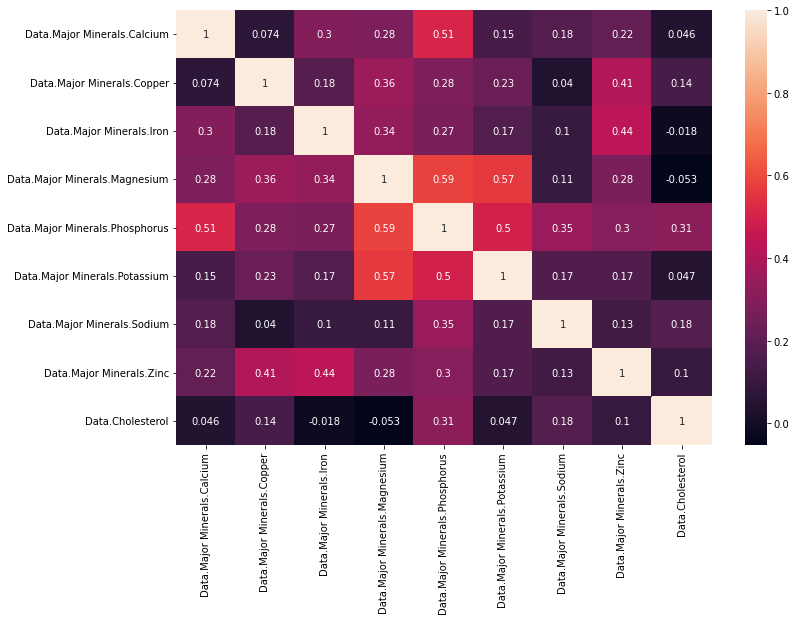

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(minerals.corr(),annot=True)

#### Analysis
1. This matrix consists of correlation between Minerals and Cholesterol.
2. Phosphorous is having a correlation with Cholesterol.
3. Calcium and Phosphorous are having a positive correlation but, it is not highly correlated so it cannot be removed from the analysis and modeling.
4. Iron is positively correlated with zinc with 0.43
5. Magnesium is highly corrlated with Potasium and phosphprous which can be interpreted as foods containing high in Magnesium can also have high Phosphorous and Potassium.


Vitamins

In [ ]:
vitamins_columns=[]
for i in df.columns:
  if i.startswith("Data.Vitamins"):
    vitamins_columns.append(i)
vitamins_columns.append('Data.Cholesterol')

In [ ]:
vitamins=df[vitamins_columns]

In [ ]:
vitamins.corr()

Data.Vitamins.Vitamin A - RAE  \
Data.Vitamins.Vitamin A - RAE                       1.000000   
Data.Vitamins.Vitamin B12                           0.589346   
Data.Vitamins.Vitamin B6                            0.296487   
Data.Vitamins.Vitamin C                             0.163354   
Data.Vitamins.Vitamin E                             0.158399   
Data.Vitamins.Vitamin K                             0.153599   
Data.Cholesterol                                    0.157519   

                               Data.Vitamins.Vitamin B12  \
Data.Vitamins.Vitamin A - RAE                   0.589346   
Data.Vitamins.Vitamin B12                       1.000000   
Data.Vitamins.Vitamin B6                        0.356780   
Data.Vitamins.Vitamin C                         0.060963   
Data.Vitamins.Vitamin E                         0.118510   
Data.Vitamins.Vitamin K                        -0.040145   
Data.Cholesterol                                0.242136   

                               Data.Vitamins.Vitamin B6  \
Data.Vitamins.Vitamin A - RAE                  0.296487   
Data.Vitamins.Vitamin B12                      0.356780   
Data.Vitamins.Vitamin B6                       1.000000   
Data.Vitamins.Vitamin C                        0.245973   
Data.Vitamins.Vitamin E                        0.344502   
Data.Vitamins.Vitamin K                       -0.002880   
Data.Cholesterol                               0.038983   

                               Data.Vitamins.Vitamin C  \
Data.Vitamins.Vitamin A - RAE                 0.163354   
Data.Vitamins.Vitamin B12                     0.060963   
Data.Vitamins.Vitamin B6                      0.245973   
Data.Vitamins.Vitamin C                       1.000000   
Data.Vitamins.Vitamin E                       0.165928   
Data.Vitamins.Vitamin K                       0.223718   
Data.Cholesterol                             -0.129165   

                               Data.Vitamins.Vitamin E  \
Data.Vitamins.Vitamin A - RAE                 0.158399   
Data.Vitamins.Vitamin B12                     0.118510   
Data.Vitamins.Vitamin B6                      0.344502   
Data.Vitamins.Vitamin C                       0.165928   
Data.Vitamins.Vitamin E                       1.000000   
Data.Vitamins.Vitamin K                       0.093620   
Data.Cholesterol                              0.000533   

                               Data.Vitamins.Vitamin K  Data.Cholesterol  
Data.Vitamins.Vitamin A - RAE                 0.153599          0.157519  
Data.Vitamins.Vitamin B12                    -0.040145          0.242136  
Data.Vitamins.Vitamin B6                     -0.002880          0.038983  
Data.Vitamins.Vitamin C                       0.223718         -0.129165  
Data.Vitamins.Vitamin E                       0.093620          0.000533  
Data.Vitamins.Vitamin K                       1.000000         -0.059236  
Data.Cholesterol                             -0.059236          1.000000

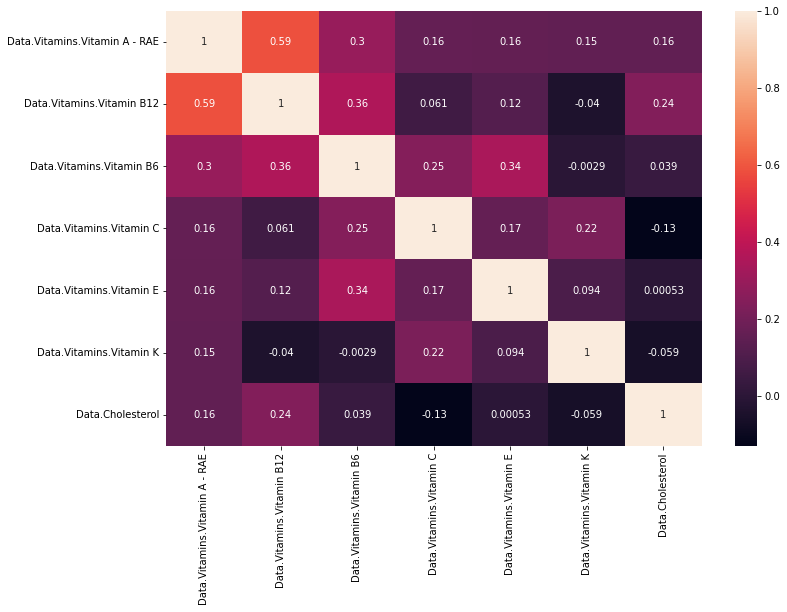

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(vitamins.corr(),annot=True)

#### Analysis

1. Vitamin A and Vitamin B12 have high correlation but, should be included in the analysis
2. Vitamin B12 is having a slight positive correlation with Cholesterol.
3. Vitamin A has a very low positive correlation with Cholesterol.

## Feature Engineering: Net Carbs


In [ ]:
df['NetCarbs']=df['Data.Carbohydrate']-df['Data.Fiber']

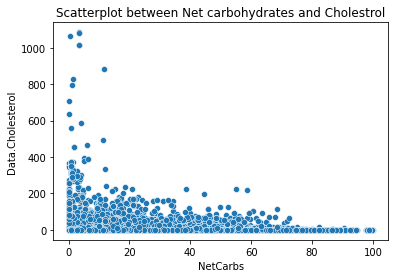

In [ ]:
## to find the relationship between two numerical variables, you can use the scatterplot
sns.scatterplot(data=df,x='NetCarbs',y='Data.Cholesterol')
plt.title("Scatterplot between Net carbohydrates and Cholestrol")
plt.show()

Analysis:

1. There is a slight negative relationship between Net Carbohydrates and Cholestrol.
2. As the NetCarbs content is increasing in the body, the cholestrol starts to decrease which is very slight change.

In [ ]:
df['NetCarbs'].corr(df['Data.Cholesterol'])

-0.2420391508366439

#### Analysis
This is to check the correlation between Netcarbs and data.cholesterol which indicates a negative correlation. As the Netcarbs goes on increasing, Cholesterol goes on decreasing.

In [ ]:
sorted_netcarbs=df.sort_values(by='NetCarbs',ascending=False)
sorted_netcarbs.head()

Category  \
6431                  Sugar substitute   
6424                             Sugar   
6422                             Sugar   
6423                             Sugar   
6427  Sugar substitute and sugar blend   

                                 Description  Nutrient Data Bank Number  \
6431    Sugar substitute, monk fruit, powder                   91108020   
6424  Sugar, white, confectioner's, powdered                   91101020   
6422                              Sugar, NFS                   91101000   
6423        Sugar, white, granulated or lump                   91101010   
6427        Sugar substitute and sugar blend                   91106010   

      Data.Alpha Carotene  Data.Beta Carotene  Data.Beta Cryptoxanthin  \
6431                    0                   0                        0   
6424                    0                   0                        0   
6422                    0                   0                        0   
6423                    0                   0                        0   
6427                    0                   0                        0   

      Data.Carbohydrate  Data.Cholesterol  Data.Choline  Data.Fiber  ...  \
6431             100.00                 0           0.0         0.0  ...   
6424              99.77                 0           0.0         0.0  ...   
6422              99.60                 0           0.0         0.0  ...   
6423              99.60                 0           0.0         0.0  ...   
6427              99.35                 0           0.0         0.0  ...   

      Data.Major Minerals.Sodium  Data.Major Minerals.Zinc  \
6431                           0                      0.00   
6424                           2                      0.01   
6422                           1                      0.01   
6423                           1                      0.01   
6427                           1                      0.01   

      Data.Vitamins.Vitamin A - RAE  Data.Vitamins.Vitamin B12  \
6431                              0                        0.0   
6424                              0                        0.0   
6422                              0                        0.0   
6423                              0                        0.0   
6427                              0                        0.0   

      Data.Vitamins.Vitamin B6  Data.Vitamins.Vitamin C  \
6431                       0.0                      0.0   
6424                       0.0                      0.0   
6422                       0.0                      0.0   
6423                       0.0                      0.0   
6427                       0.0                      0.0   

      Data.Vitamins.Vitamin E  Data.Vitamins.Vitamin K  \
6431                      0.0                      0.0   
6424                      0.0                      0.0   
6422                      0.0                      0.0   
6423                      0.0                      0.0   
6427                      0.0                      0.0   

      Data.Cholesterol.Group  NetCarbs  
6431                     NaN    100.00  
6424                     NaN     99.77  
6422                     NaN     99.60  
6423                     NaN     99.60  
6427                     NaN     99.35  

[5 rows x 40 columns]

### Lowest Netcarbs Products

In [ ]:
lowest_netcarbs=sorted_netcarbs.loc[sorted_netcarbs['NetCarbs']==0]
lowest_netcarbs[['Category','Data.Protein','Data.Carbohydrate','NetCarbs']]

Category  Data.Protein  Data.Carbohydrate  NetCarbs
887        Venison/deer steak         29.80                0.0       0.0
6927        Whiskey and water          0.00                0.0       0.0
2635               Fish stock          2.26                0.0       0.0
1529                     Tuna         25.54                0.0       0.0
679                      Beef         30.50                0.0       0.0
...                       ...           ...                ...       ...
1473                 Sardines         24.62                0.0       0.0
945            Chicken breast         27.96                0.0       0.0
1375                  Herring         24.58                0.0       0.0
1109                   Turkey         28.81                0.0       0.0
6331  Animal fat or drippings          2.23                0.0       0.0

[392 rows x 4 columns]

1. Chicken, meat and beef and related products have NetCarbs of 0 (Lowest)
2. All meat varieties have highest cholesterol and lowest NetCarbs values.

### Highest Netcarbs products

In [ ]:
highest_netcarbs=sorted_netcarbs.loc[sorted_netcarbs['NetCarbs']==100]
highest_netcarbs[['Category','Data.Protein','Data.Carbohydrate','NetCarbs']]

Category  Data.Protein  Data.Carbohydrate  NetCarbs
6431  Sugar substitute           0.0              100.0     100.0

1. Chocolate milk has the highest Netcarbs.
2. All Sugars related drinks are of highest NetCarbs.

## Common between Highest and Lowest Netcarbs

In [ ]:
## Label the dataframrs
highest_netcarbs['NetCarbs.Label']="Highest Netcarbs"
lowest_netcarbs['NetCarbs.Label']="Lowest Netcarbs"

In [ ]:
## Merging them into a single one
netcarbs_df=pd.concat([highest_netcarbs,lowest_netcarbs],axis=0)

In [ ]:
## apply groupby so that we can apply some aggregate operations
netcarbs_df.groupby('NetCarbs.Label')['Data.Protein','Data.Carbohydrate','Data.Cholesterol'].mean()

Data.Protein  Data.Carbohydrate  Data.Cholesterol
NetCarbs.Label                                                     
Highest Netcarbs       0.00000              100.0              0.00
Lowest Netcarbs       22.16773                0.0             90.25

### Analysis:
1. Highest netcarbs has highest Carbohydrate content food. which doesn't have protein content.

2. Lowest Netcarbs have 0 carbohydrate content and high protein

3. As there are only few rows in both dataframes, we are unable to extract a clear difference between Highest netCarbs and Lowest Netcarbs

Another Try (*Optional*)
1. Lowest Netcarbs value is 0 but, we wanted to see the Netcarbs which are less than 10 and compare with highest netcarbs

2. Highest netcarbs value is 100 but, we wanted to see the Netcarbs which are greater than 90.


In [ ]:
lowest_netcarbs=sorted_netcarbs.loc[sorted_netcarbs['NetCarbs']<2]
lowest_netcarbs.shape

(1028, 40)

In [ ]:
highest_netcarbs=sorted_netcarbs.loc[sorted_netcarbs['NetCarbs']>75]
highest_netcarbs.shape

(157, 40)

In [ ]:
## Label the dataframrs
highest_netcarbs['NetCarbs.Label']="Highest Netcarbs"
lowest_netcarbs['NetCarbs.Label']="Lowest Netcarbs"

In [ ]:
## Merging them into a single one
netcarbs_df=pd.concat([highest_netcarbs,lowest_netcarbs],axis=0)

In [ ]:
## apply groupby so that we can apply some aggregate operations
netcarbs_df.groupby('NetCarbs.Label')['Data.Protein','Data.Carbohydrate','Data.Cholesterol'].mean()

Data.Protein  Data.Carbohydrate  Data.Cholesterol
NetCarbs.Label                                                     
Highest Netcarbs      4.305096          86.002102          0.445860
Lowest Netcarbs      16.044640           0.921391         89.284047

### Analysis:
1. When you change the threshold value also, highest netcarbs food contain high Carbohydrate content.
2. Lowest Netcarbs foods contain high protein.

3. And Even when you look at the cholesterol levels, there is almost negligible amount of cholesterol in the highest netcarbs foods
4. foods containing Lowest netcarbs have high protein and as well as high cholesterol

#### Deeper Analysis for Cholestrol and NetCarbs.(Optional)

Convert the NetCarbs into Categorical variables by binning and then draw a boxplot between Netcarbs and Cholesterol to see whether there is any change in their respective distributions.


In [ ]:
bins=np.linspace(df['NetCarbs'].min()-1,df['NetCarbs'].max()+1,4,endpoint=True)
labels=['Low','Medium','High']

In [ ]:
bins,labels

(array([ -1.,  33.,  67., 101.]), ['Low', 'Medium', 'High'])

In [ ]:
df['CarbsBin']=pd.cut(df['NetCarbs'],bins=bins,labels=labels)

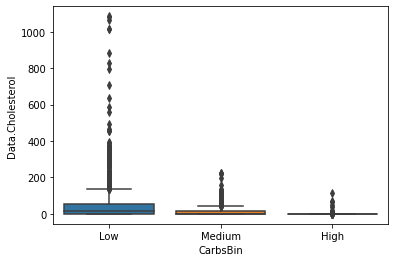

In [ ]:
sns.boxplot(data=df,x='CarbsBin',y='Data.Cholesterol')

### Analysis
There is a decreasing trend in the boxplots when the CarbsBin is increasing

# Advanced EDA

# Plots

# Splitting the foods into Fruits, Vegetables and Salads, Milk and Meat Products

## Extracting Meat products

In [ ]:
foods=df['Category'].value_counts().index
foods=pd.DataFrame(foods)
foods

0
0                      Infant formula
1                                Rice
2                               Bread
3                              Cookie
4                              Potato
...                               ...
2253                        Goat ribs
2254  Ham or pork with mushroom sauce
2255     Broccoli casserole with rice
2256                           Brandy
2257                     Lambsquarter

[2258 rows x 1 columns]

In [ ]:
## Some possible keywords in the meat products
meat=['pork','beef','chicken','hamburgers','eggs','liver','goat','quail','duck','gizzard','shrimp','turkey','hollandaise','sausage',
      'ham','crab','steak','turkey','egg','bacon','ham','meat','pig','kidney','seafood','fish','octopus','rabbit','salmon','ground',
      'stew','lamb','mutton','lobster','pepperoni','patty','tuna','ribs','deer','squid','roe','eel','chitterlings','cod','hogmaws',
      'omelet','abalone','sardines','herring','sweetbreads','heart','hog maws','cheeseburger','brains']

In [ ]:
me=[]
for i in meat:
  me.append(i)
  me.append(i.capitalize())

In [ ]:
def get_meat_products(me):
  meat_df=pd.DataFrame()
  ls=[]
  for i in me:
    ls.append(foods[foods[0].str.contains(i,case=False)][0].values)
  ms=[]
  for i in ls[0]:
    ms.append(i)
  ms=[]
  for i in range(len(ls)):
    for j in range(len(ls[i])):
      ms.append(ls[i][j])
  meat_df['Category']=ms
  return meat_df

In [ ]:
meat_df=get_meat_products(meat)
meat_df.shape

(1169, 1)

In [ ]:
meat_df.head()

Category
0                  Pork
1             Pork chop
2  Pork steak or cutlet
3            Pork roast
4            Pork bacon

In [ ]:
meat_df.shape,df.shape

((1169, 1), (6364, 41))

In [ ]:
meat_df=df.loc[df['Category'].isin(meat_df['Category'])]
non_meat_df=df.loc[~df['Category'].isin(meat_df['Category'])]

In [ ]:
meat_df.shape,non_meat_df.shape,(meat_df.shape[0]+non_meat_df.shape[0]==df.shape[0])

((1841, 41), (4523, 41), True)

## Go Deep into the non-meat products like Milk,Vegetables, Cereal, Chocolates, greens etc

### Difference in features between Meat vs non-meat dataframe

In [ ]:
meat_df['Data.Cholesterol'].mean(),non_meat_df['Data.Cholesterol'].mean()

(78.32373709940249, 15.945169135529516)

As you can see the distinction with the cholesterol values with the meat and non-meat, as the mean value of cholesterol is highly different with the meat and non_meat products.

1. As we can observe that the meat_df contains many foods with Some or more Cholesterol in higher as meat products contain high cholesterol
2. And non-meat products contain less number of more cholesterol related foods which makes sense


## Digging Deeper into Non Meat dataframe
1. Vegetables and soups
2. Fruits
3. Chocolates, Energy drinks
4. Al Milk products like Cereal

These are the possible splits from an Non-meat dataframe

In [ ]:
non_meat_items=non_meat_df['Category'].value_counts().index
non_meat_items=pd.DataFrame(non_meat_items)

### Extracting Fruits

In [ ]:
non_meat_df.groupby('Category')['Data.Cholesterol'].mean().reset_index().sort_values(by='Data.Cholesterol',ascending=False).sample(25)

Category  Data.Cholesterol
1082                                       Rhubarb          0.000000
551                                        Fondant          0.000000
917                                   Palak Paneer          7.000000
805                              Midnight sandwich         38.000000
750                                Light ice cream         25.333333
1177                                    Sour cream         25.750000
1189                                     Soyburger         10.000000
469                                          Crepe         90.285714
1293                                   Tom Collins          0.000000
404                                        Cobbler          0.571429
584                   Fruit and vegetable smoothie          0.600000
977                                    Pesto sauce         16.000000
1020                           Poppy seed dressing         15.000000
1038             Potatoes with cheese and broccoli          4.000000
1040                                 Pretzel chips          0.000000
110                             Biscuit with gravy         16.000000
729                                       Kohlrabi          1.000000
318               Cereal (Quaker Toasted Oat Bran)          0.000000
625                                         Gimlet          0.000000
1116                                  SNICKERS Bar         13.000000
304   Cereal (Post Great Grains Banana Nut Crunch)          0.000000
283         Cereal (Malt-O-Meal Cinnamon Toasters)          0.000000
117                     Black beans and brown rice          0.000000
457                                Cranberry sauce          0.000000
298                      Cereal (Post Bran Flakes)          0.000000

In [ ]:
fruits=['juice','pineapple','apple','cherries','pomegranate','watermelon','beverage','grape','tangerine','banana','orange'
,'carrot','juice','fruit','melon','mango','peach','papaya','strawberries','apples','apricot','blueberries','kiwi','redberries','peaches',
'avocados','nectarine','peach','grape','cranberry','blackberry','berry','guava']

In [ ]:
fs=[]
for i in fruits:
  fs.append(i)
  fs.append(i.capitalize())

In [ ]:
def get_fruits_products(fs):
  fruits_df=pd.DataFrame()
  ls=[]
  for i in fs:
    ls.append(non_meat_items[non_meat_items[0].str.contains(i,case=False)][0].values)
  ms=[]
  for i in ls[0]:
    ms.append(i)
  ms=[]
  for i in range(len(ls)):
    for j in range(len(ls[i])):
      ms.append(ls[i][j])
  fruits_df['Category']=ms
  return fruits_df

In [ ]:
fruits_df=get_fruits_products(fruits)
fruits_df.shape

(376, 1)

In [ ]:
non_meat_df.shape,fruits_df.shape, non_meat_df.shape[0]-fruits_df.shape[0]

((4523, 41), (376, 1), 4147)

In [ ]:
fruits_df=non_meat_df.loc[non_meat_df['Category'].isin(fruits_df['Category'])]
non_meat_fruits_df=non_meat_df.loc[~non_meat_df['Category'].isin(fruits_df['Category'])]

In [ ]:
fruits_df.shape[0]+non_meat_fruits_df.shape[0]==non_meat_df.shape[0]

True

### Extracting all the Milk products

In [ ]:
non_meat_fruits_df.groupby('Category')['Data.Cholesterol'].mean().reset_index().sort_values(by='Data.Cholesterol',ascending=False).sample(25)

Category  Data.Cholesterol
1174                Vodka and cola          0.000000
95                  Breakfast link          0.000000
58                Beer cheese soup         45.000000
1158            Vegetable smoothie          4.000000
585                      Jagerbomb          0.000000
1144               Veal parmigiana         64.000000
943                         Sambar          0.000000
1099                   Tom Collins          0.000000
584               Italian dressing          0.666667
1131          Turnover or dumpling         12.750000
1094                     Thuringer         74.000000
1091                Teriyaki sauce          0.000000
1009  Spaghetti sauce with poultry         18.000000
1219                   Wonton soup          4.000000
21                       Armadillo         77.000000
870                        Pudding          8.583333
466                    Freezer pop          0.000000
403                  Danish pastry         52.666667
855                 Potato pancake         60.000000
560          Hot chocolate / Cocoa          4.062500
962                          Shark         63.600000
771         Pasta with cream sauce         22.416667
69                           Bison         82.000000
301                Chinese pancake          0.000000
157                       Celeriac          2.000000

In [ ]:
milk_products=['milk','cheese','cereal','cream','nuts','macaroni','peanut butter','butter','ghee','vanilla','cream','granola','bar',
               'poultry','muscle','cottage','cheddar','sundae','paneer','yogurt']


In [ ]:
mp=[]
for i in milk_products:
  mp.append(i)
  mp.append(i.capitalize())

In [ ]:
non_meat_fruits_items=non_meat_fruits_df['Category'].value_counts().index
non_meat_fruits_items=pd.DataFrame(non_meat_fruits_items)

In [ ]:
def get_milk_products(mp):
  milk_products_df=pd.DataFrame()
  ls=[]
  for i in mp:
    ls.append(non_meat_fruits_items[non_meat_fruits_items[0].str.contains(i,case=False)][0].values)
  ms=[]
  for i in ls[0]:
    ms.append(i)
  ms=[]
  for i in range(len(ls)):
    for j in range(len(ls[i])):
      ms.append(ls[i][j])
  milk_products_df['Category']=ms
  return milk_products_df

In [ ]:
milk_products_df=get_milk_products(mp)
milk_products_df.shape

(830, 1)

In [ ]:
milk_products_df=non_meat_fruits_df.loc[non_meat_fruits_df['Category'].isin(milk_products_df['Category'])]
non_meat_fruits_milk_products_df=non_meat_fruits_df.loc[~non_meat_fruits_df['Category'].isin(milk_products_df['Category'])]

In [ ]:
non_meat_fruits_milk_products_df.shape[0]+milk_products_df.shape[0]==non_meat_fruits_df.shape[0]

True

## Extracting Vegetables and salads from Non Meat Fruits Milk products Dataframe

In [ ]:
non_meat_fruits_milk_products_df.groupby('Category')['Data.Cholesterol'].mean().reset_index().sort_values(by='Data.Cholesterol').sample(25)

Category  Data.Cholesterol
71                               Borscht          5.000000
430                    Long rice noodles          0.000000
560                                  Pie         23.671429
796                       Tamarind drink          0.000000
514                               Onions          0.800000
741                       Split pea soup          1.000000
728                            Spaghetti          5.000000
620                        Queso Asadero        105.000000
698                         Sirloin tips         24.000000
749                      Squash and corn          0.000000
168                           Cobb salad         61.000000
901                                 Whey          6.000000
871                  Vegetables and rice          0.000000
36                             Bean soup          3.000000
77                        Bread stuffing          0.000000
710                           Soft serve         16.000000
47                                 Beets          0.857143
6    Alfredo sauce with added vegetables         35.000000
489               Noodle and potato soup          1.000000
552                       Pepperpot soup         20.000000
44                                Beaver        117.000000
911                          White beans          0.000000
819                     Tomato rice soup          1.000000
671                                Salsa          0.000000
294                         French toast        128.857143

Apart from Meat, Fruits, Milk products, rest are vegetables, salads and snacks. So, we can take the *Non_meat_fruits_milk_products* dataframe as the *vegetables_salads_df*

In [ ]:
vegetables_salads_df=non_meat_fruits_milk_products_df.copy()

## WordCloud for all the different types of food

In [ ]:
f=''
for i in fruits_df['Category']:
  f=f+' '+i
v=''
for i in vegetables_salads_df['Category']:
  v=v+' '+i
mi=''
for i in milk_products_df['Category']:
  mi=mi+' '+i
mea=''
for i in meat_df['Category']:
  mea=mea+' '+i
cloud1=WordCloud(background_color='white').generate(f)
cloud2=WordCloud(background_color='white').generate(v)
cloud3=WordCloud(background_color='white').generate(mi)
cloud4=WordCloud(background_color='white').generate(mea)

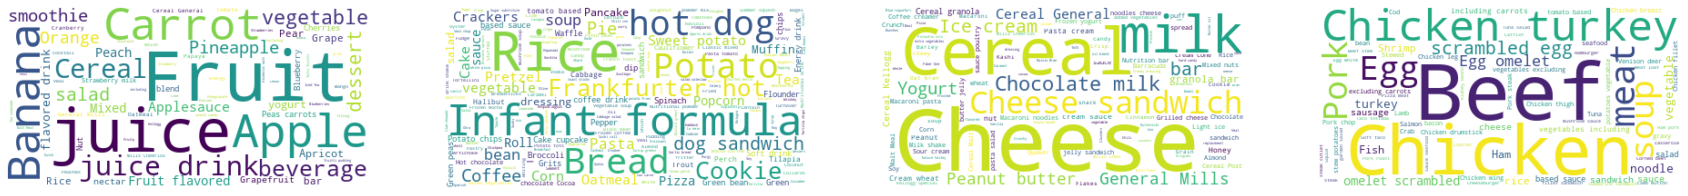

In [ ]:
fig,(ax1,ax2,ax3,ax4)=plt.subplots(1,4,figsize=(30,15))
ax1.imshow(cloud1, interpolation='bilinear')
ax2.imshow(cloud2, interpolation='bilinear')
ax3.imshow(cloud3, interpolation='bilinear')
ax4.imshow(cloud4, interpolation='bilinear')
ax1.axis("off")
ax2.axis("off")
ax3.axis("off")
ax4.axis("off")

plt.show()

# Reduce Weight and Cholesterol

For a person, Who has a lot of weight and wants to reduce it, he has to eat a lot of fruits and vegetables and a little milk products.
This statement can be proven with the help of average cholesterol levels in each of the products.

1. I have grouped all the food products by Fruits, Vegetables and Salads, Milk Products and then Meat Products.

2. Take the average for each dataframe
3. High amount of water content is contained in fruits which helps in cleaning up the body

In [ ]:
print("Average Cholesterol Level for Fruits Products: ",fruits_df['Data.Cholesterol'].mean())
print("Average Cholesterol Level for Vegetables and salads products: ",vegetables_salads_df['Data.Cholesterol'].mean())
print("Average Cholesterol Level for Milk Products: ",milk_products_df['Data.Cholesterol'].mean())
print("Average Cholesterol Level for Meat Products: ",meat_df['Data.Cholesterol'].mean())

Average Cholesterol Level for Fruits Products:  1.8976377952755905
Average Cholesterol Level for Vegetables and salads products:  16.7027027027027
Average Cholesterol Level for Milk Products:  19.703252032520325
Average Cholesterol Level for Meat Products:  78.32373709940249


### Analysis
As we can see from the above values that Meat Products contain high amount of cholesterol whereas fruits contain the least amount of cholesterol and highest minerals and water content.

In [ ]:
print("Average Protein Level for Fruits Products: ",fruits_df['Data.Protein'].mean())
print("Average Protein Level for Vegetables and salads products: ",vegetables_salads_df['Data.Protein'].mean())
print("Average Protein Level for Milk Products: ",milk_products_df['Data.Protein'].mean())
print("Average Protein Level for Meat Products: ",meat_df['Data.Protein'].mean())

Average Protein Level for Fruits Products:  1.483097112860891
Average Protein Level for Vegetables and salads products:  6.117990599294953
Average Protein Level for Milk Products:  8.714539295392965
Average Protein Level for Meat Products:  14.605915263443768


### Analysis
1. So, from the above information, we can say that
eating fruits and vegetables is very much beneficial for people who wants to reduce weight which has low cholesterol levels.

2. And Meat has high protein in it.

3. So, a person can eat a lot of Fruits and Vegetables and salads during his week and Milk and Meat during the weekend so that his protein levels are maintained.



In [ ]:
print("Average Water Content for Fruits Products: ",fruits_df['Data.Water'].mean())
print("Average Water Content for Vegetables and salads products: ",vegetables_salads_df['Data.Water'].mean())
print("Average Water Content for Milk Products: ",milk_products_df['Data.Water'].mean())
print("Average Water Content for Meat Products: ",meat_df['Data.Water'].mean())

Average Water Content for Fruits Products:  74.797217847769
Average Water Content for Vegetables and salads products:  58.83321386604017
Average Water Content for Milk Products:  44.81338753387535
Average Water Content for Meat Products:  64.7707767517654


### Analysis:
1. As you can see from the analysis that there is a high water content in fruits.
2. Then Vegetables and salads also contain a good amount of water content.

## Plot-1
## Distribution of Nutrients across different food groups

1. Cholesterol
2. Water Content
3. Protein content

You can see that these nutrient contents across different food categories.

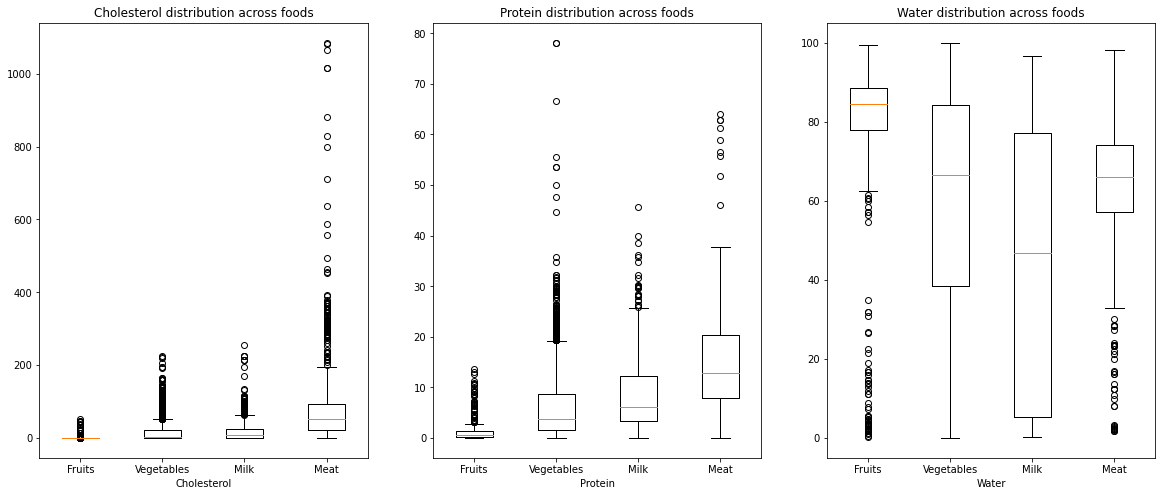

In [ ]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(20,8))
ax1.boxplot([fruits_df['Data.Cholesterol'],vegetables_salads_df['Data.Cholesterol'],milk_products_df['Data.Cholesterol'],meat_df['Data.Cholesterol']])
ax1.set_xlabel("Cholesterol")
ax1.set_xticklabels(['Fruits','Vegetables','Milk','Meat'])
ax1.set_title("Cholesterol distribution across foods")
ax2.boxplot([fruits_df['Data.Protein'],vegetables_salads_df['Data.Protein'],milk_products_df['Data.Protein'],meat_df['Data.Protein']])
ax2.set_xlabel("Protein")
ax2.set_xticklabels(['Fruits','Vegetables','Milk','Meat'])
ax2.set_title("Protein distribution across foods")
ax3.boxplot([fruits_df['Data.Water'],vegetables_salads_df['Data.Water'],milk_products_df['Data.Water'],meat_df['Data.Water']])
ax3.set_xlabel("Water")
ax3.set_xticklabels(['Fruits','Vegetables','Milk','Meat'])
ax3.set_title("Water distribution across foods")
plt.show()


### Analysis:
1. The cholesterol distributions for each category of foods and we can see from the distribution that Meat products have the distribution at a higher range when compared to Milk, vegetables and fruits distributions.
2. When looking at the Protein distribution, it is seen that the Meat has the highest protien content which is evident from the distribution.
3. When you look at the water content, fruits have the highest water content and comparitevely, vegetables have a good amount of water which can be clear from the distribution.

### Business Recommendation
If a person wants to reduce weight or cholesterol contents in the body, he/she should eat fruits and drink water extensively and to maintain the protein content, Milk and Meat should be consumed on a weekend basis.
1. Eat foods with high water and Mineral content. The screenshot attached consists of top 10 foods with high water content.

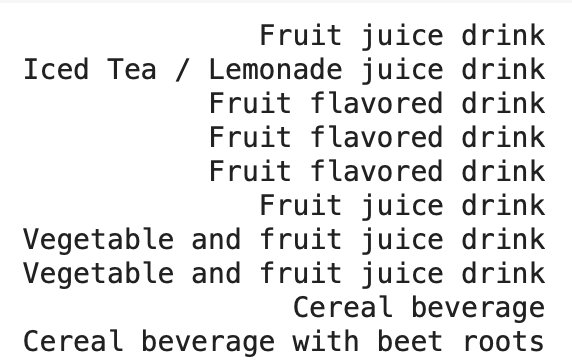

2. The screenshots attached below consists of top 10 high protein foods in Milk products and Meat products which should be eaten in a balanced way.

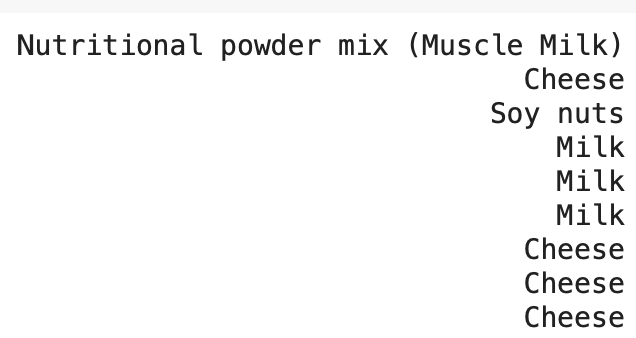

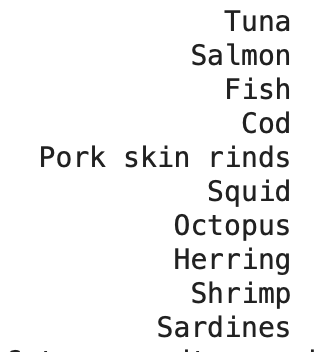

In [ ]:
fruits_df.sort_values(by='Data.Water',ascending=False)['Category'].head(10)

6851                  Fruit juice drink
6773    Iced Tea / Lemonade juice drink
6863               Fruit flavored drink
6860               Fruit flavored drink
6862               Fruit flavored drink
6864                  Fruit juice drink
6859    Vegetable and fruit juice drink
6858    Vegetable and fruit juice drink
6748    Cereal beverage with beet roots
6747                    Cereal beverage
Name: Category, dtype: object

In [ ]:
milk_products_df.sort_values(by='Data.Protein',ascending=False)['Category'].head(10)

7015                 Nutritional powder mix (Muscle Milk)
519                                                Cheese
2937                                             Soy nuts
366                                                  Milk
365                                                  Milk
517                                                Cheese
499                                                Cheese
513                                                Cheese
3756    Nutrition bar (South Beach Living High Protein...
3759                Nutrition bar or meal replacement bar
Name: Category, dtype: object

In [ ]:
meat_df.sort_values(by='Data.Protein',ascending=False)['Category'].head(10)

1468             Salmon
1249               Fish
1306                Cod
826     Pork skin rinds
1584              Squid
1571            Octopus
1373            Herring
1657             Shrimp
1472           Sardines
1762       Fish moochim
Name: Category, dtype: object

# Fat Analysis

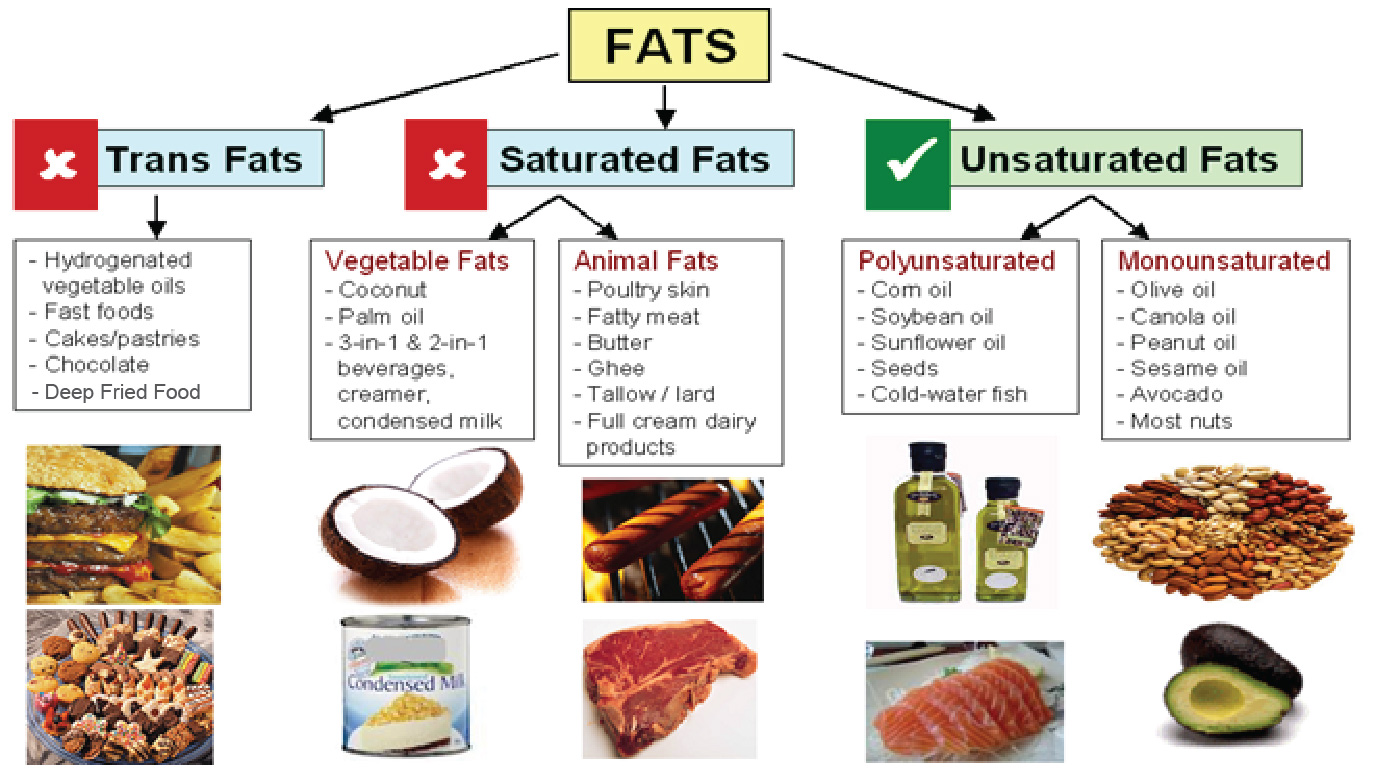

### Some information about fats
1. Fats are of two types: Saturated vs Unsaturated
2. Unsaturated fats are good fats which help in blood cholesterol levels, ease inflammation and reduce heart attacks
3. They are of two types: Monounsaturated Fats and Polyunsaturated Fats.
4. Saturated fats are not that bad and found mainly most percentage in animal products and meat. it is good that we eat foods containing less saturated fats.


#### Some Preprocessing needed for Cholesterol

1. There cannot be products with zero cholesterol.
2. You can't direcly calculate the mean for the whole data and then impute it. There are products with very high cholesterol and with very low cholesterol.
3. As we have already grouped our foods into vegetables, milk, fruits, and meat, it is better to impute the mean of each group as their imputation measure.

In [ ]:
print("Percentage of 0's in Cholesterol column for Fruits",(fruits_df.loc[fruits_df['Data.Cholesterol']==0,'Data.Cholesterol'].count()/fruits_df.shape[0])*100,'%')
print("Percentage of 0's in Cholesterol column for Vegetables and Salads",(vegetables_salads_df.loc[vegetables_salads_df['Data.Cholesterol']==0,'Data.Cholesterol'].count()/vegetables_salads_df.shape[0])*100,'%')
print("Percentage of 0's in Cholesterol column for Milk",(milk_products_df.loc[milk_products_df['Data.Cholesterol']==0,'Data.Cholesterol'].count()/milk_products_df.shape[0])*100,'%')
print("Percentage of 0's in Cholesterol column for Meat",(meat_df.loc[meat_df['Data.Cholesterol']==0,'Data.Cholesterol'].count()/meat_df.shape[0])*100,'%')

Percentage of 0's in Cholesterol column for Fruits 80.31496062992126 %
Percentage of 0's in Cholesterol column for Vegetables and Salads 46.29847238542891 %
Percentage of 0's in Cholesterol column for Milk 34.417344173441734 %
Percentage of 0's in Cholesterol column for Meat 2.6615969581749046 %


## Analysis about Imputation of Cholesterol

1. There are **80%** of rows in fruits dataframe which are 0's which can be due to two reason.

  a) There is high amount of water content in fruits and Absolutely zero(0) cholesterol in fruits.

  b) May be some missing data
  
 **** Leaving them as it is by considering the reason that fruits have zero cholesterol.***

2. There are close to **50%** of 0's in the vegetables dataframe. two ways to impute them

  a) Leave them as it is as vegetable containing food has zero cholesterol in most of them. 

3. There are close to **35%**of 0's in the Milk dataframe. two ways to impute them

 a) Mean value should be fine

 b) Milk products also contain 0.5% cholesterol and in some products almost 0 cholesterol. So, we can leave it

4. There are only **2**% of values in the dataframe containing the 0's in the dataframe.

 a) As we have only 2% of values as 0's, we can impute them using mean value

 b) median if the data is skewed to the left or right
 
 c) It is not a good idea to drop the rows

 d) I would impute it by mean or median rather than by doing predictive analysis which would make much difference for my analysis.

 e) Meat contains the highest percentage of cholesterol

In [ ]:
## deep copy for all the dataframes
ffruits_df=fruits_df.copy()
vvegetables_salads_df=vegetables_salads_df.copy()
mmilk_products_df=milk_products_df.copy()
mmeat_df=meat_df.copy()

### Check the correlation between fats within fruits to check whether any of the fats can be eliminated or not

##### Start with Fruits

In [ ]:
cols=[]
for i in fruits_df.columns:
  if i.startswith('Data.Fat'):
    cols.append(i)
cols.append('Data.Cholesterol') 
## to also check the correlation with the target

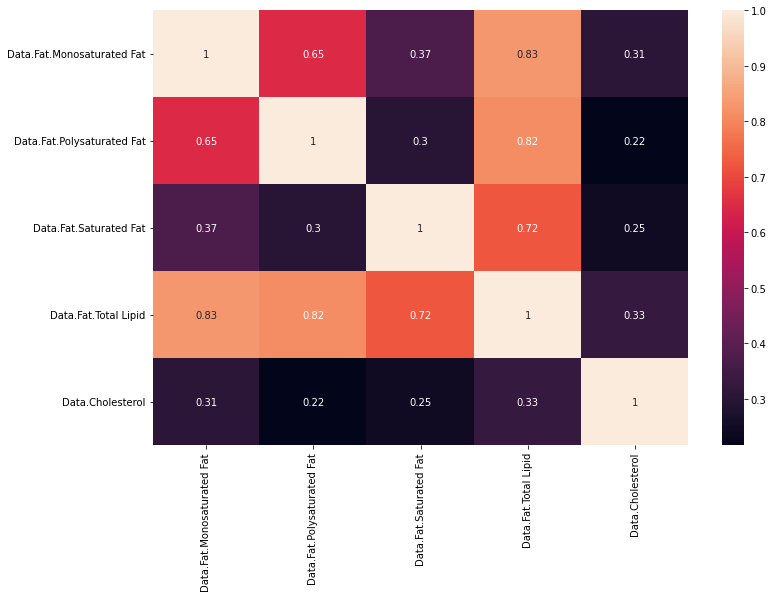

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(fruits_df[cols].corr(),annot=True)

As all the saturated and unsaturated fats have a pretty high positive correlation with Total Lipid, we can ignore that column from the analysis.

In [ ]:
fruits_df.drop(columns=['Data.Fat.Total Lipid'],inplace=True)

In [ ]:
fruits_df.head()

Category  \
6746                        Chicory beverage   
5308                             Apple juice   
5257                            Fruit nectar   
5314                       Apple-prune juice   
4227  Cereal (General Mills Cheerios Fruity)   

                                     Description  Nutrient Data Bank Number  \
6746                            Chicory beverage                   92202010   
5308  Apple juice, with added calcium, baby food                   67202010   
5257                           Fruit nectar, NFS                   64200100   
5314                Apple-prune juice, baby food                   67203700   
4227      Cereal (General Mills Cheerios Fruity)                   57221810   

      Data.Alpha Carotene  Data.Beta Carotene  Data.Beta Cryptoxanthin  \
6746                    0                   0                        0   
5308                    0                   0                        0   
5257                    0                 402                       26   
5314                    1                   8                        2   
4227                   25                  38                        0   

      Data.Carbohydrate  Data.Cholesterol  Data.Choline  Data.Fiber  ...  \
6746               1.42                 0           1.9         0.0  ...   
5308              11.10                 0           1.8         0.4  ...   
5257              13.12                 0           1.5         0.3  ...   
5314              18.10                 0           1.8         0.1  ...   
4227              84.19                 0          17.5         5.9  ...   

      Data.Major Minerals.Zinc  Data.Vitamins.Vitamin A - RAE  \
6746                      0.01                              0   
5308                      0.03                              0   
5257                      0.02                             35   
5314                      0.05                              1   
4227                     13.89                            534   

      Data.Vitamins.Vitamin B12  Data.Vitamins.Vitamin B6  \
6746                       0.00                     0.000   
5308                       0.00                     0.030   
5257                       0.00                     0.015   
5314                       0.00                     0.035   
4227                       5.59                     1.850   

      Data.Vitamins.Vitamin C  Data.Vitamins.Vitamin E  \
6746                      0.0                     0.00   
5308                     21.2                     0.00   
5257                     15.2                     0.21   
5314                     67.5                     0.05   
4227                     55.6                     0.79   

      Data.Vitamins.Vitamin K  Data.Cholesterol.Group  NetCarbs  CarbsBin  
6746                      0.0                     NaN      1.42       Low  
5308                      0.0                     NaN     10.70       Low  
5257                      0.8                     NaN     12.82       Low  
5314                      1.3                     NaN     18.00       Low  
4227                      0.9                     NaN     78.29      High  

[5 rows x 40 columns]

Try combining the mono and poly unsaturated fats and then try to compare saturated with unsaturated fats for fruits.

In [ ]:
fruits_df['Data.Fat.Unsaturated Fat']=fruits_df['Data.Fat.Monosaturated Fat']+fruits_df['Data.Fat.Polysaturated Fat']

In [ ]:
fruits_df.drop(columns=['Data.Fat.Monosaturated Fat','Data.Fat.Polysaturated Fat'],inplace=True)

Try to fit a correlation matrix to see if the pattern did change or not.

In [ ]:
cols=[]
for i in fruits_df.columns:
  if i.startswith('Data.Fat'):
    cols.append(i)
cols.append('Data.Cholesterol') 
## to also check the correlation with the target

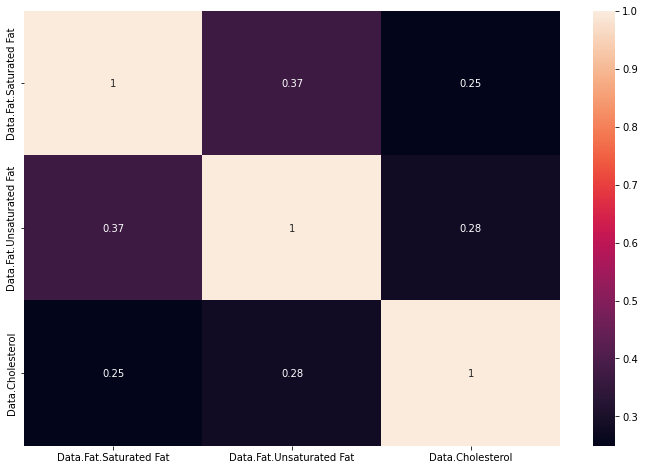

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(fruits_df[cols].corr(),annot=True)

There seems to be no special correlation (High Positive or High Negative) correlation between saturated and unsaturated fats

Move to Vegetables

In [ ]:
cols=[]
for i in vegetables_salads_df.columns:
  if i.startswith('Data.Fat'):
    cols.append(i)
cols.append('Data.Cholesterol') 
## to also check the correlation with the target

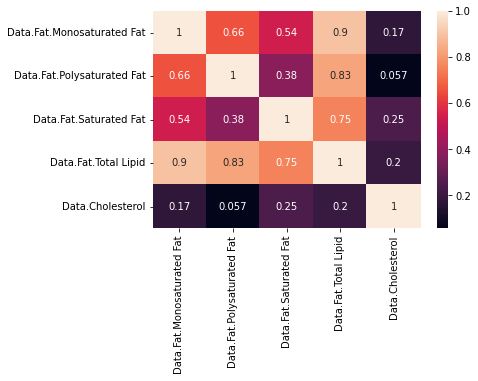

In [ ]:
sns.heatmap(vegetables_salads_df[cols].corr(),annot=True)

As you can see from the correlation matrix that the Monosaturated fats have a very high positive correlation with Total Lipid.
So, we can remove total lipid to reduce the complexity

In [ ]:
vegetables_salads_df.drop(columns=['Data.Fat.Total Lipid'],inplace=True)

Combining Mono and Poly unsaturated Fats

In [ ]:
vegetables_salads_df['Data.Fat.Unsaturated Fat']=vegetables_salads_df['Data.Fat.Monosaturated Fat']+vegetables_salads_df['Data.Fat.Polysaturated Fat']

In [ ]:
vegetables_salads_df.drop(columns=['Data.Fat.Monosaturated Fat','Data.Fat.Polysaturated Fat'],inplace=True)

In [ ]:
cols=[]
for i in vegetables_salads_df.columns:
  if i.startswith('Data.Fat'):
    cols.append(i)
cols.append('Data.Cholesterol') 
## to also check the correlation with the target

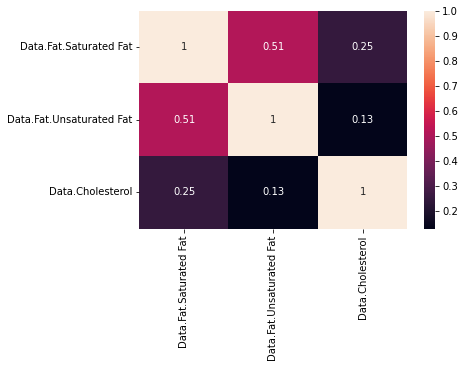

In [ ]:
sns.heatmap(vegetables_salads_df[cols].corr(),annot=True)

### Next, Milk Products

In [ ]:
cols=[]
for i in milk_products_df.columns:
  if i.startswith('Data.Fat'):
    cols.append(i)
cols.append('Data.Cholesterol') 
## to also check the correlation with the target

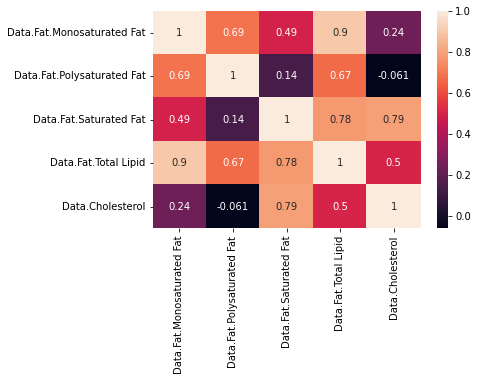

In [ ]:
sns.heatmap(milk_products_df[cols].corr(),annot=True)

As we can see from the correlation matrix that the Monosaturated fats are highly correlated with Total Lipid, so we can delete the Total Lipid column which can help in reducing the complexity.

In [ ]:
milk_products_df.drop(columns=['Data.Fat.Total Lipid'],inplace=True)

Combining Mono and Poly unsaturated fats

In [ ]:
milk_products_df['Data.Fat.Unsaturated Fat']=milk_products_df['Data.Fat.Monosaturated Fat']+milk_products_df['Data.Fat.Polysaturated Fat']

In [ ]:
milk_products_df.drop(columns=['Data.Fat.Monosaturated Fat','Data.Fat.Polysaturated Fat'],inplace=True)

In [ ]:
cols=[]
for i in milk_products_df.columns:
  if i.startswith('Data.Fat'):
    cols.append(i)
cols.append('Data.Cholesterol') 
## to also check the correlation with the target

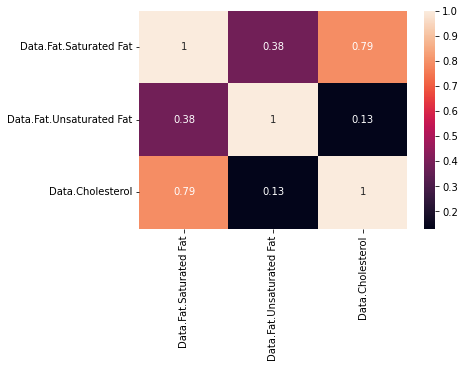

In [ ]:
sns.heatmap(milk_products_df[cols].corr(),annot=True)

## Analysis

1. As we can see from the high saturated fat foods contain high cholesterol which is evident from the high correlation between Saturated Fats and Cholesterol

2. So, we can conclude that Milk products contain high saturated fat content.

End with Meat Products

In [ ]:
cols=[]
for i in meat_df.columns:
  if i.startswith('Data.Fat'):
    cols.append(i)
cols.append('Data.Cholesterol') 
## to also check the correlation with the target

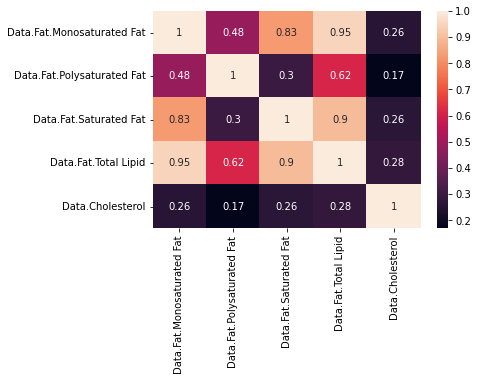

In [ ]:
sns.heatmap(meat_df[cols].corr(),annot=True)

##### Analysis
1. Both Saturated Fat and Monounsaturated Fats are highly correlated with Data Total Lipid which is suggesting that one can be removed
2. We can remove the Total Lipid column

In [ ]:
meat_df.drop(columns=['Data.Fat.Total Lipid'],inplace=True)

In [ ]:
meat_df['Data.Fat.Unsaturated Fat'] = meat_df['Data.Fat.Monosaturated Fat']+meat_df['Data.Fat.Polysaturated Fat']

In [ ]:
meat_df.drop(columns=['Data.Fat.Monosaturated Fat','Data.Fat.Polysaturated Fat'],inplace=True)

In [ ]:
cols=[]
for i in meat_df.columns:
  if i.startswith('Data.Fat'):
    cols.append(i)
cols.append('Data.Cholesterol') 
## to also check the correlation with the target

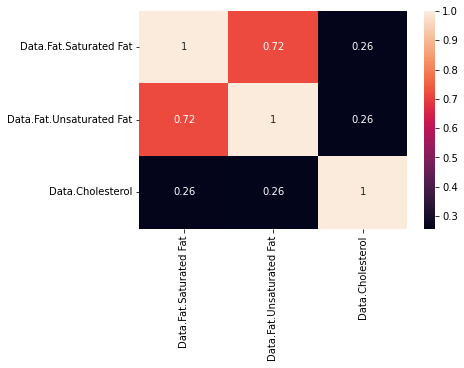

In [ ]:
sns.heatmap(meat_df[cols].corr(),annot=True)

## Preview

1. Now, we have grouped the Mono and Poly unsaturated Fata together and removed the Total Lipid column for every branch of foods as it is highly correlated with Mono or Poly unsaturated foods or Saturated Foods.
2. Then we can use these columns Saturated and Unsaturated foods to see how they are distributed between Vegetables, fruits, milk and meat products.

In [ ]:
print("Average Saturated content in Fruits: ",fruits_df['Data.Fat.Saturated Fat'].mean())
print("Average Saturated content in Vegetables: ,",vegetables_salads_df['Data.Fat.Saturated Fat'].mean())
print("Average Saturated content in Milk Products: ",milk_products_df['Data.Fat.Saturated Fat'].mean())
print("Average Saturated content in Meat products: ",meat_df['Data.Fat.Saturated Fat'].mean())

Average Saturated content in Fruits:  0.4857559055118112
Average Saturated content in Vegetables: , 2.4555149823736695
Average Saturated content in Milk Products:  5.171283197831975
Average Saturated content in Meat products:  2.9694877783813225


From this,we can conclude that Milk products contain more saturated content than meat which is clearly evident.

Now, we will concentrate on Milk products specifically and find more insights on which milk products contain high cholesterol and high saturated content

In [ ]:
categories=milk_products_df['Category'].value_counts().reset_index()
categories.rename({'index':'Item name','Category':'count'},inplace=True)

# Dividing milk products into sub groups

In [ ]:
milk_products_df['Category'].nunique()

301

### Cereal, Breakfast bars, Nutrition Bars

In [ ]:
cereal_breakfast=['cereal','Fiber','grains','oat','bar','candy','breakfast','nuts']

In [ ]:
cb=[]
for i in cereal_breakfast:
  cb.append(i)
  cb.append(i.capitalize())

In [ ]:
milk_products_items=milk_products_df['Category'].value_counts().index
milk_products_items=pd.DataFrame(milk_products_items)

In [ ]:
def get_cereal_breakfast_products(cb):
  cereal_breakfast_df=pd.DataFrame()
  ls=[]
  for i in cb:
    ls.append(milk_products_items[milk_products_items[0].str.contains(i,case=False)][0].values)
  ms=[]
  for i in ls[0]:
    ms.append(i)
  ms=[]
  for i in range(len(ls)):
    for j in range(len(ls[i])):
      ms.append(ls[i][j])
  cereal_breakfast_df['Category']=ms
  return cereal_breakfast_df

In [ ]:
cereal_breakfast_df=get_cereal_breakfast_products(cb)
cereal_breakfast_df.shape

(408, 1)

In [ ]:
cereal_breakfast_df=milk_products_df.loc[milk_products_df['Category'].isin(cereal_breakfast_df['Category'])]
core_milk_products_df=milk_products_df.loc[~milk_products_df['Category'].isin(cereal_breakfast_df['Category'])]

In [ ]:
cereal_breakfast_df.shape[0]+core_milk_products_df.shape[0]==milk_products_df.shape[0]

True

After extracting the breakfast bars, nutrition bars, rest are all the core milk products.

So we finally divided all the milk products into
1. Cereal, breakfast bars, nutrition bars
2. Core milk products like cheese, butter, cream, yogurt etc

check the saturation and cholesterol content within these two subgroups

In [ ]:
print("Average Saturated Fat content in cerals, breakfast bars: ",cereal_breakfast_df['Data.Fat.Saturated Fat'].mean())
print("Average Saturated Fat content in core milk products: ",core_milk_products_df['Data.Fat.Saturated Fat'].mean())

Average Saturated Fat content in cerals, breakfast bars:  3.8137983193277325
Average Saturated Fat content in core milk products:  5.817445999999998


As we can see that there is a clear distinction in the Saturated fat levels within the two subgroups.

In [ ]:
print("Average Unsaturated Fat content in cerals, breakfast bars: ",cereal_breakfast_df['Data.Fat.Unsaturated Fat'].mean())
print("Average Unsaturated Fat content in core milk products: ",core_milk_products_df['Data.Fat.Unsaturated Fat'].mean())

Average Unsaturated Fat content in cerals, breakfast bars:  9.3957268907563
Average Unsaturated Fat content in core milk products:  5.579765999999998


And, there is a clear distinction between the two milk products subgroups in their unsaturated fat content. unsaturated fats are as kind of good fats which is higher in cereal and breakfast bars.

In [ ]:
print("Average Cholesterol content in cerals, breakfast bars: ",cereal_breakfast_df['Data.Cholesterol'].mean())
print("Average Cholesterol content in core milk products: ",core_milk_products_df['Data.Cholesterol'].mean())

Average Cholesterol content in cerals, breakfast bars:  3.991596638655462
Average Cholesterol content in core milk products:  27.182


There is a clear difference in the cholesterol content as well between these two sub groups.
1. Core Milk products contain high cholesterol content when compared to breakfast bars and cereal.
2. There is also less saturated content in breakfast bars, nutrition bars and cereal.

## Saturated Fats vs Cholesterol in Core Milk Products
Now, Let's see the most common foods within the core milk group and see if there is any match within the food products for high cholesterol and high saturation fats

I considered only core milk products because, core milk products have high cholesterol foods and high saturation fat foods.


In [ ]:
## finding the 100 top saturated fats
top_saturated_fats=core_milk_products_df.groupby('Category')['Data.Fat.Saturated Fat'].mean().reset_index().sort_values(by='Data.Fat.Saturated Fat',ascending=False).head(100)

In [ ]:
## finding the 100 top cholesterol products
top_cholesterol_foods=core_milk_products_df.groupby('Category')['Data.Cholesterol'].mean().reset_index().sort_values(by='Data.Cholesterol',ascending=False).head(100)

In [ ]:
## Finding the match within the top 100 cholesterol and top 100 saturated fats
top_cholesterol_foods.loc[top_cholesterol_foods['Category'].isin(top_saturated_fats['Category'])].count()

## There seems to be a 81% match

Category            82
Data.Cholesterol    82
dtype: int64

#### Analysis:
As you can see from the above code statements that the foods that are high in Cholesterol and saturation content match by 81%.

This means the same foods within core_milk products among the top ones, there are 81% of the time same foods exhibiting high cholesterol and high saturation fat

# Word Cloud for Food Products in Core Milk Products and their occurences

In [ ]:
st=''
for i in core_milk_products_df['Category']:
  st=st+' '+i  

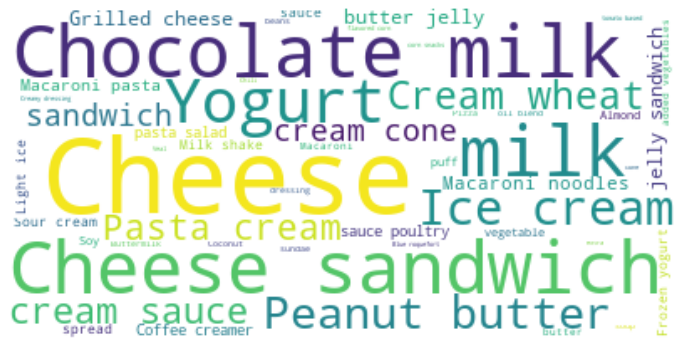

In [ ]:
cloud=WordCloud(background_color='white').generate(st)
plt.figure(figsize=(12,8))
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Word Cloud for Food Products in Cereal and Breakfast Products and their occurences

In [ ]:
st=''
for i in cereal_breakfast_df['Category']:
  st=st+' '+i

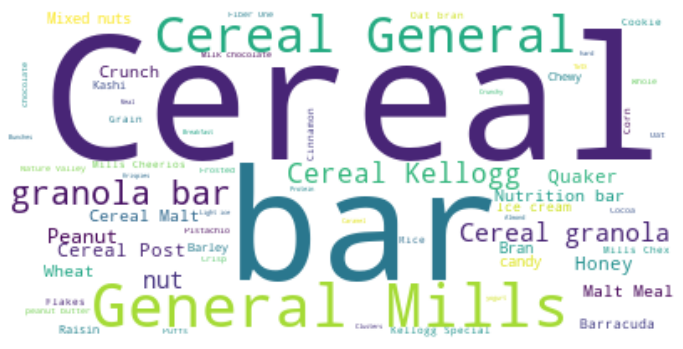

In [ ]:
cloud=WordCloud(background_color='white').generate(st)
plt.figure(figsize=(12,8))
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Plot-2
## Analysing the Calcium and Magnesium Levels in different types of foods

**Milk** is one of the best and most widely available sources of **calcium** available. 
Next comes Magnesium in milk products

So, we want to look at the % of Magnesium and Calcium in different foods 

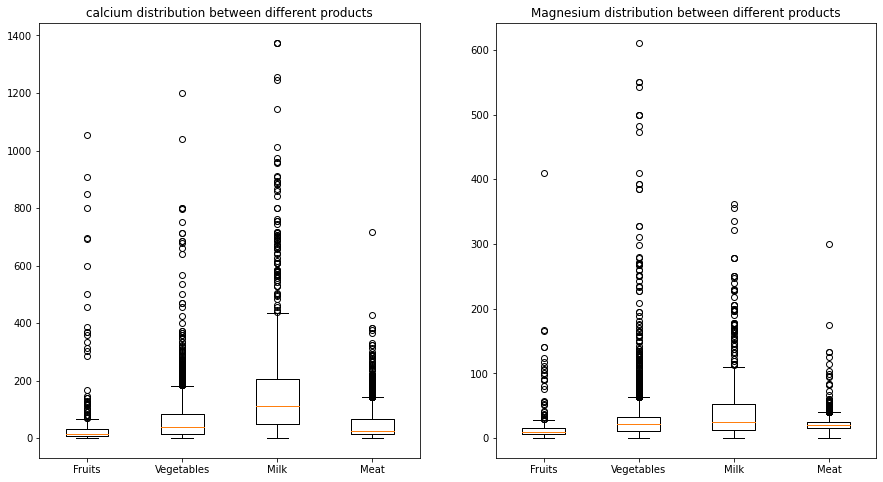

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,8))
ax1.boxplot([fruits_df['Data.Major Minerals.Calcium'],vegetables_salads_df['Data.Major Minerals.Calcium'],milk_products_df['Data.Major Minerals.Calcium'],meat_df['Data.Major Minerals.Calcium']])
ax1.set_title("calcium distribution between different products")
ax1.set_xticklabels(['Fruits','Vegetables','Milk','Meat'])
ax2.boxplot([fruits_df['Data.Major Minerals.Magnesium'],vegetables_salads_df['Data.Major Minerals.Magnesium'],milk_products_df['Data.Major Minerals.Magnesium'],meat_df['Data.Major Minerals.Magnesium']])
ax2.set_xticklabels(['Fruits','Vegetables','Milk','Meat'])
ax2.set_title("Magnesium distribution between different products")
plt.show()

In [ ]:
print("Calcium across different products")
print("Average Calcium across fruits foods: ",fruits_df['Data.Major Minerals.Calcium'].mean())
print("Average Calcium across vegetables foods: ",vegetables_salads_df['Data.Major Minerals.Calcium'].mean())
print("Average Calcium across milk foods: ",milk_products_df['Data.Major Minerals.Calcium'].mean())
print("Average Calcium across meat foods: ",meat_df['Data.Major Minerals.Calcium'].mean())

print("-----------------------------------------------------------------------------------------------------------------------------------")
print("Magnesium across different products")
print("Average Magnesium across fruits foods: ",fruits_df['Data.Major Minerals.Magnesium'].mean())
print("Average Magnesium across vegetables foods: ",vegetables_salads_df['Data.Major Minerals.Magnesium'].mean())
print("Average Magnesium across milk foods: ",milk_products_df['Data.Major Minerals.Magnesium'].mean())
print("Average Magnesium across meat foods: ",meat_df['Data.Major Minerals.Magnesium'].mean())


Calcium across different products
Average Calcium across fruits foods:  46.15485564304462
Average Calcium across vegetables foods:  62.22444183313748
Average Calcium across milk foods:  186.65853658536585
Average Calcium across meat foods:  52.18576860401956
-----------------------------------------------------------------------------------------------------------------------------------
Magnesium across different products
Average Magnesium across fruits foods:  16.543307086614174
Average Magnesium across vegetables foods:  28.67714453584019
Average Magnesium across milk foods:  44.360433604336045
Average Magnesium across meat foods:  21.492123845736014


### Analysis:

1. As it can be clearly seen from the distributions of the different food products that the Calcium and Magnesium contents are high in Milk products.

2. Especially calcium which is extremely high in milk products.
3. Both the minerals are low in meat products.


### Business Recommendation

1. A person who are low on Calcium and Magnesium contents can directly put milk products in their diet menu by taking into account they are not high having cholesterol
2. Core Milk products from the analysis shows that they have high cholesterol content

3. So, we can analyse more on which type of Milk products contain high cholesterol by taking into account Calcium and Magnesium?


### Analyzing the Calcium and Magnesium distribution across Milk products only

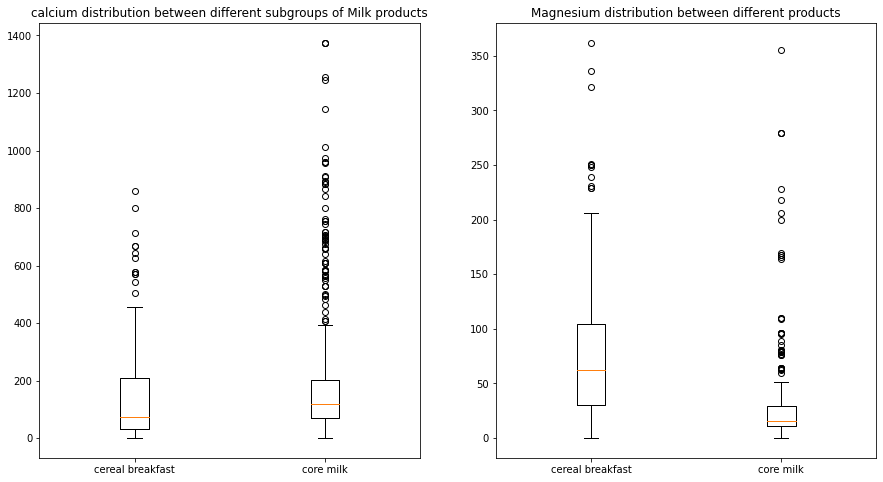

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,8))
ax1.boxplot([cereal_breakfast_df['Data.Major Minerals.Calcium'],core_milk_products_df['Data.Major Minerals.Calcium']])
ax1.set_title("calcium distribution between different subgroups of Milk products")
ax1.set_xticklabels(['cereal breakfast','core milk'])
ax2.boxplot([cereal_breakfast_df['Data.Major Minerals.Magnesium'],core_milk_products_df['Data.Major Minerals.Magnesium']])
ax2.set_xticklabels(['cereal breakfast','core milk'])
ax2.set_title("Magnesium distribution between different products")
plt.show()

In [ ]:
print("Calcium across different products")
print("Average Calcium across cereal and breakfast foods: ",cereal_breakfast_df['Data.Major Minerals.Calcium'].mean())
print("Average Calcium across core milk foods: ",core_milk_products_df['Data.Major Minerals.Calcium'].mean())


print("-----------------------------------------------------------------------------------------------------------------------------------")
print("Magnesium across different products")
print("Average Magnesium across cereal and breakfast foods: ",cereal_breakfast_df['Data.Major Minerals.Magnesium'].mean())
print("Average Magnesium across core milk products: ",core_milk_products_df['Data.Major Minerals.Magnesium'].mean())

Calcium across different products
Average Calcium across cereal and breakfast foods:  148.78151260504202
Average Calcium across core milk foods:  204.688
-----------------------------------------------------------------------------------------------------------------------------------
Magnesium across different products
Average Magnesium across cereal and breakfast foods:  80.5126050420168
Average Magnesium across core milk products:  27.152


### Analysis:

1. As it is clearly evident from the distribution that  high calcium is contained in milk products as all the milk products contain around 65% of calcium that is proven with the help of the graph

2. There is a high magnesium levels in the cereal and breakfast related products which is almost 2.5 times greater than milk products.

### Business Recommendation

1. Even though Core Milk Products have high calcium than cereal and breakfast foods, I recommend there is not much difference in their calcium levels, Cereal and Breakfast bars are good for maintaining good calcium levels as these foods have low saturated fat and low cholesterol which is not the case with core milk products.

2. He/she can concetrate more on eating breakfast related bars, nutrition bars, cereal and all other related products if they are low on Magnesium.
These products are high on magnesium. And they can concentrate only on breakfast bars and cereal without touching the core milk products.


# Plot-3

### Comparing the Protein and Cholesterol within different food categories

1. Get the foods with high cholesterol in meat products.
check their protein content in them.

2. compare them with a scatterplot.

3. Only the foods with high cholesterol check their protein levels.

4. There are some blogs which wrote as meat should be eaten even if they have high cholesterol because they have a high protein content.

5. we also need to check the protein content of the high cholesterol meat with the protein content of vegetables and salads and with milk products.

6. Also if possible, check all the foods where there are foods with high cholesterol, check their protein content.

7. if any other foods other than meat where even though the foods have high cholesterol if the foods have high protein, then it is better to ignore meat products completely as the total average cholesterol is higher for meat products than any other products.


#### Labelling the individual dataframe

1. Label each and every individual dataframe and then combine them,
2. So that the main dataframe contains a column that contains four categories in it namely fruits, vegetables, milk and meat products. It becomes each for us to look for insights based on the their respective category

In [ ]:
fruits_df['Data.Label']='Fruits'
vegetables_salads_df['Data.Label']='Vegetables and salads'
milk_products_df['Data.Label']='Milk'
meat_df['Data.Label']='Meat'

In [ ]:
main_df=pd.concat([fruits_df,vegetables_salads_df,milk_products_df,meat_df],axis=0)

You can look at their correlation between Protein and Cholesterol across different food groups

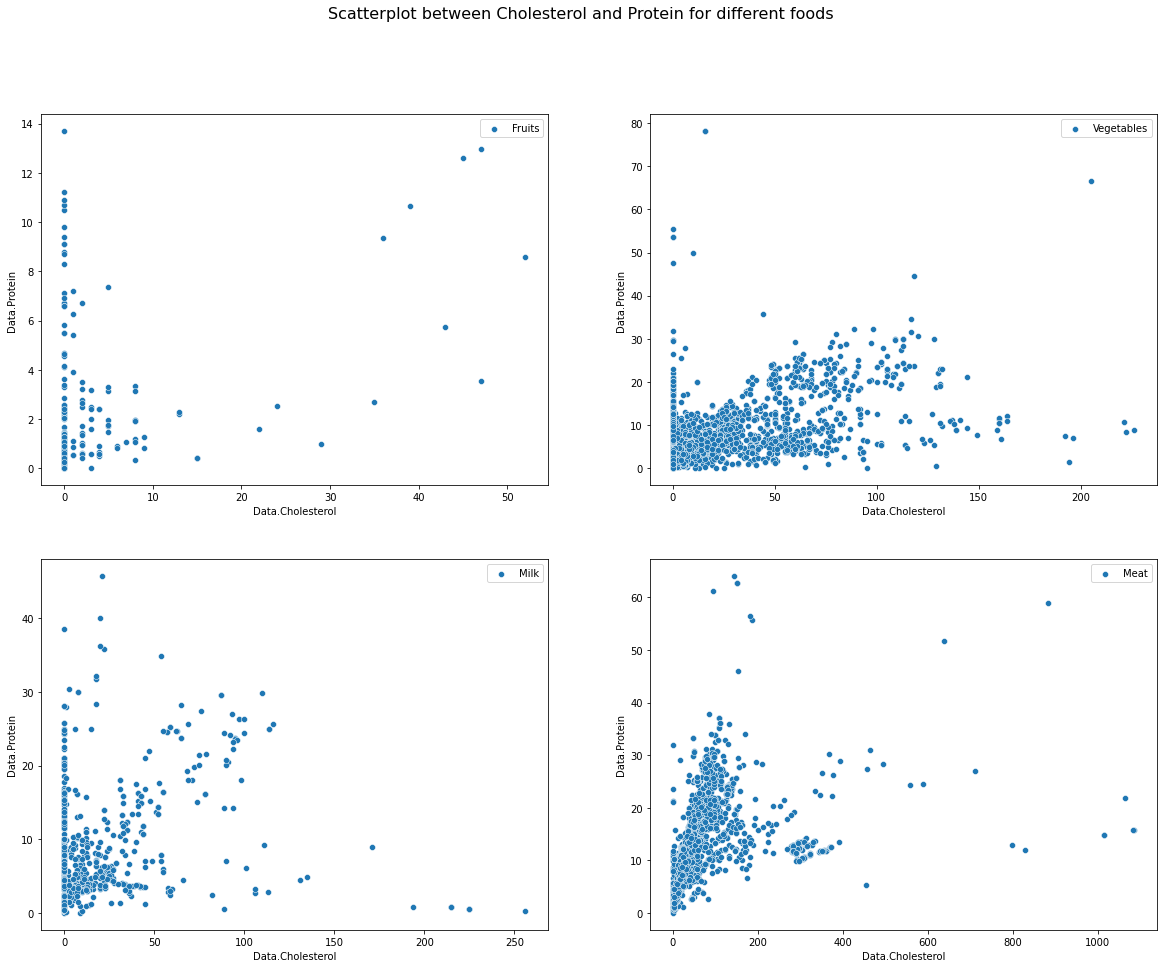

In [ ]:
fig,ax=plt.subplots(2,2,figsize=(20,15))
sns.scatterplot(data=fruits_df,x='Data.Cholesterol',y='Data.Protein',ax=ax[0,0],label='Fruits')
sns.scatterplot(data=vegetables_salads_df,x='Data.Cholesterol',y='Data.Protein',ax=ax[0,1],label='Vegetables')
sns.scatterplot(data=milk_products_df,x='Data.Cholesterol',y='Data.Protein',ax=ax[1,0],label='Milk')
sns.scatterplot(data=meat_df,x='Data.Cholesterol',y='Data.Protein',ax=ax[1,1],label='Meat')
plt.legend()
fig.suptitle("Scatterplot between Cholesterol and Protein for different foods",fontsize=16)
plt.show()

In [ ]:
print("Fruits: ",fruits_df['Data.Cholesterol'].corr(fruits_df['Data.Protein']))
print("Vegetables: ",vegetables_salads_df['Data.Cholesterol'].corr(vegetables_salads_df['Data.Protein']))
print("Core Milk: ",core_milk_products_df['Data.Cholesterol'].corr(core_milk_products_df['Data.Protein']))
print("Cereal: ",cereal_breakfast_df['Data.Cholesterol'].corr(cereal_breakfast_df['Data.Protein']))
print("Milk: ",milk_products_df['Data.Cholesterol'].corr(milk_products_df['Data.Protein']))
print("Meat: ",meat_df['Data.Cholesterol'].corr(meat_df['Data.Protein']))

Fruits:  0.39316168017883624
Vegetables:  0.5549669722884704
Core Milk:  0.2710261376595188
Cereal:  0.2188425314427477
Milk:  0.19654570814147537
Meat:  0.30666757911378834


In [ ]:
main_df.groupby('Data.Label')[['Data.Protein','Data.Cholesterol','Data.Carbohydrate']].mean()

Data.Protein  Data.Cholesterol  Data.Carbohydrate
Data.Label                                                              
Fruits                     1.483097          1.897638          21.115249
Meat                      14.605915         78.323737           9.207865
Milk                       8.714539         19.703252          31.357236
Vegetables and salads      6.117991         16.702703          24.667794

### Analysis
#### Do we need to eat High Cholesterol food for High Protein?
1. As you can see that the Cholesterol is not that highly correlated with Protein for Meat when compared to the Vegetables and Salads.

2. For Vegetables, Even in high cholesterol foods as well, there is high protein

3. So, we can conclude that it is better to **eat high cholesterol foods** in **vegetables and salads** than in **meat** segment because the cholesterol in **vegetables and salads** is **low** compared to **meat**.

4. So even though, if we eat high cholesterol food in meat for high protein, it is not guaranteed that we get high protein from meat all the time.

5. So, We can avoid meat to get rid of cholesterol but to get protein, we can eat lot of vegetables and milk products.

# Tables:

## Table-1

https://renuerx.com/medical-conditions/what-types-of-vitamins-help-lower-cholesterol/


## Analysis of Vitamins for different categories of food

1. Vitamin A - RAE --> High in Liver and fish oil, eggs and milk
2. Retinal (Vitamin A1)
2. Thiamin (Vitamin B1)
3. Riboflavin (Vitamin B2) --> nuts,yeast, pork, seeds
4. Niacin (Vitamin B3)
4. Vitamin B12 --> beef, pork,ham,lamb,poultry, dairy products
5. Vitamin B6 -> tuna, beef,meat products
6. Vitamin C --> Fruits and vegetables
7. Vitamin E -->  Almonds, peanuts, greens
8. Vitamin K --> salads shakes, vegetables



In [ ]:
## select all the vitamin columns
vits_cols=[]
for col in main_df.columns.values:
  if col.startswith("Data.Vitamins"):
    vits_cols.append(col)
vits_cols.append("Data.Retinol")
vits_cols.append("Data.Thiamin")
vits_cols.append("Data.Riboflavin")
vits_cols.append("Data.Niacin")

In [ ]:
## make cholesterol binning
main_df['Data.Cholesterol.bin']=np.where(main_df['Data.Cholesterol']>main_df['Data.Cholesterol'].median(),'High','Low')

In [ ]:
main_df['Data.Cholesterol.bin'].value_counts()

Low     3226
High    3138
Name: Data.Cholesterol.bin, dtype: int64

In [ ]:
main_df.groupby(['Data.Cholesterol.bin','Data.Label'])[vits_cols].mean()

Data.Vitamins.Vitamin A - RAE  \
Data.Cholesterol.bin Data.Label                                             
High                 Fruits                                     74.625000   
                     Meat                                       68.705777   
                     Milk                                      130.822981   
                     Vegetables and salads                      64.013381   
Low                  Fruits                                     92.052055   
                     Meat                                       54.018519   
                     Milk                                      177.036058   
                     Vegetables and salads                      53.182216   

                                            Data.Vitamins.Vitamin B12  \
Data.Cholesterol.bin Data.Label                                         
High                 Fruits                                  0.178125   
                     Meat                                    1.328326   
                     Milk                                    0.608354   
                     Vegetables and salads                   0.978216   
Low                  Fruits                                  0.235890   
                     Meat                                    0.347222   
                     Milk                                    1.471803   
                     Vegetables and salads                   0.112011   

                                            Data.Vitamins.Vitamin B6  \
Data.Cholesterol.bin Data.Label                                        
High                 Fruits                                 0.114500   
                     Meat                                   0.243721   
                     Milk                                   0.098056   
                     Vegetables and salads                  0.161169   
Low                  Fruits                                 0.155926   
                     Meat                                   0.153136   
                     Milk                                   0.639565   
                     Vegetables and salads                  0.126433   

                                            Data.Vitamins.Vitamin C  \
Data.Cholesterol.bin Data.Label                                       
High                 Fruits                               10.131250   
                     Meat                                  2.491959   
                     Milk                                  1.048137   
                     Vegetables and salads                 2.832293   
Low                  Fruits                               21.825205   
                     Meat                                  3.714198   
                     Milk                                  8.323317   
                     Vegetables and salads                 6.740210   

                                            Data.Vitamins.Vitamin E  \
Data.Cholesterol.bin Data.Label                                       
High                 Fruits                                0.430625   
                     Meat                                  0.822525   
                     Milk                                  0.695994   
                     Vegetables and salads                 1.004353   
Low                  Fruits                                0.485836   
                     Meat                                  1.022284   
                     Milk                                  2.427788   
                     Vegetables and salads                 1.196715   

                                            Data.Vitamins.Vitamin K  \
Data.Cholesterol.bin Data.Label                                       
High                 Fruits                                5.112500   
                     Meat                                  8.285944   
                     Milk                                  6.009938   
                     Vegetables and salads  

### **Analysis:**

1. In Both High Cholesterol and Low Cholesterol foods, Vitamin A - RAE is higher for Milk Products. So, It is good to consider low cholesterol foods for Vitamin A - RAE and Fruits have higher content of Vitamin A - RAE 

2. Citrus content (Vitamin C) is higher in fruits which has a high value of 21.8.

3. Vitamin K is higher in vegetables and salads in both higher and lower cholesterol foods. So, it is better to take lower cholesterol foods into consideration

4. Retinol is higher in Milk which is also in low cholesterol food section.


# Table-2

Fiber is a type of carbohydrate that the body can't digest. Though most carbohydrates are broken down into sugar molecules, fiber cannot be broken down into sugar molecules, and instead it passes through the body undigested. Fiber helps regulate the body's use of sugars, helping to keep hunger and blood sugar in check.

In [ ]:
main_df.groupby(['Data.Cholesterol.bin','Data.Label'])['Data.Sugar Total','Data.Fiber'].mean()

Data.Sugar Total  Data.Fiber
Data.Cholesterol.bin Data.Label                                         
High                 Fruits                         9.401250    0.925000
                     Meat                           1.548011    0.693925
                     Milk                           8.986180    0.952795
                     Vegetables and salads          7.920847    1.292417
Low                  Fruits                        13.691863    1.603014
                     Meat                           4.054815    1.776543
                     Milk                          16.711995    3.895433
                     Vegetables and salads          8.581765    2.323697

### Analysis:
1. Milk products in low cholesterol foods have high fiber content because in low cholesterol milk products, nutrition and breakfast and cereal related food which is high in fiber and low in cholesterol
2. Fruits have high sugar content and water content with low cholesterol levels 
3. And, Milk also have high sugar content.So, by concentrating only on low cholesterol foods, you are getting the sugar and the fiber content the body needs.

# Data Splitting


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
main_df.head()

Category  \
6746                        Chicory beverage   
5308                             Apple juice   
5257                            Fruit nectar   
5314                       Apple-prune juice   
4227  Cereal (General Mills Cheerios Fruity)   

                                     Description  Nutrient Data Bank Number  \
6746                            Chicory beverage                   92202010   
5308  Apple juice, with added calcium, baby food                   67202010   
5257                           Fruit nectar, NFS                   64200100   
5314                Apple-prune juice, baby food                   67203700   
4227      Cereal (General Mills Cheerios Fruity)                   57221810   

      Data.Alpha Carotene  Data.Beta Carotene  Data.Beta Cryptoxanthin  \
6746                    0                   0                        0   
5308                    0                   0                        0   
5257                    0                 402                       26   
5314                    1                   8                        2   
4227                   25                  38                        0   

      Data.Carbohydrate  Data.Cholesterol  Data.Choline  Data.Fiber  ...  \
6746               1.42                 0           1.9         0.0  ...   
5308              11.10                 0           1.8         0.4  ...   
5257              13.12                 0           1.5         0.3  ...   
5314              18.10                 0           1.8         0.1  ...   
4227              84.19                 0          17.5         5.9  ...   

      Data.Vitamins.Vitamin B6  Data.Vitamins.Vitamin C  \
6746                     0.000                      0.0   
5308                     0.030                     21.2   
5257                     0.015                     15.2   
5314                     0.035                     67.5   
4227                     1.850                     55.6   

      Data.Vitamins.Vitamin E  Data.Vitamins.Vitamin K  \
6746                     0.00                      0.0   
5308                     0.00                      0.0   
5257                     0.21                      0.8   
5314                     0.05                      1.3   
4227                     0.79                      0.9   

      Data.Cholesterol.Group  NetCarbs  CarbsBin  Data.Fat.Unsaturated Fat  \
6746                     NaN      1.42       Low                     0.002   
5308                     NaN     10.70       Low                     0.037   
5257                     NaN     12.82       Low                     0.033   
5314                     NaN     18.00       Low                     0.037   
4227                     NaN     78.29      High                     3.680   

      Data.Label  Data.Cholesterol.bin  
6746      Fruits                   Low  
5308      Fruits                   Low  
5257      Fruits                   Low  
5314      Fruits                   Low  
4227      Fruits                   Low  

[5 rows x 41 columns]

In [ ]:
main_df.head()

Category  \
6746                        Chicory beverage   
5308                             Apple juice   
5257                            Fruit nectar   
5314                       Apple-prune juice   
4227  Cereal (General Mills Cheerios Fruity)   

                                     Description  Nutrient Data Bank Number  \
6746                            Chicory beverage                   92202010   
5308  Apple juice, with added calcium, baby food                   67202010   
5257                           Fruit nectar, NFS                   64200100   
5314                Apple-prune juice, baby food                   67203700   
4227      Cereal (General Mills Cheerios Fruity)                   57221810   

      Data.Alpha Carotene  Data.Beta Carotene  Data.Beta Cryptoxanthin  \
6746                    0                   0                        0   
5308                    0                   0                        0   
5257                    0                 402                       26   
5314                    1                   8                        2   
4227                   25                  38                        0   

      Data.Carbohydrate  Data.Cholesterol  Data.Choline  Data.Fiber  ...  \
6746               1.42                 0           1.9         0.0  ...   
5308              11.10                 0           1.8         0.4  ...   
5257              13.12                 0           1.5         0.3  ...   
5314              18.10                 0           1.8         0.1  ...   
4227              84.19                 0          17.5         5.9  ...   

      Data.Vitamins.Vitamin B6  Data.Vitamins.Vitamin C  \
6746                     0.000                      0.0   
5308                     0.030                     21.2   
5257                     0.015                     15.2   
5314                     0.035                     67.5   
4227                     1.850                     55.6   

      Data.Vitamins.Vitamin E  Data.Vitamins.Vitamin K  \
6746                     0.00                      0.0   
5308                     0.00                      0.0   
5257                     0.21                      0.8   
5314                     0.05                      1.3   
4227                     0.79                      0.9   

      Data.Cholesterol.Group  NetCarbs  CarbsBin  Data.Fat.Unsaturated Fat  \
6746                     NaN      1.42       Low                     0.002   
5308                     NaN     10.70       Low                     0.037   
5257                     NaN     12.82       Low                     0.033   
5314                     NaN     18.00       Low                     0.037   
4227                     NaN     78.29      High                     3.680   

      Data.Label  Data.Cholesterol.bin  
6746      Fruits                   Low  
5308      Fruits                   Low  
5257      Fruits                   Low  
5314      Fruits                   Low  
4227      Fruits                   Low  

[5 rows x 41 columns]

In [ ]:
main_df.drop(columns=['Data.Cholesterol.Group','CarbsBin','Data.Cholesterol.bin'],inplace=True)

In [ ]:
main_df.head()

Category  \
6746                        Chicory beverage   
5308                             Apple juice   
5257                            Fruit nectar   
5314                       Apple-prune juice   
4227  Cereal (General Mills Cheerios Fruity)   

                                     Description  Nutrient Data Bank Number  \
6746                            Chicory beverage                   92202010   
5308  Apple juice, with added calcium, baby food                   67202010   
5257                           Fruit nectar, NFS                   64200100   
5314                Apple-prune juice, baby food                   67203700   
4227      Cereal (General Mills Cheerios Fruity)                   57221810   

      Data.Alpha Carotene  Data.Beta Carotene  Data.Beta Cryptoxanthin  \
6746                    0                   0                        0   
5308                    0                   0                        0   
5257                    0                 402                       26   
5314                    1                   8                        2   
4227                   25                  38                        0   

      Data.Carbohydrate  Data.Cholesterol  Data.Choline  Data.Fiber  ...  \
6746               1.42                 0           1.9         0.0  ...   
5308              11.10                 0           1.8         0.4  ...   
5257              13.12                 0           1.5         0.3  ...   
5314              18.10                 0           1.8         0.1  ...   
4227              84.19                 0          17.5         5.9  ...   

      Data.Major Minerals.Zinc  Data.Vitamins.Vitamin A - RAE  \
6746                      0.01                              0   
5308                      0.03                              0   
5257                      0.02                             35   
5314                      0.05                              1   
4227                     13.89                            534   

      Data.Vitamins.Vitamin B12  Data.Vitamins.Vitamin B6  \
6746                       0.00                     0.000   
5308                       0.00                     0.030   
5257                       0.00                     0.015   
5314                       0.00                     0.035   
4227                       5.59                     1.850   

      Data.Vitamins.Vitamin C  Data.Vitamins.Vitamin E  \
6746                      0.0                     0.00   
5308                     21.2                     0.00   
5257                     15.2                     0.21   
5314                     67.5                     0.05   
4227                     55.6                     0.79   

      Data.Vitamins.Vitamin K  NetCarbs  Data.Fat.Unsaturated Fat  Data.Label  
6746                      0.0      1.42                     0.002      Fruits  
5308                      0.0     10.70                     0.037      Fruits  
5257                      0.8     12.82                     0.033      Fruits  
5314                      1.3     18.00                     0.037      Fruits  
4227                      0.9     78.29                     3.680      Fruits  

[5 rows x 38 columns]

In [ ]:
## these deep copies of dataframes are for the models
main_df_m2=main_df.copy()
main_df_m3=main_df.copy()
main_df_m4=main_df.copy()
main_df_m5=main_df.copy()
main_df_m6=main_df.copy()
main_df_m7=main_df.copy()

In [ ]:
main_df_m2.shape

(6364, 38)

In [ ]:
y=main_df['Data.Cholesterol']

In [ ]:
X_train_m1,X_val_m1,y_train_m1,y_val_m1=train_test_split(main_df,y,test_size=0.2,random_state=42)
X_val1_m1,X_test_m1,y_val1_m1,y_test_m1=train_test_split(X_val_m1,y_val_m1,test_size=0.5,random_state=42)

In [ ]:
X_train_m1.shape,X_val1_m1.shape,X_test_m1.shape

((5091, 38), (636, 38), (637, 38))

In [ ]:
meta_m1_train=X_train_m1.iloc[:,:3]
meta_m1_train['Data.Cholesterol']=X_train_m1['Data.Cholesterol']
meta_m1_val=X_val1_m1.iloc[:,:3]
meta_m1_val['Data.Cholesterol']=X_val1_m1['Data.Cholesterol']
meta_m1_test=X_test_m1.iloc[:,:3]
meta_m1_test['Data.Cholesterol']=X_test_m1['Data.Cholesterol']
meta_m1_train['Data.Label']=X_train_m1['Data.Label']
meta_m1_val['Data.Label']=X_val1_m1['Data.Label']
meta_m1_test['Data.Label']=X_test_m1['Data.Label']

In [ ]:
meta_m1_train.shape,meta_m1_val.shape,meta_m1_test.shape

((5091, 5), (636, 5), (637, 5))

In [ ]:
X_train_m1.drop(columns=['Category','Description','Nutrient Data Bank Number','Data.Cholesterol','Data.Label'],inplace=True)
X_val1_m1.drop(columns=['Category','Description','Nutrient Data Bank Number','Data.Cholesterol','Data.Label'],inplace=True)
X_test_m1.drop(columns=['Category','Description','Nutrient Data Bank Number','Data.Cholesterol','Data.Label'],inplace=True)

In [ ]:
X_train_m1.shape,X_val1_m1.shape,X_test_m1.shape,y_train_m1.shape,y_val1_m1.shape,y_test_m1.shape

((5091, 33), (636, 33), (637, 33), (5091,), (636,), (637,))

# Modeling (Regression)


# Model-1: 
### Vanilla

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [ ]:
lr=LinearRegression()
lr.fit(X_train_m1,y_train_m1)
x_pred_m1=lr.predict(X_train_m1)
print("Training R2: ",r2_score(x_pred_m1,y_train_m1))
print("Training MAE:      ",mean_absolute_error(x_pred_m1,y_train_m1))
print("Training MSE:             ",mean_squared_error(x_pred_m1,y_train_m1))

y_pred_m1=lr.predict(X_val1_m1)
print("Validation R2: ",r2_score(y_pred_m1,y_val1_m1))
print("Validation MAE:      ",mean_absolute_error(y_pred_m1,y_val1_m1))
print("Validation MSE:            ",mean_squared_error(y_pred_m1,y_val1_m1))
y_predd_m1=lr.predict(X_test_m1)
print("Testing R2: ",r2_score(y_test_m1,y_predd_m1))
print("Testing MAE:         ",mean_absolute_error(y_test_m1,y_predd_m1))
print("Testing MSE:                ",mean_squared_error(y_test_m1,y_predd_m1))

Training R2:  0.7588552580062689
Training MAE:       14.788044441296687
Training MSE:              913.5392334211026
Validation R2:  0.826808335189618
Validation MAE:       13.038117831694128
Validation MSE:             431.4677894405064
Testing R2:  0.8350314177677789
Testing MAE:          14.02863784237662
Testing MSE:                 592.7764059686754


In [ ]:
meta_m1_train['Predicted']=x_pred_m1
meta_m1_val['Predicted']=y_pred_m1
meta_m1_test['Predicted']=y_predd_m1

# K-fold Cross Validation (*Optional*)




The reason we are getting high test accuracy than the train is because the shuffling might not be done in a good way. So, we have tried out stratified K fold sampling technique and tested the accuracies

In [ ]:
dummy=main_df.copy()
dummy.head()
dummy.drop(columns=['Category','Description','Nutrient Data Bank Number','Data.Label'],inplace=True)
y=dummy['Data.Cholesterol']
X=dummy.drop(columns=['Data.Cholesterol'])
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import r2_score
lr=LinearRegression()
kfold=StratifiedKFold(n_splits=10,shuffle=True)
scores_train=[]
scores_test=[]
for train_index,test_index in kfold.split(X,y):
  X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]
  lr.fit(X_train,y_train)
  x_pred=lr.predict(X_train)
  y_pred=lr.predict(X_test)
  r2_train=r2_score(x_pred,y_train)
  r2_test=r2_score(y_pred,y_test)
  scores_train.append(r2_train)
  scores_test.append(r2_test)
print(scores_train)
print(scores_test)
print("Train: ",np.mean(scores_train),np.std(scores_train))
print("Test: ",np.mean(scores_test),np.std(scores_test))

[0.770114751580023, 0.7664332656955163, 0.7759002601650522, 0.7655377159733424, 0.7588735554403206, 0.8037030407915571, 0.7392104047141572, 0.7549967167552664, 0.7667289465862095, 0.7745844849489634]
[0.7198190358983417, 0.8002986557370234, 0.5680452901943853, 0.818223952624003, 0.7951881767878801, 0.24167793593007458, 0.9098742744321341, 0.8578300772708882, 0.7855211156157377, 0.7848662356015079]
Train:  0.767608314265041 0.01573138871661847
Test:  0.7281344750091977 0.1834447227463048


# Model-2

**To Do**
* Wanted to extend the concept of Linear Regression by adding Polynomial Terms

In [ ]:
from sklearn.preprocessing import PolynomialFeatures


1. Considering the columns based on the p value. If the p-value for the column is less than 0.05, then it is statistically significant.
2. We applied Polynomial Regression with degree=2 on top of the columns with p-value< 0.05.

In [ ]:
main_df_m3.head()

Category  \
6746                        Chicory beverage   
5308                             Apple juice   
5257                            Fruit nectar   
5314                       Apple-prune juice   
4227  Cereal (General Mills Cheerios Fruity)   

                                     Description  Nutrient Data Bank Number  \
6746                            Chicory beverage                   92202010   
5308  Apple juice, with added calcium, baby food                   67202010   
5257                           Fruit nectar, NFS                   64200100   
5314                Apple-prune juice, baby food                   67203700   
4227      Cereal (General Mills Cheerios Fruity)                   57221810   

      Data.Alpha Carotene  Data.Beta Carotene  Data.Beta Cryptoxanthin  \
6746                    0                   0                        0   
5308                    0                   0                        0   
5257                    0                 402                       26   
5314                    1                   8                        2   
4227                   25                  38                        0   

      Data.Carbohydrate  Data.Cholesterol  Data.Choline  Data.Fiber  ...  \
6746               1.42                 0           1.9         0.0  ...   
5308              11.10                 0           1.8         0.4  ...   
5257              13.12                 0           1.5         0.3  ...   
5314              18.10                 0           1.8         0.1  ...   
4227              84.19                 0          17.5         5.9  ...   

      Data.Major Minerals.Zinc  Data.Vitamins.Vitamin A - RAE  \
6746                      0.01                              0   
5308                      0.03                              0   
5257                      0.02                             35   
5314                      0.05                              1   
4227                     13.89                            534   

      Data.Vitamins.Vitamin B12  Data.Vitamins.Vitamin B6  \
6746                       0.00                     0.000   
5308                       0.00                     0.030   
5257                       0.00                     0.015   
5314                       0.00                     0.035   
4227                       5.59                     1.850   

      Data.Vitamins.Vitamin C  Data.Vitamins.Vitamin E  \
6746                      0.0                     0.00   
5308                     21.2                     0.00   
5257                     15.2                     0.21   
5314                     67.5                     0.05   
4227                     55.6                     0.79   

      Data.Vitamins.Vitamin K  NetCarbs  Data.Fat.Unsaturated Fat  Data.Label  
6746                      0.0      1.42                     0.002      Fruits  
5308                      0.0     10.70                     0.037      Fruits  
5257                      0.8     12.82                     0.033      Fruits  
5314                      1.3     18.00                     0.037      Fruits  
4227                      0.9     78.29                     3.680      Fruits  

[5 rows x 38 columns]

In [ ]:
y3=main_df_m3['Data.Cholesterol']
X_train_m3,X_val_m3,y_train_m3,y_val_m3=train_test_split(main_df_m3,y3,test_size=0.2,random_state=42)
X_val1_m3,X_test_m3,y_val1_m3,y_test_m3=train_test_split(X_val_m3,y_val_m3,test_size=0.5,random_state=42)
meta_m3_train=X_train_m3.iloc[:,:3]
meta_m3_train['Data.Cholesterol']=X_train_m3['Data.Cholesterol']
meta_m3_val=X_val1_m3.iloc[:,:3]
meta_m3_val['Data.Cholesterol']=X_val1_m3['Data.Cholesterol']
meta_m3_test=X_test_m3.iloc[:,:3]
meta_m3_test['Data.Cholesterol']=X_test_m3['Data.Cholesterol']
meta_m3_train['Data.Label']=X_train_m3['Data.Label']
meta_m3_val['Data.Label']=X_val1_m3['Data.Label']
meta_m3_test['Data.Label']=X_test_m3['Data.Label']
X_train_m3.drop(columns=['Category','Description','Nutrient Data Bank Number','Data.Cholesterol','Data.Label'],inplace=True)
X_val1_m3.drop(columns=['Category','Description','Nutrient Data Bank Number','Data.Cholesterol','Data.Label'],inplace=True)
X_test_m3.drop(columns=['Category','Description','Nutrient Data Bank Number','Data.Cholesterol','Data.Label'],inplace=True)

In [ ]:
X_train_m3.shape,meta_m3_train.shape,X_val1_m3.shape,X_test_m3.shape,meta_m3_val.shape,meta_m3_test.shape

((5091, 33), (5091, 5), (636, 33), (637, 33), (636, 5), (637, 5))

In [ ]:
import statsmodels.api as sm
mod = sm.OLS(y_train_m3,X_train_m3)
fii = mod.fit()
summary=fii.summary()


In [ ]:
results_as_html = summary.tables[1].as_html()
results_df=pd.read_html(results_as_html, header=0, index_col=0)[0]
results_df.shape

(33, 6)

In [ ]:
columns=results_df[results_df['P>|t|']<0.05].index
columns

Index(['Data.Beta Cryptoxanthin', 'Data.Carbohydrate', 'Data.Choline',
       'Data.Fiber', 'Data.Lutein and Zeaxanthin', 'Data.Protein',
       'Data.Riboflavin', 'Data.Selenium', 'Data.Sugar Total', 'Data.Thiamin',
       'Data.Fat.Saturated Fat', 'Data.Major Minerals.Calcium',
       'Data.Major Minerals.Copper', 'Data.Major Minerals.Iron',
       'Data.Major Minerals.Magnesium', 'Data.Major Minerals.Phosphorus',
       'Data.Major Minerals.Potassium', 'Data.Major Minerals.Zinc',
       'Data.Vitamins.Vitamin B12', 'Data.Vitamins.Vitamin B6',
       'Data.Vitamins.Vitamin K', 'NetCarbs', 'Data.Fat.Unsaturated Fat'],
      dtype='object')

In [ ]:
X_train_m3=X_train_m3[columns]
X_val1_m3=X_val1_m3[columns]
X_test_m3=X_test_m3[columns]

X_train_m3.shape,X_val1_m3.shape,X_test_m3.shape,y_train_m3.shape,y_val1_m3.shape,y_test_m3.shape

((5091, 23), (636, 23), (637, 23), (5091,), (636,), (637,))

In [ ]:
X_train_m3.head()

Data.Beta Cryptoxanthin  Data.Carbohydrate  Data.Choline  Data.Fiber  \
5                           0               5.19          17.4         0.0   
1521                        0               0.10          79.5         0.0   
6736                        0              76.00         101.9         0.0   
3983                        4              32.24         108.1         1.2   
1530                        0               0.08          29.3         0.0   

      Data.Lutein and Zeaxanthin  Data.Protein  Data.Riboflavin  \
5                              0          3.38            0.140   
1521                           0         29.83            0.134   
6736                           0         11.60            1.360   
3983                         231         10.42            0.322   
1530                           0         19.00            0.082   

      Data.Selenium  Data.Sugar Total  Data.Thiamin  ...  \
5               2.1              4.96         0.057  ...   
1521          110.7              0.04         0.130  ...   
6736           17.3              0.00         0.000  ...   
3983           24.7             10.14         0.224  ...   
1530           67.8              0.00         0.030  ...   

      Data.Major Minerals.Iron  Data.Major Minerals.Magnesium  \
5                         0.00                             12   
1521                      0.95                             43   
6736                      3.80                            311   
3983                      2.42                             20   
1530                      1.67                             23   

      Data.Major Minerals.Phosphorus  Data.Major Minerals.Potassium  \
5                                103                            159   
1521                             340                            541   
6736                             286                           3501   
3983                             153                            138   
1530                             137                            176   

      Data.Major Minerals.Zinc  Data.Vitamins.Vitamin B12  \
5                         0.43                       0.61   
1521                      0.45                       2.29   
6736                      0.11                       0.00   
3983                      1.04                       0.37   
1530                      0.66                       2.57   

      Data.Vitamins.Vitamin B6  Data.Vitamins.Vitamin K  NetCarbs  \
5                        0.060                      0.1      5.19   
1521                     1.027                      4.6      0.10   
6736                     0.000                      1.9     76.00   
3983                     0.154                      5.0     31.04   
1530                     0.320                      0.2      0.08   

      Data.Fat.Unsaturated Fat  
5                        0.242  
1521                     3.456  
6736                     0.122  
3983                     7.117  
1530                     0.373  

[5 rows x 23 columns]

In [ ]:
pf=PolynomialFeatures(degree=2,interaction_only=True,include_bias=True)

In [ ]:
X_train_m3_t=pf.fit_transform(X_train_m3)
X_val1_m3_t=pf.fit_transform(X_val1_m3)
X_test_m3_t=pf.fit_transform(X_test_m3)
X_train_m3_t.shape,X_val1_m3_t.shape,X_test_m3_t.shape

((5091, 277), (636, 277), (637, 277))

In [ ]:
lr=LinearRegression()
lr.fit(X_train_m3_t,y_train_m3)
y_pred_train_m3=lr.predict(X_train_m3_t)
y_pred_val_m3=lr.predict(X_val1_m3_t)
y_pred_test_m3=lr.predict(X_test_m3_t)
print('R2 Score for Train: ',r2_score(y_train_m3,y_pred_train_m3))
print('va',r2_score(y_val1_m3,y_pred_val_m3))
print('test',r2_score(y_test_m3,y_pred_test_m3))


R2 Score for Train:  0.9022363350111453
va 0.815476930901042
test 0.8360074366662293


In [ ]:
meta_m3_train.shape,len(y_pred_train_m3)

((5091, 5), 5091)

In [ ]:
meta_m3_train['Predictions']=y_pred_train_m3
meta_m3_val['Predictions']=y_pred_val_m3
meta_m3_test['Predictions']=y_pred_test_m3

#### Analysis:
1. After using p-values and polynomial regression, the train and test accuracies came out good.

2. So, we can consider using this model which is far better than the original model with only polynomial regression which went into overfitting with worst test accuracy.

In [ ]:
meta_m3_train.sample(5)

Category  \
7038                   Energy drink   
15                             Milk   
2315  Roast beef submarine sandwich   
3707                       Doughnut   
1143                     Beef liver   

                                            Description  \
7038                 Energy drink, sugar free (Monster)   
15                            Milk, lactose free, whole   
2315  Roast beef submarine sandwich, with cheese, le...   
3707                           Doughnut, custard-filled   
1143                                Beef liver, braised   

      Nutrient Data Bank Number  Data.Cholesterol             Data.Label  \
7038                   95312410                 0  Vegetables and salads   
15                     11114350                12                   Milk   
2315                   27513041                23                   Meat   
3707                   53521210                24  Vegetables and salads   
1143                   25110120               393                   Meat   

      Predictions  
7038   -10.160805  
15      11.330028  
2315    27.985112  
3707    33.556067  
1143   394.926518

In [ ]:
main_df_m3.loc[main_df_m3['Nutrient Data Bank Number']==13220120,'Data.Cholesterol']

474    7
Name: Data.Cholesterol, dtype: int64

# Model-3

In [ ]:
main_df_m4.head()

Category  \
6746                        Chicory beverage   
5308                             Apple juice   
5257                            Fruit nectar   
5314                       Apple-prune juice   
4227  Cereal (General Mills Cheerios Fruity)   

                                     Description  Nutrient Data Bank Number  \
6746                            Chicory beverage                   92202010   
5308  Apple juice, with added calcium, baby food                   67202010   
5257                           Fruit nectar, NFS                   64200100   
5314                Apple-prune juice, baby food                   67203700   
4227      Cereal (General Mills Cheerios Fruity)                   57221810   

      Data.Alpha Carotene  Data.Beta Carotene  Data.Beta Cryptoxanthin  \
6746                    0                   0                        0   
5308                    0                   0                        0   
5257                    0                 402                       26   
5314                    1                   8                        2   
4227                   25                  38                        0   

      Data.Carbohydrate  Data.Cholesterol  Data.Choline  Data.Fiber  ...  \
6746               1.42                 0           1.9         0.0  ...   
5308              11.10                 0           1.8         0.4  ...   
5257              13.12                 0           1.5         0.3  ...   
5314              18.10                 0           1.8         0.1  ...   
4227              84.19                 0          17.5         5.9  ...   

      Data.Major Minerals.Zinc  Data.Vitamins.Vitamin A - RAE  \
6746                      0.01                              0   
5308                      0.03                              0   
5257                      0.02                             35   
5314                      0.05                              1   
4227                     13.89                            534   

      Data.Vitamins.Vitamin B12  Data.Vitamins.Vitamin B6  \
6746                       0.00                     0.000   
5308                       0.00                     0.030   
5257                       0.00                     0.015   
5314                       0.00                     0.035   
4227                       5.59                     1.850   

      Data.Vitamins.Vitamin C  Data.Vitamins.Vitamin E  \
6746                      0.0                     0.00   
5308                     21.2                     0.00   
5257                     15.2                     0.21   
5314                     67.5                     0.05   
4227                     55.6                     0.79   

      Data.Vitamins.Vitamin K  NetCarbs  Data.Fat.Unsaturated Fat  Data.Label  
6746                      0.0      1.42                     0.002      Fruits  
5308                      0.0     10.70                     0.037      Fruits  
5257                      0.8     12.82                     0.033      Fruits  
5314                      1.3     18.00                     0.037      Fruits  
4227                      0.9     78.29                     3.680      Fruits  

[5 rows x 38 columns]

### Remove 0's from Cholesterol column

In [ ]:
inds=main_df_m4.loc[main_df_m4['Data.Cholesterol']==0].index
inds

Int64Index([6746, 5308, 5257, 5314, 4227, 5272, 4332, 5165, 5087, 4327,
            ...
            4546, 2585, 2689, 2978, 2844, 2583, 4248, 2885, 2977, 3772],
           dtype='int64', length=2185)

In [ ]:
main_df_m4.drop(index=inds,inplace=True)

In [ ]:
y4=main_df_m4['Data.Cholesterol']
X_train_m4,X_val_m4,y_train_m4,y_val_m4=train_test_split(main_df_m4,y4,test_size=0.2,random_state=42)
X_val1_m4,X_test_m4,y_val1_m4,y_test_m4=train_test_split(X_val_m4,y_val_m4,test_size=0.5,random_state=42)
meta_m4_train=X_train_m4.iloc[:,:3]
meta_m4_train['Data.Cholesterol']=X_train_m4['Data.Cholesterol']
meta_m4_val=X_val1_m4.iloc[:,:3]
meta_m4_val['Data.Cholesterol']=X_val1_m4['Data.Cholesterol']
meta_m4_test=X_test_m4.iloc[:,:3]
meta_m4_test['Data.Cholesterol']=X_test_m4['Data.Cholesterol']
meta_m4_train['Data.Label']=X_train_m4['Data.Label']
meta_m4_val['Data.Label']=X_val1_m4['Data.Label']
meta_m4_test['Data.Label']=X_test_m4['Data.Label']
meta_m4_train.shape,meta_m4_val.shape,meta_m4_test.shape
X_train_m4.drop(columns=['Category','Description','Nutrient Data Bank Number','Data.Cholesterol','Data.Label'],inplace=True)
X_val1_m4.drop(columns=['Category','Description','Nutrient Data Bank Number','Data.Cholesterol','Data.Label'],inplace=True)
X_test_m4.drop(columns=['Category','Description','Nutrient Data Bank Number','Data.Cholesterol','Data.Label'],inplace=True)

lr=LinearRegression()
lr.fit(X_train_m4,y_train_m4)
x_pred_m4=lr.predict(X_train_m4)
print("Training R2: ",r2_score(x_pred_m4,y_train_m4))
print("Training MAE:      ",mean_absolute_error(x_pred_m4,y_train_m4))
print("Training MSE:             ",mean_squared_error(x_pred_m4,y_train_m4))

y_pred_m4=lr.predict(X_val1_m4)
print("Validation R2: ",r2_score(y_pred_m4,y_val1_m4))
print("Validation MAE:      ",mean_absolute_error(y_pred_m4,y_val1_m4))
print("Validation MSE:            ",mean_squared_error(y_pred_m4,y_val1_m4))
y_predd_m4=lr.predict(X_test_m4)
print("Testing R2: ",r2_score(y_test_m4,y_predd_m4))
print("Testing MAE:         ",mean_absolute_error(y_test_m4,y_predd_m4))
print("Testing MSE:                ",mean_squared_error(y_test_m4,y_predd_m4))

meta_m4_train['Predicted']=x_pred_m4
meta_m4_val['Predicted']=y_pred_m4
meta_m4_test['Predicted']=y_predd_m4

Training R2:  0.793936572629258
Training MAE:       16.06816262216492
Training MSE:              941.5575301171265
Validation R2:  0.7242481972469137
Validation MAE:       17.218292554811974
Validation MSE:             1676.921573309532
Testing R2:  0.8141440858973314
Testing MAE:          16.16963220499374
Testing MSE:                 692.0706857512087


#### Analysis:

1. The accuracy was good but not better than the previous model.
2. When comparing the test set accuracy, they are pretty much same.
3. The model with close to 80% with only 30 features is better than the model with 85% accuracy having 200 features (polynomial terms)

4. Complexity constraint should also be kept in mind when deciding the best model.

# Model-4

In [ ]:
inds=main_df_m5.loc[main_df_m5['Data.Cholesterol']==0].index
inds

Int64Index([6746, 5308, 5257, 5314, 4227, 5272, 4332, 5165, 5087, 4327,
            ...
            4546, 2585, 2689, 2978, 2844, 2583, 4248, 2885, 2977, 3772],
           dtype='int64', length=2185)

In [ ]:
main_df_m5.drop(index=inds,inplace=True)

In [ ]:
main_df_m5.head()

Category  \
5883  Cabbage salad or coleslaw with apples and/or r...   
5700                                            Carrots   
5346                           Blueberry yogurt dessert   
3331                                 Biscuit with fruit   
5213                                        Fruit salad   

                                            Description  \
5883  Cabbage salad or coleslaw with apples and/or r...   
5700                            Carrots, glazed, cooked   
5346      Blueberry yogurt dessert, baby food, strained   
3331                                 Biscuit with fruit   
5213  Fruit salad, excluding citrus fruits, with sal...   

      Nutrient Data Bank Number  Data.Alpha Carotene  Data.Beta Carotene  \
5883                   75141100                  255                 594   
5700                   73102241                 3053                7280   
5346                   67404300                    0                  23   
3331                   52104200                    0                   0   
5213                   63402950                    5                  25   

      Data.Beta Cryptoxanthin  Data.Carbohydrate  Data.Cholesterol  \
5883                        2              13.31                 7   
5700                        0              16.68                 6   
5346                        0              17.05                 4   
3331                        0              46.47                 2   
5213                        3              13.39                 8   

      Data.Choline  Data.Fiber  ...  Data.Major Minerals.Zinc  \
5883           9.8         2.1  ...                      0.16   
5700           8.9         2.6  ...                      0.23   
5346           5.5         0.4  ...                      0.14   
3331           1.8         2.7  ...                      0.49   
5213          14.5         1.9  ...                      0.35   

      Data.Vitamins.Vitamin A - RAE  Data.Vitamins.Vitamin B12  \
5883                             63                       0.02   
5700                            754                       0.00   
5346                              3                       0.43   
3331                             16                       0.00   
5213                              5                       0.02   

      Data.Vitamins.Vitamin B6  Data.Vitamins.Vitamin C  \
5883                     0.091                     20.2   
5700                     0.118                      4.6   
5346                     0.400                     12.4   
3331                     0.070                      0.2   
5213                     0.162                     13.7   

      Data.Vitamins.Vitamin E  Data.Vitamins.Vitamin K  NetCarbs  \
5883                     0.71                     51.8     11.21   
5700                     0.68                     12.4     14.08   
5346                     0.40                     13.3     16.65   
3331                     0.44                      4.4     43.77   
5213                     0.79                     35.0     11.49   

      Data.Fat.Unsaturated Fat  Data.Label  
5883                     4.810      Fruits  
5700                     0.824      Fruits  
5346                     0.211      Fruits  
3331                     4.225      Fruits  
5213                    16.824      Fruits  

[5 rows x 38 columns]

In [ ]:

y5=main_df_m5['Data.Cholesterol']
X_train_m5,X_val_m5,y_train_m5,y_val_m5=train_test_split(main_df_m5,y5,test_size=0.2,random_state=42)
X_val1_m5,X_test_m5,y_val1_m5,y_test_m5=train_test_split(X_val_m5,y_val_m5,test_size=0.5,random_state=42)
meta_m5_train=X_train_m5.iloc[:,:3]
meta_m5_train['Data.Cholesterol']=X_train_m5['Data.Cholesterol']
meta_m5_val=X_val1_m5.iloc[:,:3]
meta_m5_val['Data.Cholesterol']=X_val1_m5['Data.Cholesterol']
meta_m5_test=X_test_m5.iloc[:,:3]
meta_m5_test['Data.Cholesterol']=X_test_m5['Data.Cholesterol']
meta_m5_train['Data.Label']=X_train_m5['Data.Label']
meta_m5_val['Data.Label']=X_val1_m5['Data.Label']
meta_m5_test['Data.Label']=X_test_m5['Data.Label']
X_train_m5.drop(columns=['Category','Description','Nutrient Data Bank Number','Data.Cholesterol','Data.Label'],inplace=True)
X_val1_m5.drop(columns=['Category','Description','Nutrient Data Bank Number','Data.Cholesterol','Data.Label'],inplace=True)
X_test_m5.drop(columns=['Category','Description','Nutrient Data Bank Number','Data.Cholesterol','Data.Label'],inplace=True)

import statsmodels.api as sm
mod = sm.OLS(y_train_m5,X_train_m5)
fii = mod.fit()
summary=fii.summary()

results_as_html5 = summary.tables[1].as_html()
results_df5=pd.read_html(results_as_html5, header=0, index_col=0)[0]
results_df5.shape

columns5=results_df5[results_df5['P>|t|']<0.05].index
columns5

X_train_m5=X_train_m5[columns5]
X_val1_m5=X_val1_m5[columns5]
X_test_m5=X_test_m5[columns5]

print(X_train_m5.shape,X_val1_m5.shape,X_test_m5.shape,y_train_m5.shape,y_val1_m5.shape,y_test_m5.shape)

pf=PolynomialFeatures(degree=2,interaction_only=True,include_bias=True)

X_train_m5_t=pf.fit_transform(X_train_m5)
X_val1_m5_t=pf.fit_transform(X_val1_m5)
X_test_m5_t=pf.fit_transform(X_test_m5)
print(X_train_m5_t.shape,X_val1_m5_t.shape,X_test_m5_t.shape)

lr=LinearRegression()
lr.fit(X_train_m5_t,y_train_m5)
y_pred_train_m5=lr.predict(X_train_m5_t)
y_pred_val_m5=lr.predict(X_val1_m5_t)
y_pred_test_m5=lr.predict(X_test_m5_t)
print('R2 Score for Train: ',r2_score(y_train_m5,y_pred_train_m5))
print('va',r2_score(y_val1_m5,y_pred_val_m5))
print('test',r2_score(y_test_m5,y_pred_test_m5))

meta_m5_train['Predictions']=y_pred_train_m5
meta_m5_val['Predictions']=y_pred_val_m5
meta_m5_test['Predictions']=y_pred_test_m5


(3343, 24) (418, 24) (418, 24) (3343,) (418,) (418,)
(3343, 301) (418, 301) (418, 301)
R2 Score for Train:  0.9235349992335887
va 0.12794404146594418
test 0.8279925802970254


1. A clear case of Overfitting in the validation data.
2. Train and Test accuracies are good

In [ ]:
meta_m5_train.sample(6)

Category  \
5661                                       Broccoli   
1322                                       Flounder   
75                                        Onion dip   
3589                                            Pie   
3592                                            Pie   
1903  Shellfish and noodles with tomato-based sauce   

                                        Description  \
5661              Broccoli, cooked, from restaurant   
1322   Flounder, baked or broiled, made with butter   
75                          Onion dip, yogurt based   
3589                          Pie, apple-sour cream   
3592     Pie, banana cream, individual size or tart   
1903  Shellfish and noodles with tomato-based sauce   

      Nutrient Data Bank Number  Data.Cholesterol             Data.Label  \
5661                   72201190                 3  Vegetables and salads   
1322                   26115121                63  Vegetables and salads   
75                     11440030                14  Vegetables and salads   
3589                   53340000                 7  Vegetables and salads   
3592                   53341070                38  Vegetables and salads   
1903                   27250950                36                   Meat   

      Predictions  
5661   -16.318796  
1322    79.931170  
75      17.230351  
3589    13.588194  
3592    32.663773  
1903    19.060524

In [ ]:
main_df_m5.loc[main_df_m5['Nutrient Data Bank Number']==53205250,'Data.Cholesterol']

3458    17
Name: Data.Cholesterol, dtype: int64

### Analysis:
1. The train and test accuracies worked fine but,the validation accuracy was the worst.
2. So, we are not going ahead with the model. This can also be seen as a case for overfitting.


# Regression Model Results

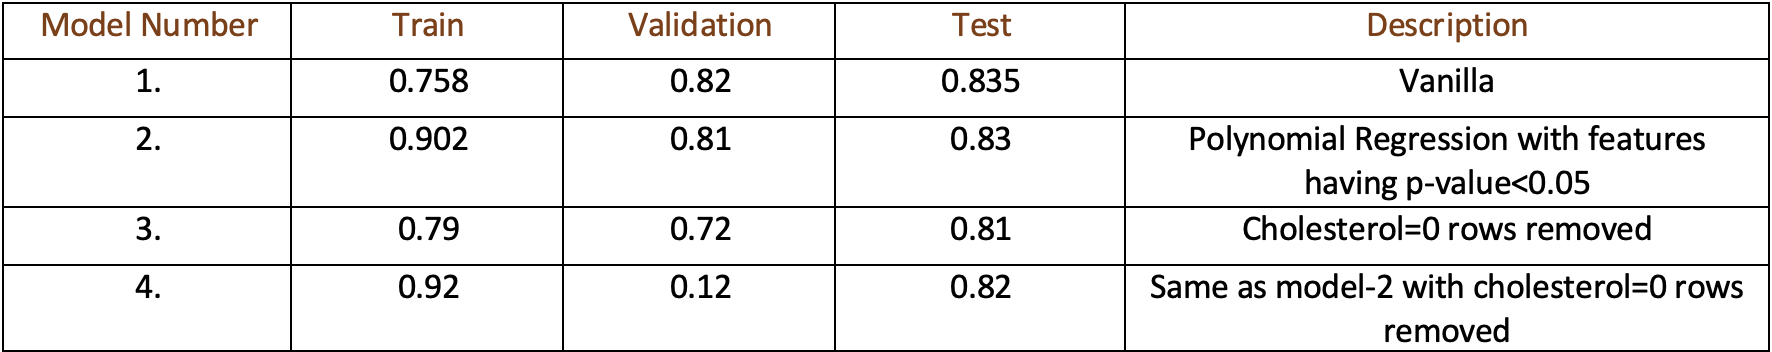


# Analyze and interpret regression errors

## Interpretation for Model-1

### Novice

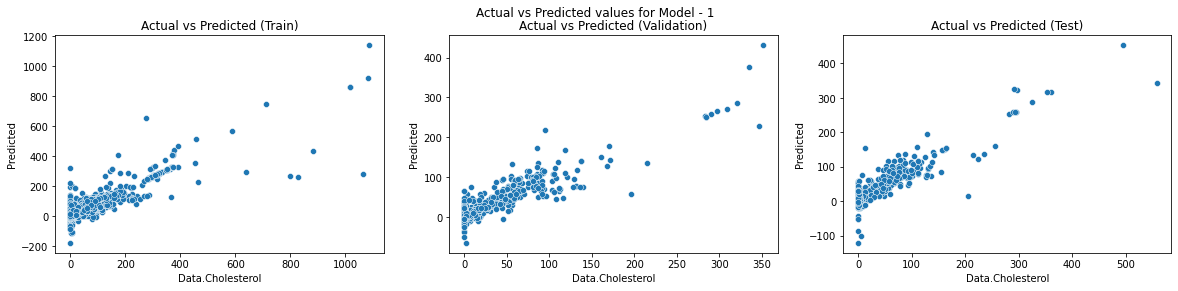

In [ ]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(20,4))
sns.scatterplot(meta_m1_train['Data.Cholesterol'],meta_m1_train['Predicted'],ax=ax1)
sns.scatterplot(meta_m1_val['Data.Cholesterol'],meta_m1_val['Predicted'],ax=ax2)
sns.scatterplot(meta_m1_test['Data.Cholesterol'],meta_m1_test['Predicted'],ax=ax3)
ax1.set_title("Actual vs Predicted (Train)")
ax2.set_title("Actual vs Predicted (Validation)")
ax3.set_title("Actual vs Predicted (Test)")
fig.suptitle("Actual vs Predicted values for Model - 1")
plt.show()

### Advanced

In [ ]:
meta_m1_test['Error']=meta_m1_test['Predicted'] - meta_m1_test['Data.Cholesterol']

### Top 10 Overestimated food products

In [ ]:
overestimated_m1=meta_m1_test.loc[meta_m1_test['Error']>0].sort_values(by='Error',ascending=False)
overestimated_m1.head(10)

Category  \
1374                                      Herring   
3758  Nutrition bar (Zone Perfect Classic Crunch)   
1153                                       Tongue   
1452                                       Salmon   
3013                                      Coconut   
1176                                    Bratwurst   
5954                                 Broccoflower   
6349                               Cottonseed oil   
3097                              Sunflower seeds   
1524                                         Tuna   

                                           Description  \
1374                                  Herring, pickled   
3758       Nutrition bar (Zone Perfect Classic Crunch)   
1153         Tongue, smoked, cured, or pickled, cooked   
1452           Salmon, baked or broiled, made with oil   
3013                                 Coconut, packaged   
1176                                         Bratwurst   
5954                              Broccoflower, cooked   
6349                                    Cottonseed oil   
3097                              Sunflower seeds, NFS   
1524  Tuna, fresh, coated, baked or broiled, fat added   

      Nutrient Data Bank Number  Data.Cholesterol             Data.Label  \
1374                   26119180                13                   Meat   
3758                   53720800                 8                   Milk   
1153                   25160110               129  Vegetables and salads   
1452                   26137120                56                   Meat   
3013                   42106020                 0  Vegetables and salads   
1176                   25220350                74  Vegetables and salads   
5954                   75208720                 2  Vegetables and salads   
6349                   82103000                 0  Vegetables and salads   
3097                   43102400                 0  Vegetables and salads   
1524                   26153130                37                   Meat   

       Predicted       Error  
1374  153.651362  140.651362  
3758   74.865631   66.865631  
1153  194.536305   65.536305  
1452  117.951695   61.951695  
3013   59.702915   59.702915  
1176  132.996158   58.996158  
5954   59.308572   57.308572  
6349   56.455707   56.455707  
3097   56.117008   56.117008  
1524   92.992075   55.992075

Boxplot for overestimated foods

Text(0, 0.5, 'Count of Overestimated foods')

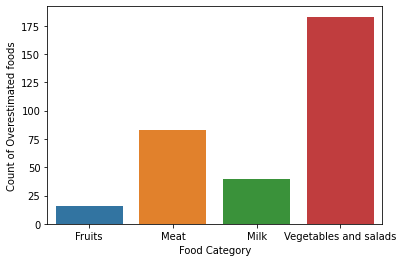

In [ ]:
dumms_m1=overestimated_m1.groupby('Data.Label')['Category'].count().reset_index()
sns.barplot(data=dumms_m1,x='Data.Label',y='Category')
plt.xlabel('Food Category')
plt.ylabel('Count of Overestimated foods')

### Top 10 underestimated foods

In [ ]:
underestimated_m1=meta_m1_test.loc[meta_m1_test['Error']<0].sort_values(by='Error',ascending=True)
underestimated_m1.head(10)

Category  \
1145                                     Chicken liver   
7010  Nutritional powder mix (EAS Whey Protein Powder)   
368                                       Cocoa powder   
7017                Nutritional powder mix (Slim Fast)   
6314                                            Butter   
2819                          Egg and bacon on biscuit   
6334                                              Ghee   
3091                                     Pumpkin seeds   
6312                                            Butter   
984                                  Chicken drumstick   

                                            Description  \
1145                             Chicken liver, braised   
7010   Nutritional powder mix (EAS Whey Protein Powder)   
368                     Cocoa powder, not reconstituted   
7017                 Nutritional powder mix (Slim Fast)   
6314                                        Butter, tub   
2819                           Egg and bacon on biscuit   
6334                             Ghee, clarified butter   
3091                                 Pumpkin seeds, NFS   
6312                                        Butter, NFS   
984   Chicken drumstick, baked or broiled, skin not ...   

      Nutrient Data Bank Number  Data.Cholesterol             Data.Label  \
1145                   25110420               558                   Meat   
7010                   95201200               205  Vegetables and salads   
368                    11830150                 0  Vegetables and salads   
7017                   95210000                 5  Vegetables and salads   
6314                   81101010               225                   Milk   
2819                   32202090               235                   Meat   
6334                   81204000               256                   Milk   
3091                   43101050                 0  Vegetables and salads   
6312                   81100500               215                   Milk   
984                    24142311               155                   Meat   

       Predicted       Error  
1145  343.111073 -214.888927  
7010   15.370744 -189.629256  
368  -121.220517 -121.220517  
7017 -102.147602 -107.147602  
6314  121.064852 -103.935148  
2819  135.867817  -99.132183  
6334  161.384109  -94.615891  
3091  -87.117289  -87.117289  
6312  134.963130  -80.036870  
984    84.989108  -70.010892

Boxplot for underestimated foods

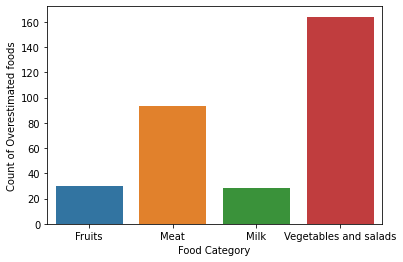

In [ ]:
dumms_m1=underestimated_m1.groupby('Data.Label')['Category'].count().reset_index()
sns.barplot(data=dumms_m1,x='Data.Label',y='Category')
plt.xlabel('Food Category')
plt.ylabel('Count of Overestimated foods')
plt.show()

### Analysis:

1. In both the underestimated and overestimated foods, Vegetables and salads group has the highest count.
2. Then, comes the meat in both the sections.
3. As the residuals values are close to 0, which indicates the predictions are accurate

## Interpretation for Model-*2*

### Novice

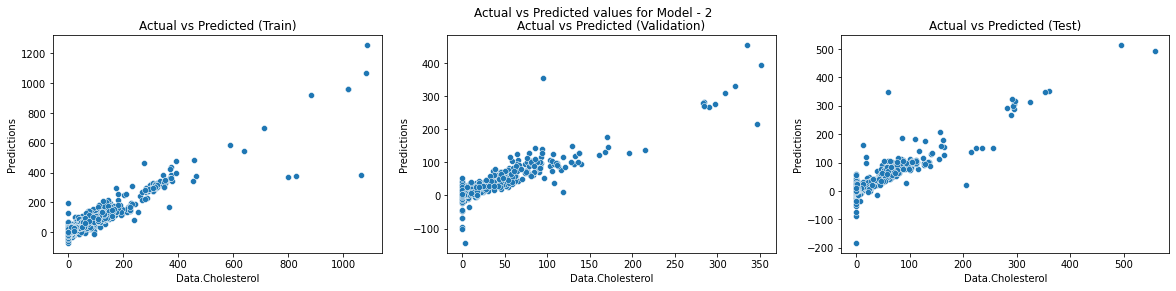

In [ ]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(20,4))
sns.scatterplot(meta_m3_train['Data.Cholesterol'],meta_m3_train['Predictions'],ax=ax1)
sns.scatterplot(meta_m3_val['Data.Cholesterol'],meta_m3_val['Predictions'],ax=ax2)
sns.scatterplot(meta_m3_test['Data.Cholesterol'],meta_m3_test['Predictions'],ax=ax3)
ax1.set_title("Actual vs Predicted (Train)")
ax2.set_title("Actual vs Predicted (Validation)")
ax3.set_title("Actual vs Predicted (Test)")
fig.suptitle("Actual vs Predicted values for Model - 2")
plt.show()

### Advanced

In [ ]:
meta_m3_test['Error']=meta_m3_test['Predictions']-meta_m3_test['Data.Cholesterol']

### Top 10 Overestimated foods

In [ ]:
overestimated_m3=meta_m3_test.loc[meta_m3_test['Error']>0].sort_values(by='Error',ascending=False)
overestimated_m3.head(10)

Category  \
1630                              Oysters   
1374                              Herring   
1531                                 Tuna   
5898                        Spinach salad   
5642         Spinach and cheese casserole   
808                            Pork bacon   
4251             Cereal (Kellogg's Krave)   
4261  Cereal (Malt-O-Meal Frosted Flakes)   
1203                             Scrapple   
1613                              Lobster   

                                            Description  \
1630                                    Oysters, canned   
1374                                   Herring, pickled   
1531                             Tuna, canned, oil pack   
5898                         Spinach salad, no dressing   
5642                       Spinach and cheese casserole   
808   Pork bacon, NS as to fresh, smoked or cured, r...   
4251                           Cereal (Kellogg's Krave)   
4261                Cereal (Malt-O-Meal Frosted Flakes)   
1203                                   Scrapple, cooked   
1613            Lobster, baked or broiled, no added fat   

      Nutrient Data Bank Number  Data.Cholesterol             Data.Label  \
1630                   26315180                60  Vegetables and salads   
1374                   26119180                13                   Meat   
1531                   26155180                18                   Meat   
5898                   75147000                86  Vegetables and salads   
5642                   72125260                18                   Milk   
808                    22600210               110                   Meat   
4251                   57303200                 0                   Milk   
4261                   57305210                 0                   Milk   
1203                   25221610                52                 Fruits   
1613                   26311121               156                   Meat   

      Predictions       Error  
1630   349.087316  289.087316  
1374   160.070257  147.070257  
1531   118.658776  100.658776  
5898   185.110140   99.110140  
5642    98.183874   80.183874  
808    182.136703   72.136703  
4251    60.095385   60.095385  
4261    56.218326   56.218326  
1203   104.247480   52.247480  
1613   208.088245   52.088245

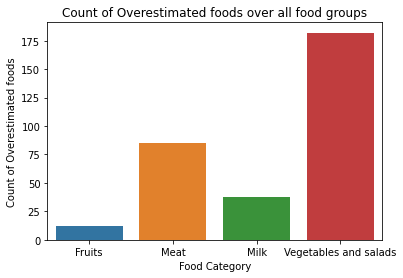

In [ ]:
dumms_m3=overestimated_m3.groupby('Data.Label')['Category'].count().reset_index()
sns.barplot(data=dumms_m3,x='Data.Label',y='Category')
plt.xlabel('Food Category')
plt.ylabel('Count of Overestimated foods')
plt.title("Count of Overestimated foods over all food groups")
plt.show()

### Top 10 Underestimated foods

In [ ]:
underestimated_m3=meta_m3_test.loc[meta_m3_test['Error']<0].sort_values(by='Error',ascending=True)
underestimated_m3.head(10)

Category  \
368                                        Cocoa powder   
7010   Nutritional powder mix (EAS Whey Protein Powder)   
6334                                               Ghee   
4191  Cereal (Quaker Cap'n Crunch's Peanut Butter Cr...   
2819                           Egg and bacon on biscuit   
6312                                             Butter   
6314                                             Butter   
4236  Cereal (Post Honey Bunches of Oats with Vanill...   
1145                                      Chicken liver   
4855                                    Rice with squid   

                                            Description  \
368                     Cocoa powder, not reconstituted   
7010   Nutritional powder mix (EAS Whey Protein Powder)   
6334                             Ghee, clarified butter   
4191  Cereal (Quaker Cap'n Crunch's Peanut Butter Cr...   
2819                           Egg and bacon on biscuit   
6312                                        Butter, NFS   
6314                                        Butter, tub   
4236  Cereal (Post Honey Bunches of Oats with Vanill...   
1145                             Chicken liver, braised   
4855                Rice with squid, Puerto Rican style   

      Nutrient Data Bank Number  Data.Cholesterol             Data.Label  \
368                    11830150                 0  Vegetables and salads   
7010                   95201200               205  Vegetables and salads   
6334                   81204000               256                   Milk   
4191                   57120000                 0                   Milk   
2819                   32202090               235                   Meat   
6312                   81100500               215                   Milk   
6314                   81101010               225                   Milk   
4236                   57237200                 0                   Milk   
1145                   25110420               558                   Meat   
4855                   58155910                93                   Meat   

      Predictions       Error  
368   -183.148938 -183.148938  
7010    22.459303 -182.540697  
6334   151.045249 -104.954751  
4191   -86.868803  -86.868803  
2819   150.186109  -84.813891  
6312   136.004615  -78.995385  
6314   149.915070  -75.084930  
4236   -72.629533  -72.629533  
1145   491.225264  -66.774736  
4855    28.961110  -64.038890

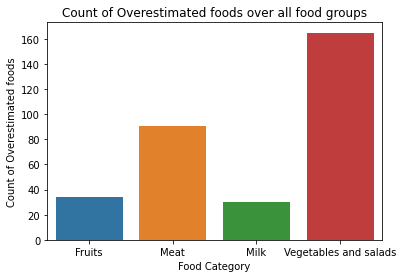

In [ ]:
dumms_m3=underestimated_m3.groupby('Data.Label')['Category'].count().reset_index()
sns.barplot(data=dumms_m3,x='Data.Label',y='Category')
plt.xlabel('Food Category')
plt.ylabel('Count of Overestimated foods')
plt.title("Count of Overestimated foods over all food groups")
plt.show()

### Analysis:

1. Both the Overestimated foods and Underestimated contains Vegetables and salads as the food groups with high count

2. Then, comes the meat products

## Interpretation for Model-3

### Novice

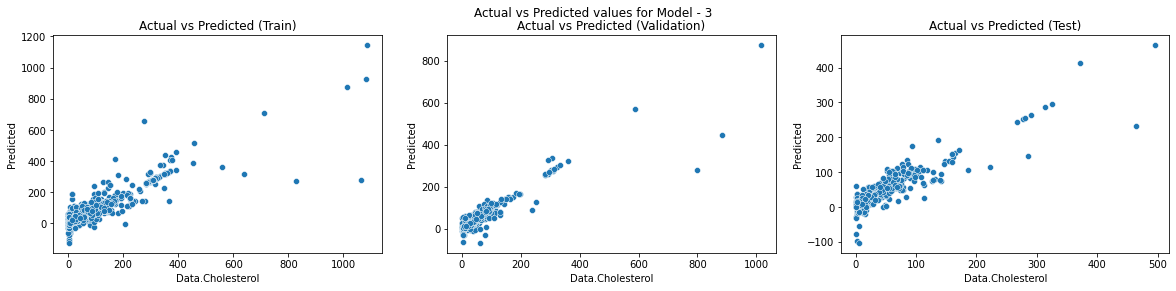

In [ ]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(20,4))
sns.scatterplot(meta_m4_train['Data.Cholesterol'],meta_m4_train['Predicted'],ax=ax1)
sns.scatterplot(meta_m4_val['Data.Cholesterol'],meta_m4_val['Predicted'],ax=ax2)
sns.scatterplot(meta_m4_test['Data.Cholesterol'],meta_m4_test['Predicted'],ax=ax3)
ax1.set_title("Actual vs Predicted (Train)")
ax2.set_title("Actual vs Predicted (Validation)")
ax3.set_title("Actual vs Predicted (Test)")
fig.suptitle("Actual vs Predicted values for Model - 3")
plt.show()

### Advanced

In [ ]:
meta_m4_test['Error']=meta_m4_test['Predicted']-meta_m4_test['Data.Cholesterol']

### Top 10 Overestimated Foods

In [ ]:
overestimated_m4=meta_m4_test.loc[meta_m4_test['Error']>0].sort_values(by='Error',ascending=False)
overestimated_m4.head(10)

Category  \
6331  Animal fat or drippings   
6318                Margarine   
1203                 Scrapple   
4340                  Burrito   
3851                  Popcorn   
696               Corned beef   
1336                 Flounder   
1177                Bratwurst   
1323                 Flounder   
822                      Pork   

                                            Description  \
6331                            Animal fat or drippings   
6318                                     Margarine, tub   
1203                                   Scrapple, cooked   
4340  Burrito, taco, or quesadilla with egg and brea...   
3851          Popcorn, movie theater, with added butter   
696                Corned beef, cooked, lean only eaten   
1336                       Flounder, steamed or poached   
1177                             Bratwurst, with cheese   
1323    Flounder, baked or broiled, made with margarine   
822                            Pork, neck bones, cooked   

      Nutrient Data Bank Number  Data.Cholesterol             Data.Label  \
6331                   81201000                93  Vegetables and salads   
6318                   81102020                 1  Vegetables and salads   
1203                   25221610                52                 Fruits   
4340                   58100013               137  Vegetables and salads   
3851                   54403005                52  Vegetables and salads   
696                    21416120                86                   Meat   
1336                   26115160                57  Vegetables and salads   
1177                   25220360                77  Vegetables and salads   
1323                   26115122                55  Vegetables and salads   
822                    22706010                68                   Meat   

       Predicted      Error  
6331  176.096905  83.096905  
6318   61.048280  60.048280  
1203  108.718048  56.718048  
4340  192.612743  55.612743  
3851  104.145492  52.145492  
696   134.908209  48.908209  
1336  104.297235  47.297235  
1177  122.648321  45.648321  
1323   99.861381  44.861381  
822   110.597497  42.597497

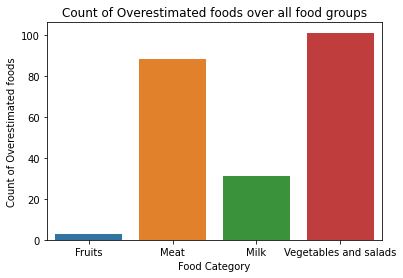

In [ ]:
dumms_m4=overestimated_m4.groupby('Data.Label')['Category'].count().reset_index()
sns.barplot(data=dumms_m4,x='Data.Label',y='Category')
plt.xlabel('Food Category')
plt.ylabel('Count of Overestimated foods')
plt.title("Count of Overestimated foods over all food groups")
plt.show()

### Top 10 Underestimated Foods

In [ ]:
underestimated_m4=meta_m4_test.loc[meta_m4_test['Error']<0].sort_values(by='Error',ascending=True)
underestimated_m4.head(10)

Category  \
1583                                   Squid   
1579                                   Squid   
7017      Nutritional powder mix (Slim Fast)   
1581                                   Squid   
5573                             Beet greens   
3690                        Breakfast pastry   
4262  Cereal (Malt-O-Meal Fruity Dyno-Bites)   
1373                                 Herring   
1471                                Sardines   
1017                           Chicken thigh   

                                        Description  \
1583                       Squid, steamed or boiled   
1579          Squid, baked or broiled, no added fat   
7017             Nutritional powder mix (Slim Fast)   
1581  Squid, coated, baked or broiled, no added fat   
5573                            Beet greens, cooked   
3690                          Breakfast pastry, NFS   
4262         Cereal (Malt-O-Meal Fruity Dyno-Bites)   
1373                         Herring, dried, salted   
1471                               Sardines, cooked   
1017          Chicken thigh, stewed, skin not eaten   

      Nutrient Data Bank Number  Data.Cholesterol             Data.Label  \
1583                   26213160               464                   Meat   
1579                   26213121               286                   Meat   
7017                   95210000                 5  Vegetables and salads   
1581                   26213131               223                   Meat   
5573                   72101220                 2  Vegetables and salads   
3690                   53500100               114  Vegetables and salads   
4262                   57305300                 1                 Fruits   
1373                   26119170               186                   Meat   
1471                   26139110               142                   Meat   
1017                   24153220               140                   Meat   

       Predicted       Error  
1583  232.161895 -231.838105  
1579  146.782205 -139.217795  
7017 -103.218107 -108.218107  
1581  115.348427 -107.651573  
5573  -96.992090  -98.992090  
3690   26.486701  -87.513299  
4262  -77.441410  -78.441410  
1373  107.581802  -78.418198  
1471   75.484089  -66.515911  
1017   78.158478  -61.841522

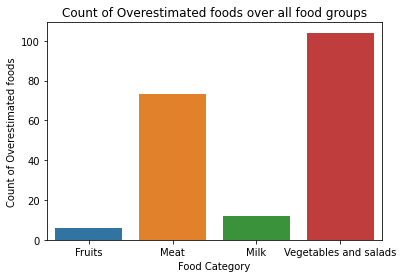

In [ ]:
dumms_m4=underestimated_m4.groupby('Data.Label')['Category'].count().reset_index()
sns.barplot(data=dumms_m4,x='Data.Label',y='Category')
plt.xlabel('Food Category')
plt.ylabel('Count of Overestimated foods')
plt.title("Count of Overestimated foods over all food groups")
plt.show()

### Analysis
1. Model-3 didn't perform well as it didn't predict well for Meat and Vegetables and salads

2. We need to concentrate more on Vegetables and salads and Meat products such that the Overestimation and Underestimation reduces.

## Interpretation for Model-4



### Novice

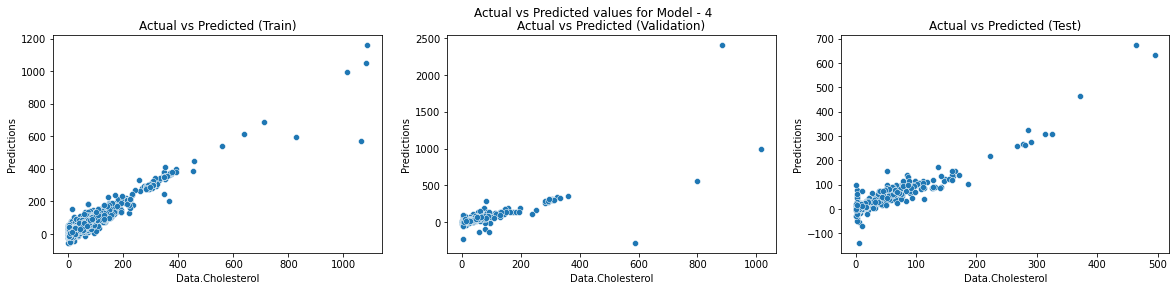

In [ ]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(20,4))
sns.scatterplot(meta_m5_train['Data.Cholesterol'],meta_m5_train['Predictions'],ax=ax1)
sns.scatterplot(meta_m5_val['Data.Cholesterol'],meta_m5_val['Predictions'],ax=ax2)
sns.scatterplot(meta_m5_test['Data.Cholesterol'],meta_m5_test['Predictions'],ax=ax3)
ax1.set_title("Actual vs Predicted (Train)")
ax2.set_title("Actual vs Predicted (Validation)")
ax3.set_title("Actual vs Predicted (Test)")
fig.suptitle("Actual vs Predicted values for Model - 4")
plt.show()

### Advanced

In [ ]:
meta_m5_test.head()
meta_m5_test['Error']=meta_m5_test['Predictions']-meta_m5_test['Data.Cholesterol']

### Top 10 Overestimated Foods

In [ ]:
overestimated_m5=meta_m5_test.loc[meta_m5_test['Error']>0].sort_values(by='Error',ascending=False)
overestimated_m5.head(10)

Category  \
1583                                   Squid   
2722                        Shrimp-egg patty   
3851                                 Popcorn   
4262  Cereal (Malt-O-Meal Fruity Dyno-Bites)   
2673                                     Egg   
6066                                 Seaweed   
3875                                 Popcorn   
6053                             Hot peppers   
696                              Corned beef   
5655                           Turnip greens   

                                            Description  \
1583                           Squid, steamed or boiled   
2722                                   Shrimp-egg patty   
3851          Popcorn, movie theater, with added butter   
4262             Cereal (Malt-O-Meal Fruity Dyno-Bites)   
2673                                    Egg, whole, raw   
6066                         Seaweed, cooked, fat added   
3875    Popcorn, ready-to-eat packaged, cheese flavored   
6053                                Hot peppers, cooked   
696                Corned beef, cooked, lean only eaten   
5655  Turnip greens, canned, reduced sodium, cooked,...   

      Nutrient Data Bank Number  Data.Cholesterol             Data.Label  \
1583                   26213160               464                   Meat   
2722                   32110150               495                   Meat   
3851                   54403005                52  Vegetables and salads   
4262                   57305300                 1                 Fruits   
2673                   31101010               372                   Meat   
6066                   75232120                 2  Vegetables and salads   
3875                   54403087                11  Vegetables and salads   
6053                   75226111                 2  Vegetables and salads   
696                    21416120                86                   Meat   
5655                   72128238                 2  Vegetables and salads   

      Predictions       Error  
1583   672.546090  208.546090  
2722   631.828909  136.828909  
3851   157.202880  105.202880  
4262    99.524037   98.524037  
2673   463.492124   91.492124  
6066    79.872277   77.872277  
3875    72.398497   61.398497  
6053    60.471127   58.471127  
696    138.476548   52.476548  
5655    53.233756   51.233756

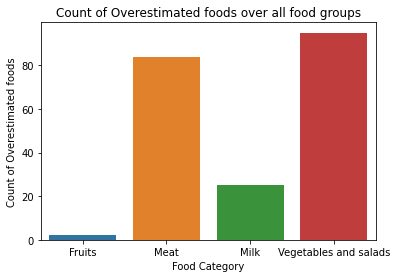

In [ ]:
dumms_m5=overestimated_m5.groupby('Data.Label')['Category'].count().reset_index()
sns.barplot(data=dumms_m5,x='Data.Label',y='Category')
plt.xlabel('Food Category')
plt.ylabel('Count of Overestimated foods')
plt.title("Count of Overestimated foods over all food groups")
plt.show()

### Top 10 Underestimated Foods

In [ ]:
underestimated_m5=meta_m5_test.loc[meta_m5_test['Error']<0].sort_values(by='Error',ascending=True)
underestimated_m5.head(10)

Category  \
3720  Cereal or granola bar (Kashi Chewy)   
1373                              Herring   
5734                         Sweet potato   
3690                     Breakfast pastry   
3233                                Bread   
1017                        Chicken thigh   
4342                              Burrito   
5645                          Taro leaves   
1064                         Chicken feet   
6331              Animal fat or drippings   

                                            Description  \
3720                Cereal or granola bar (Kashi Chewy)   
1373                             Herring, dried, salted   
5734  Sweet potato, baked, peel not eaten, made with...   
3690                              Breakfast pastry, NFS   
3233  Bread, whole wheat, made from home recipe or p...   
1017              Chicken thigh, stewed, skin not eaten   
4342  Burrito, taco, or quesadilla with egg, potato,...   
5645                                Taro leaves, cooked   
1064                                       Chicken feet   
6331                            Animal fat or drippings   

      Nutrient Data Bank Number  Data.Cholesterol             Data.Label  \
3720                   53710800                 6                   Milk   
1373                   26119170               186                   Meat   
5734                   73403022                10  Vegetables and salads   
3690                   53500100               114  Vegetables and salads   
3233                   51300150                 5  Vegetables and salads   
1017                   24153220               140                   Meat   
4342                   58100017               141  Vegetables and salads   
5645                   72126001                 2  Vegetables and salads   
1064                   24198500                84                   Meat   
6331                   81201000                93  Vegetables and salads   

      Predictions       Error  
3720  -139.225840 -145.225840  
1373   103.406247  -82.593753  
5734   -71.735776  -81.735776  
3690    39.381433  -74.618567  
3233   -52.917856  -57.917856  
1017    86.424585  -53.575415  
4342    88.402841  -52.597159  
5645   -48.551531  -50.551531  
1064    34.455115  -49.544885  
6331    45.898096  -47.101904

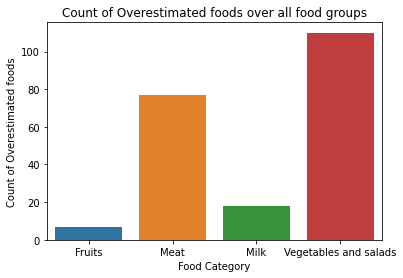

In [ ]:
dumms_m5=underestimated_m5.groupby('Data.Label')['Category'].count().reset_index()
sns.barplot(data=dumms_m5,x='Data.Label',y='Category')
plt.xlabel('Food Category')
plt.ylabel('Count of Overestimated foods')
plt.title("Count of Overestimated foods over all food groups")
plt.show()

### Analysis:

1. There is an extensive overprediction in Meat and Vegetable and salads products.
2. In Fruits and Milk which are fine doesn't have problem in both Overestimation and Underestimation

# Modeling (Classification)


# Model-5

## Basic Logistic Regression (Vanilla)

In [ ]:
main_df_m6.head()

Category  \
6746                        Chicory beverage   
5308                             Apple juice   
5257                            Fruit nectar   
5314                       Apple-prune juice   
4227  Cereal (General Mills Cheerios Fruity)   

                                     Description  Nutrient Data Bank Number  \
6746                            Chicory beverage                   92202010   
5308  Apple juice, with added calcium, baby food                   67202010   
5257                           Fruit nectar, NFS                   64200100   
5314                Apple-prune juice, baby food                   67203700   
4227      Cereal (General Mills Cheerios Fruity)                   57221810   

      Data.Alpha Carotene  Data.Beta Carotene  Data.Beta Cryptoxanthin  \
6746                    0                   0                        0   
5308                    0                   0                        0   
5257                    0                 402                       26   
5314                    1                   8                        2   
4227                   25                  38                        0   

      Data.Carbohydrate  Data.Cholesterol  Data.Choline  Data.Fiber  ...  \
6746               1.42                 0           1.9         0.0  ...   
5308              11.10                 0           1.8         0.4  ...   
5257              13.12                 0           1.5         0.3  ...   
5314              18.10                 0           1.8         0.1  ...   
4227              84.19                 0          17.5         5.9  ...   

      Data.Major Minerals.Zinc  Data.Vitamins.Vitamin A - RAE  \
6746                      0.01                              0   
5308                      0.03                              0   
5257                      0.02                             35   
5314                      0.05                              1   
4227                     13.89                            534   

      Data.Vitamins.Vitamin B12  Data.Vitamins.Vitamin B6  \
6746                       0.00                     0.000   
5308                       0.00                     0.030   
5257                       0.00                     0.015   
5314                       0.00                     0.035   
4227                       5.59                     1.850   

      Data.Vitamins.Vitamin C  Data.Vitamins.Vitamin E  \
6746                      0.0                     0.00   
5308                     21.2                     0.00   
5257                     15.2                     0.21   
5314                     67.5                     0.05   
4227                     55.6                     0.79   

      Data.Vitamins.Vitamin K  NetCarbs  Data.Fat.Unsaturated Fat  Data.Label  
6746                      0.0      1.42                     0.002      Fruits  
5308                      0.0     10.70                     0.037      Fruits  
5257                      0.8     12.82                     0.033      Fruits  
5314                      1.3     18.00                     0.037      Fruits  
4227                      0.9     78.29                     3.680      Fruits  

[5 rows x 38 columns]

In [ ]:
main_df_m6.shape

(6364, 38)

In [ ]:
chol_median=main_df_m6['Data.Cholesterol'].median()
chol_median

9.0

In [ ]:
main_df_m6['Data.Cholesterol']=np.where(main_df_m6['Data.Cholesterol']<=chol_median,0,1)

In [ ]:
main_df_m6['Data.Cholesterol'].value_counts()

0    3226
1    3138
Name: Data.Cholesterol, dtype: int64

The data is balanced across two groups.

In [ ]:
y6=main_df_m6['Data.Cholesterol']
X_train_m6,X_val_m6,y_train_m6,y_val_m6=train_test_split(main_df_m6,y6,test_size=0.2,random_state=42)
X_val1_m6,X_test_m6,y_val1_m6,y_test_m6=train_test_split(X_val_m6,y_val_m6,test_size=0.5,random_state=42)
meta_m6_train=X_train_m6.iloc[:,:3]
meta_m6_train['Data.Cholesterol']=X_train_m6['Data.Cholesterol']
meta_m6_val=X_val1_m6.iloc[:,:3]
meta_m6_val['Data.Cholesterol']=X_val1_m6['Data.Cholesterol']
meta_m6_test=X_test_m6.iloc[:,:3]
meta_m6_test['Data.Cholesterol']=X_test_m6['Data.Cholesterol']
meta_m6_train['Data.Label']=X_train_m6['Data.Label']
meta_m6_val['Data.Label']=X_val1_m6['Data.Label']
meta_m6_test['Data.Label']=X_test_m6['Data.Label']
X_train_m6.drop(columns=['Category','Description','Nutrient Data Bank Number','Data.Cholesterol','Data.Label'],inplace=True)
X_val1_m6.drop(columns=['Category','Description','Nutrient Data Bank Number','Data.Cholesterol','Data.Label'],inplace=True)
X_test_m6.drop(columns=['Category','Description','Nutrient Data Bank Number','Data.Cholesterol','Data.Label'],inplace=True)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,confusion_matrix,classification_report,precision_score,recall_score

In [ ]:
X_train_m6.shape,X_val1_m6.shape,X_test_m6.shape

((5091, 33), (636, 33), (637, 33))

In [ ]:
lr=LogisticRegression()
lr.fit(X_train_m6,y_train_m6)
x_pred_m6=lr.predict(X_train_m6)
print("Training F1: ",f1_score(x_pred_m6,y_train_m6))


y_pred_m6=lr.predict(X_val1_m6)
print("Validation F1: ",f1_score(y_pred_m6,y_val1_m6))

y_predd_m6=lr.predict(X_test_m6)
print("Testing F1: ",f1_score(y_test_m6,y_predd_m6))



Training F1:  0.8928131416837782
Validation F1:  0.8787878787878789
Testing F1:  0.9096989966555183


In [ ]:
meta_m6_train['Predicted']=x_pred_m6
meta_m6_val['Predicted']=y_pred_m6
meta_m6_test['Predicted']=y_predd_m6

# Model - 6

In [ ]:
main_df_m7.head()

Category  \
6746                        Chicory beverage   
5308                             Apple juice   
5257                            Fruit nectar   
5314                       Apple-prune juice   
4227  Cereal (General Mills Cheerios Fruity)   

                                     Description  Nutrient Data Bank Number  \
6746                            Chicory beverage                   92202010   
5308  Apple juice, with added calcium, baby food                   67202010   
5257                           Fruit nectar, NFS                   64200100   
5314                Apple-prune juice, baby food                   67203700   
4227      Cereal (General Mills Cheerios Fruity)                   57221810   

      Data.Alpha Carotene  Data.Beta Carotene  Data.Beta Cryptoxanthin  \
6746                    0                   0                        0   
5308                    0                   0                        0   
5257                    0                 402                       26   
5314                    1                   8                        2   
4227                   25                  38                        0   

      Data.Carbohydrate  Data.Cholesterol  Data.Choline  Data.Fiber  ...  \
6746               1.42                 0           1.9         0.0  ...   
5308              11.10                 0           1.8         0.4  ...   
5257              13.12                 0           1.5         0.3  ...   
5314              18.10                 0           1.8         0.1  ...   
4227              84.19                 0          17.5         5.9  ...   

      Data.Major Minerals.Zinc  Data.Vitamins.Vitamin A - RAE  \
6746                      0.01                              0   
5308                      0.03                              0   
5257                      0.02                             35   
5314                      0.05                              1   
4227                     13.89                            534   

      Data.Vitamins.Vitamin B12  Data.Vitamins.Vitamin B6  \
6746                       0.00                     0.000   
5308                       0.00                     0.030   
5257                       0.00                     0.015   
5314                       0.00                     0.035   
4227                       5.59                     1.850   

      Data.Vitamins.Vitamin C  Data.Vitamins.Vitamin E  \
6746                      0.0                     0.00   
5308                     21.2                     0.00   
5257                     15.2                     0.21   
5314                     67.5                     0.05   
4227                     55.6                     0.79   

      Data.Vitamins.Vitamin K  NetCarbs  Data.Fat.Unsaturated Fat  Data.Label  
6746                      0.0      1.42                     0.002      Fruits  
5308                      0.0     10.70                     0.037      Fruits  
5257                      0.8     12.82                     0.033      Fruits  
5314                      1.3     18.00                     0.037      Fruits  
4227                      0.9     78.29                     3.680      Fruits  

[5 rows x 38 columns]

In [ ]:
chol_median=main_df_m7['Data.Cholesterol'].median()

In [ ]:
main_df_m7['Data.Cholesterol']=np.where(main_df_m7['Data.Cholesterol']<=chol_median,0,1)

In [ ]:
y7=main_df_m7['Data.Cholesterol']
X_train_m7,X_val_m7,y_train_m7,y_val_m7=train_test_split(main_df_m7,y7,test_size=0.2,random_state=42)
X_val1_m7,X_test_m7,y_val1_m7,y_test_m7=train_test_split(X_val_m7,y_val_m7,test_size=0.5,random_state=42)
meta_m7_train=X_train_m7.iloc[:,:3]
meta_m7_train['Data.Cholesterol']=X_train_m7['Data.Cholesterol']
meta_m7_val=X_val1_m7.iloc[:,:3]
meta_m7_val['Data.Cholesterol']=X_val1_m7['Data.Cholesterol']
meta_m7_test=X_test_m7.iloc[:,:3]
meta_m7_test['Data.Cholesterol']=X_test_m7['Data.Cholesterol']
meta_m7_train['Data.Label']=X_train_m7['Data.Label']
meta_m7_val['Data.Label']=X_val1_m7['Data.Label']
meta_m7_test['Data.Label']=X_test_m7['Data.Label']
X_train_m7.drop(columns=['Category','Description','Nutrient Data Bank Number','Data.Cholesterol','Data.Label'],inplace=True)
X_val1_m7.drop(columns=['Category','Description','Nutrient Data Bank Number','Data.Cholesterol','Data.Label'],inplace=True)
X_test_m7.drop(columns=['Category','Description','Nutrient Data Bank Number','Data.Cholesterol','Data.Label'],inplace=True)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
r=RandomForestClassifier()
r.fit(X_train_m7,y_train_m7)
#x_pred_m7=r.predict(X_train_m7)
#y_pred_m7=r.predict(X_val1_m7)
#y_predd_m7=r.predict(X_test_m7)

RandomForestClassifier()

In [ ]:
importances=pd.Series(r.feature_importances_)
importances.index=r.feature_names_in_

In [ ]:
## extracting the features whose p-values are less than 0.05
important_columns=importances[importances<0.05].index
important_columns

Index(['Data.Alpha Carotene', 'Data.Beta Carotene', 'Data.Beta Cryptoxanthin',
       'Data.Carbohydrate', 'Data.Lutein and Zeaxanthin', 'Data.Lycopene',
       'Data.Niacin', 'Data.Riboflavin', 'Data.Sugar Total', 'Data.Thiamin',
       'Data.Water', 'Data.Major Minerals.Calcium',
       'Data.Major Minerals.Copper', 'Data.Major Minerals.Iron',
       'Data.Major Minerals.Magnesium', 'Data.Major Minerals.Phosphorus',
       'Data.Major Minerals.Potassium', 'Data.Major Minerals.Sodium',
       'Data.Major Minerals.Zinc', 'Data.Vitamins.Vitamin A - RAE',
       'Data.Vitamins.Vitamin B6', 'Data.Vitamins.Vitamin C',
       'Data.Vitamins.Vitamin E', 'Data.Vitamins.Vitamin K', 'NetCarbs',
       'Data.Fat.Unsaturated Fat'],
      dtype='object')

In [ ]:
main_df_m8=main_df_m7[important_columns]
main_df_m8['Data.Cholesterol']=main_df_m7['Data.Cholesterol']
main_df_m8['Data.Label']=main_df_m7['Data.Label']
main_df_m8['Category']=main_df_m7['Category']
main_df_m8['Description']=main_df_m7['Description']
main_df_m8['Nutrient Data Bank Number']=main_df_m7['Nutrient Data Bank Number']

In [ ]:
y8=main_df_m8['Data.Cholesterol']
X_train_m8,X_val_m8,y_train_m8,y_val_m8=train_test_split(main_df_m8,y8,test_size=0.2,random_state=42)
X_val1_m8,X_test_m8,y_val1_m8,y_test_m8=train_test_split(X_val_m8,y_val_m8,test_size=0.5,random_state=42)
meta_m8_train=X_train_m8[['Category','Description','Nutrient Data Bank Number','Data.Label','Data.Cholesterol']]
meta_m8_val=X_val1_m8[['Category','Description','Nutrient Data Bank Number','Data.Label','Data.Cholesterol']]
meta_m8_test=X_test_m8[['Category','Description','Nutrient Data Bank Number','Data.Label','Data.Cholesterol']]

X_train_m8.drop(columns=['Category','Description','Nutrient Data Bank Number','Data.Label','Data.Cholesterol'],inplace=True)
X_val1_m8.drop(columns=['Category','Description','Nutrient Data Bank Number','Data.Label','Data.Cholesterol'],inplace=True)
X_test_m8.drop(columns=['Category','Description','Nutrient Data Bank Number','Data.Label','Data.Cholesterol'],inplace=True)
#X_val1_m8.drop(columns=['Data.Cholesterol'],inplace=True)
#X_test_m8.drop(columns=['Data.Cholesterol'],inplace=True)


In [ ]:
clf=RandomForestClassifier()
clf.fit(X_train_m8,y_train_m8)
x_pred_m8=clf.predict(X_train_m8)
print("Training F1: ",f1_score(x_pred_m8,y_train_m8))


y_pred_m8=clf.predict(X_val1_m8)
print("Validation F1: ",f1_score(y_pred_m8,y_val1_m8))

y_predd_m8=clf.predict(X_test_m8)
print("Testing F1: ",f1_score(y_test_m8,y_predd_m8))


Training F1:  1.0
Validation F1:  0.9516129032258065
Testing F1:  0.9666666666666668


In [ ]:
meta_m8_train['Predicted']=x_pred_m8
meta_m8_val['Predicted']=y_pred_m8
meta_m8_test['Predicted']=y_predd_m8

# Clasification Results

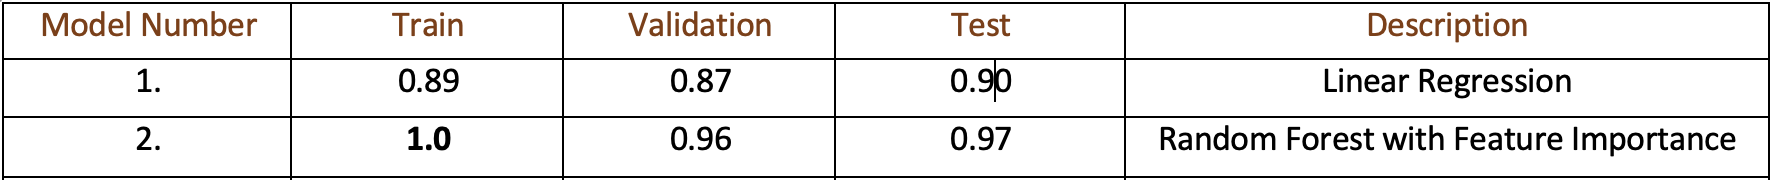

# Analyze and interpret classification errors

# Classification Model - 1

#### Analysis
**Confusion matrix**

**TP**: Actual is a **YES** and Prediction is also an **YES**

**FP**: Actual is a **NO** and Prediction is an **YES**

**FN**: Actual is an **YES** and Prediction is a **NO**

**TN**: Actual is a **NO** and Prediction is also a **NO**



In [ ]:
cm_train_m1=confusion_matrix(meta_m6_train['Predicted'],meta_m6_train['Data.Cholesterol'])
cm_val_m1=confusion_matrix(meta_m6_val['Predicted'],meta_m6_val['Data.Cholesterol'])
cm_test_m1=confusion_matrix(meta_m6_test['Predicted'],meta_m6_test['Data.Cholesterol'])
print("Train ----------------------------------------------")
print(cm_train_m1)
print("Validation ----------------------------------------------")
print(cm_val_m1)
print("Test ----------------------------------------------------------")
print(cm_test_m1)

Train ----------------------------------------------
[[2395  349]
 [ 173 2174]]
Validation ----------------------------------------------
[[303  52]
 [ 20 261]]
Test ----------------------------------------------------------
[[311  30]
 [ 24 272]]


In [ ]:
cr_train_m1=classification_report(meta_m6_train['Predicted'],meta_m6_train['Data.Cholesterol'])
cr_val_m1=classification_report(meta_m6_val['Predicted'],meta_m6_val['Data.Cholesterol'])
cr_test_m1=classification_report(meta_m6_test['Predicted'],meta_m6_test['Data.Cholesterol'])
print("Train ----------------------------------------------")
print(cr_train_m1)
print("Validation ----------------------------------------------")
print(cr_val_m1)
print("Test ----------------------------------------------------------")
print(cr_test_m1)

Train ----------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.87      0.90      2744
           1       0.86      0.93      0.89      2347

    accuracy                           0.90      5091
   macro avg       0.90      0.90      0.90      5091
weighted avg       0.90      0.90      0.90      5091

Validation ----------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.85      0.89       355
           1       0.83      0.93      0.88       281

    accuracy                           0.89       636
   macro avg       0.89      0.89      0.89       636
weighted avg       0.89      0.89      0.89       636

Test ----------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       341
           1       0.90      0.92      0.91       296

    acc

## Analysis:

1. The Model is good at predicting the 0's better than 1's in train, validation and test sets overall.
2. There is almost double difference in FP and FN's. False positives are higher than False negatives for train, validation and test sets.
3. Precision, Recall and the f1 score values are all similiar for train, validation and test sets with close to 90%
4. As the negatives are well predicted than positives, so the support is higher for 0's than for 1's. 
5. The model is performing well across all the sets of data without any overfitting. The support, recall, precision and the f1 score is being consistent across all the sets of data.

### Finding the misclassified records

In [ ]:
mis_train_m1=meta_m6_train.loc[meta_m6_train['Data.Cholesterol']!=meta_m6_train['Predicted']]
mis_val_m1=meta_m6_val.loc[meta_m6_val['Data.Cholesterol']!=meta_m6_val['Predicted']]
mis_test_m1=meta_m6_test.loc[meta_m6_test['Data.Cholesterol']!=meta_m6_test['Predicted']]

In [ ]:
m1_train_counts=mis_train_m1.groupby('Data.Label')['Category'].count().reset_index()
m1_val_counts=mis_val_m1.groupby('Data.Label')['Category'].count().reset_index()
m1_test_counts=mis_test_m1.groupby('Data.Label')['Category'].count().reset_index()

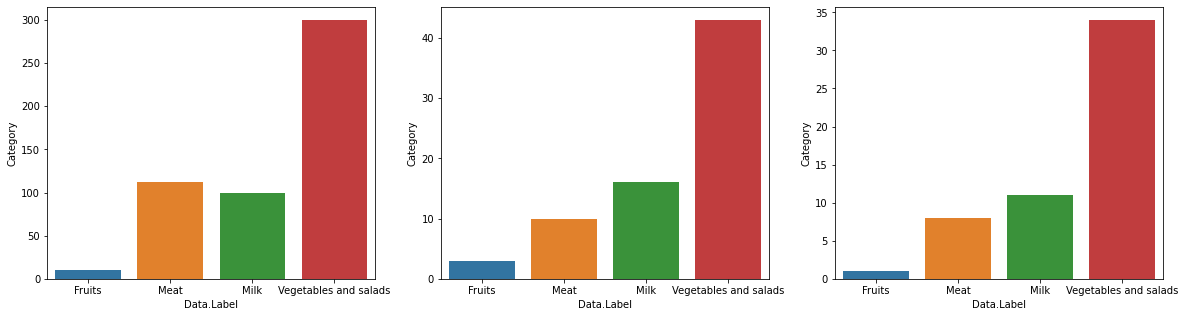

In [ ]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(20,5))
sns.barplot(data=m1_train_counts,x='Data.Label',y='Category',ax=ax1)
sns.barplot(data=m1_val_counts,x='Data.Label',y='Category',ax=ax2)
sns.barplot(data=m1_test_counts,x='Data.Label',y='Category',ax=ax3)
plt.show()

#### Analysis:
1. There are more wrong predictions in Vegetables and Salads section than Milk and Meat.
2. Fruits have a very less errors

# Classification Model-2

In [ ]:
cm_train_m2=confusion_matrix(meta_m8_train['Predicted'],meta_m8_train['Data.Cholesterol'])
cm_val_m2=confusion_matrix(meta_m8_val['Predicted'],meta_m8_val['Data.Cholesterol'])
cm_test_m2=confusion_matrix(meta_m8_test['Predicted'],meta_m8_test['Data.Cholesterol'])
print("Train ----------------------------------------------")
print(cm_train_m2)
print("Validation ----------------------------------------------")
print(cm_val_m2)
print("Test ----------------------------------------------------------")
print(cm_test_m2)

Train ----------------------------------------------
[[2568    0]
 [   0 2523]]
Validation ----------------------------------------------
[[311  18]
 [ 12 295]]
Test ----------------------------------------------------------
[[327  12]
 [  8 290]]


In [ ]:
cr_train_m2=classification_report(meta_m8_train['Predicted'],meta_m8_train['Data.Cholesterol'])
cr_val_m2=classification_report(meta_m8_val['Predicted'],meta_m8_val['Data.Cholesterol'])
cr_test_m2=classification_report(meta_m8_test['Predicted'],meta_m8_test['Data.Cholesterol'])
print("Train ----------------------------------------------")
print(cr_train_m2)
print("Validation ----------------------------------------------")
print(cr_val_m2)
print("Test ----------------------------------------------------------")
print(cr_test_m2)

Train ----------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2568
           1       1.00      1.00      1.00      2523

    accuracy                           1.00      5091
   macro avg       1.00      1.00      1.00      5091
weighted avg       1.00      1.00      1.00      5091

Validation ----------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       329
           1       0.94      0.96      0.95       307

    accuracy                           0.95       636
   macro avg       0.95      0.95      0.95       636
weighted avg       0.95      0.95      0.95       636

Test ----------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       339
           1       0.96      0.97      0.97       298

    acc

## Analysis:

1. The model has 100% accuracy with train set. And, it is good at predicting the 0's better than 1's for validation and test sets.
2. There is almost very few FP and FN's in validation and test sets. As the train accuracy is 100%, there are no false positives and false negatives 
3. Precision, Recall and the f1 score values are all similiar for train, validation and test sets with close to 98%
4. As the negatives are well predicted than positives, so the support is higher for 0's than for 1's. 
5. The model is performing well across all the sets of data without any overfitting. The support, recall, precision and the f1 score is being consistent across all the sets of data.

### Finding the misclassified records

In [ ]:
mis_train_m2=meta_m8_train.loc[meta_m8_train['Data.Cholesterol']!=meta_m8_train['Predicted']]
mis_val_m2=meta_m8_val.loc[meta_m8_val['Data.Cholesterol']!=meta_m8_val['Predicted']]
mis_test_m2=meta_m8_test.loc[meta_m8_test['Data.Cholesterol']!=meta_m8_test['Predicted']]

In [ ]:
mis_train_m2

Empty DataFrame
Columns: [Category, Description, Nutrient Data Bank Number, Data.Label, Data.Cholesterol, Predicted]
Index: []

In [ ]:
m2_train_counts=mis_train_m2.groupby('Data.Label')['Category'].count().reset_index()
m2_val_counts=mis_val_m2.groupby('Data.Label')['Category'].count().reset_index()
m2_test_counts=mis_test_m2.groupby('Data.Label')['Category'].count().reset_index()

In [ ]:
m2_train_counts

Empty DataFrame
Columns: [Data.Label, Category]
Index: []

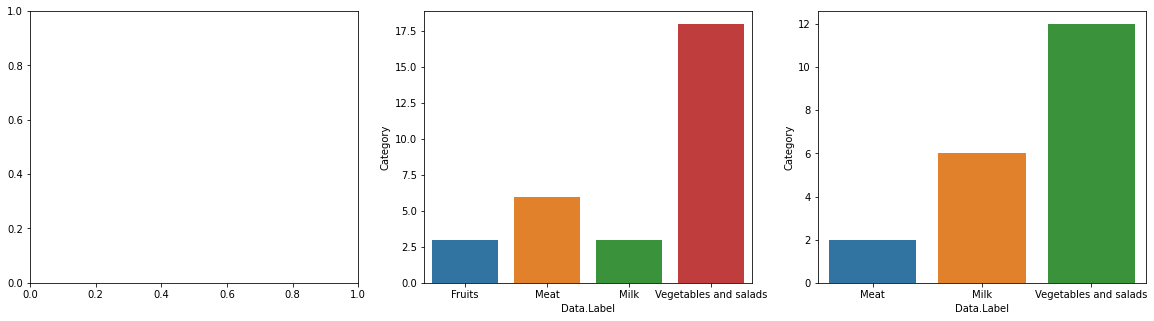

In [ ]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(20,5))
#sns.barplot(data=m2_train_counts,x='Data.Label',y='Category',ax=ax1)
sns.barplot(data=m2_val_counts,x='Data.Label',y='Category',ax=ax2)
sns.barplot(data=m2_test_counts,x='Data.Label',y='Category',ax=ax3)
plt.show()

#### Analysis:
1. There are more wrong predictions in Vegetables and Salads section than Milk and Meat.
2. Fruits have a very less errors
3. In train set, there is no graph as there are no wrong predictions at all

# Conclusion
What did you find at the end of all of your analysis and modeling? Summarize your efforts and major findings. Suggest how you might be able to expand on this research in future projects. 

### Analysis Conclusion
1. It became very easy for us to do perform EDA when we grouped the data into Fruits, Vegetables and Salads, Milk and Meat products. Even the grouping is done based on keywords which is not only the most efficient one, the results were good as matched with the facts and citations.

2. Meat products contain high cholesterol foods which cannot be ignored completely as they contain high protein as well.

3. Milk products contain high unsaturated fat content which are nothing but Monosaturated fats and Polysaturated fats which are essential and better than saturated fats. This fats can be found in Cereal and breakfast products like Nutrition bars.

4. And, There is 0 cholesterol in most of the Fruits. There are some vegetables and salads and milk products with 0 cholesterol. So, When we feed the data into the model, we shouldn't delete the rows with zero cholesterol. If no data about products with 0 cholesterol is given, then the model will never know that they exist which should not be the case.

5. When coming to Minerals like Calcium and Magnesium which are important for bones can be found extensively in Milk products especially in cereal and breakfast bars. Among the two sub categories between milk products, the core milk products like Yogurt, Cheese, Butter etc have high cholesterol content than the one with Cereal and Breakfast foods (Nutrition bars). The intake of these minerals Calcium and Magnesium can be taken from Ceral and Breakfast foods by avoiding cholesterol content. 

### Model Conclusion

1. The final model we selected was Model-2 in ***Regression*** which was the ***Polynomial Regression with degree = 2.*** We tried to reduce the complexity of the model by reducing the features by taking only the ones which have a **p-value** < **0.05**. We got rid of 11 features which is a lot when coming to complexity.

2. When working with **Classification** , we finalized the one with ***Random Forest*** with ***feature importance***. The advantage with Random Forest is it won't predict negative values which is what we want as cholesterol can't be negative. The Accuracy of train data was 100% and validation and test were close to 98%. 

3. When coming to errors in both ***Regression*** and ***Classification*** models, the ***errors*** were mostly coming out from ***Vegetables and salads ***category. There can be of two reasons
 a) When splitting the foods into multiple categories, there can be a mix of  ***multiple categories*** in them which model might be confused with.
 b) In meat products, mostly ***vegetables*** are also a part of ***meat products*** which causes them to be ***overestimated*** as meat because meat has higher cholesterol than vegetables. 




## Research Expantion

1. I would like to get more metadata so that I could join on this dataframe and take it forward
2. Especially more vegetables and salads related data as the model has done more mistakes (wrong predictions) on this subset.

3. I would like to review foods outside and then add it to the dataset that makes it growing and creates fun for new learners to see the latest trends and analyze it

# Group Member Efforts

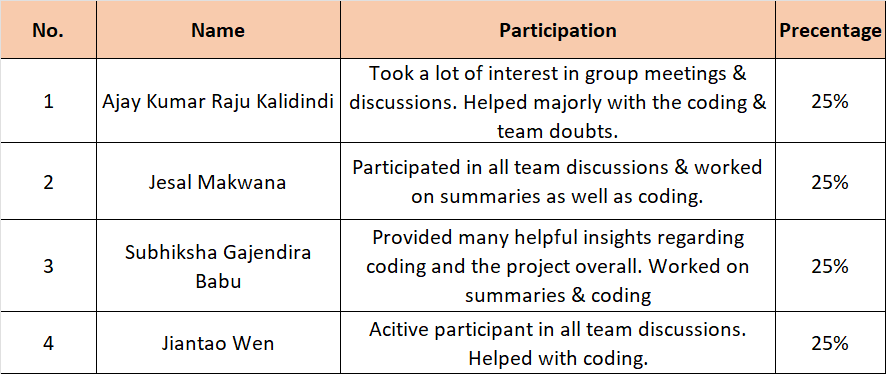